# IMPORTS:

In [ ]:
!pip install dalex -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for dalex: filename=dalex-1.6.0-py3-none-any.whl size=1045995 sha256=e36e35e58f00ae23f71906064cd7927f268bfa4856a3f076b0075758c7866980
  Stored in directory: /root/.cache/pip/wheels/c8/45/19/f5810bf7c5ff9a476ebd89bb5b81a18ffcdf93931d17dbb0c1
Successfully built dalex


In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=4f3ea0aa1a87045804ee6423b1a2af3c6d3d91eab74097dd7e81c583086c25de
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
#imports necesarios
import pandas as pd
import numpy as np
from sklearn import svm
from scipy.stats import ttest_rel
from sklearn.svm import LinearSVR, NuSVR
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error, median_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score, KFold
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import GridSearchCV, HalvingGridSearchCV, RepeatedKFold
from sklearn.inspection import permutation_importance
from scipy.io.arff import loadarff
import statsmodels.api as sm
from sklearn.utils import resample
import dalex as dx
import seaborn as sns

In [ ]:
# Función para evaluar el signo de los valores
def evaluar_valor(valor):
    if valor >= 0:
        return "Positivo"
    else:
        return "Negativo"

In [ ]:
# Crear las columnas del MultiIndex
columns = pd.MultiIndex.from_tuples([
    ('Breakdown', 'Ranking'), ('Breakdown', 'Signo'),
    ('Shapley', 'Ranking'), ('Shapley', 'Signo'),
    ('Lime', 'Ranking'), ('Lime', 'Signo')
])

# **Dataset preprocesado:**

In [ ]:
#carga del dataset
df=pd.read_csv("/content/drive/MyDrive/TFM/02.desharnais.csv")

In [ ]:
df.head(20) #comprobar el dataframe

,id,Project,TeamExp,ManagerExp,YearEnd,Length,Effort,Transactions,Entities,PointsNonAdjust,Adjustment,PointsAjust,Language
0,1,1,1,4,85,12,5152,253,52,305,34,302,1
1,2,2,0,0,86,4,5635,197,124,321,33,315,1
2,3,3,4,4,85,1,805,40,60,100,18,83,1
3,4,4,0,0,86,5,3829,200,119,319,30,303,1
4,5,5,0,0,86,4,2149,140,94,234,24,208,1
5,6,6,0,0,86,4,2821,97,89,186,38,192,1
6,7,7,2,1,85,9,2569,119,42,161,25,145,2
7,8,8,1,2,83,13,3913,186,52,238,25,214,1
8,9,9,3,1,85,12,7854,172,88,260,30,247,1
9,10,10,3,4,83,4,2422,78,38,116,24,103,1


In [ ]:
#comprobar si existen valores null o ?
print("¿Existen valores nulos?:", df.isnull().values.any())
print("¿Existen valores con '?' ?:", (df == '?').values.any())

¿Existen valores nulos?: False
¿Existen valores con '?' ?: False


In [ ]:
# Elimino el atributo del id y id del proyecto, pues no aportan información relevante.
df=df.drop('id', axis=1)
df=df.drop('Project', axis=1)

In [ ]:
print(df.shape)
#obtener nombre de los atributos
print(list(df))
#obtener lista de atributos sin la variable dependiente
feature_names=list(df)
feature_names.remove('Effort')
print(feature_names)

(81, 11)
['TeamExp', 'ManagerExp', 'YearEnd', 'Length', 'Effort', 'Transactions', 'Entities', 'PointsNonAdjust', 'Adjustment', 'PointsAjust', 'Language']
['TeamExp', 'ManagerExp', 'YearEnd', 'Length', 'Transactions', 'Entities', 'PointsNonAdjust', 'Adjustment', 'PointsAjust', 'Language']


In [ ]:
df.info() #comprobar el tipo de variables y su cantidad. Parece que no hay ninguna variable objeto

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   TeamExp          81 non-null     int64
 1   ManagerExp       81 non-null     int64
 2   YearEnd          81 non-null     int64
 3   Length           81 non-null     int64
 4   Effort           81 non-null     int64
 5   Transactions     81 non-null     int64
 6   Entities         81 non-null     int64
 7   PointsNonAdjust  81 non-null     int64
 8   Adjustment       81 non-null     int64
 9   PointsAjust      81 non-null     int64
 10  Language         81 non-null     int64
dtypes: int64(11)
memory usage: 7.1 KB


In [ ]:
pd.set_option('display.max_columns', None)
df.describe() #obtener algunas estadísitcas de cada atributo

,TeamExp,ManagerExp,YearEnd,Length,Effort,Transactions,Entities,PointsNonAdjust,Adjustment,PointsAjust,Language
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,2.185185,2.530864,85.740741,11.666667,5046.308642,182.123457,122.333333,304.456790,27.629630,289.234568,1.555556
std,1.415195,1.643825,1.222475,7.424621,4418.767228,144.035098,84.882124,180.210159,10.591795,185.761088,0.707107
min,-1.000000,-1.000000,82.000000,1.000000,546.000000,9.000000,7.000000,73.000000,5.000000,62.000000,1.000000
25%,1.000000,1.000000,85.000000,6.000000,2352.000000,88.000000,57.000000,176.000000,20.000000,152.000000,1.000000
50%,2.000000,3.000000,86.000000,10.000000,3647.000000,140.000000,99.000000,266.000000,28.000000,255.000000,1.000000
75%,4.000000,4.000000,87.000000,14.000000,5922.000000,224.000000,169.000000,384.000000,35.000000,351.000000,2.000000
max,4.000000,7.000000,88.000000,39.000000,23940.000000,886.000000,387.000000,1127.000000,52.000000,1116.000000,3.000000


In [ ]:
correlation_matrix=df.corr()
print(correlation_matrix) #coeficientes de correlación

                  TeamExp  ManagerExp   YearEnd    Length    Effort  \
TeamExp          1.000000    0.424687 -0.210335  0.143948  0.119529   
ManagerExp       0.424687    1.000000 -0.011519  0.211324  0.158303   
YearEnd         -0.210335   -0.011519  1.000000 -0.095027 -0.048367   
Length           0.143948    0.211324 -0.095027  1.000000  0.693280   
Effort           0.119529    0.158303 -0.048367  0.693280  1.000000   
Transactions     0.103768    0.138146  0.034331  0.620711  0.581881   
Entities         0.256608    0.206644  0.001686  0.483504  0.510328   
PointsNonAdjust  0.203805    0.207748  0.028234  0.723849  0.705449   
Adjustment       0.235629   -0.066821 -0.056743  0.266086  0.463865   
PointsAjust      0.222884    0.187399  0.012106  0.714092  0.738271   
Language        -0.079112    0.205521  0.342233 -0.023810 -0.261942   

                 Transactions  Entities  PointsNonAdjust  Adjustment  \
TeamExp              0.103768  0.256608         0.203805    0.235629   
Man

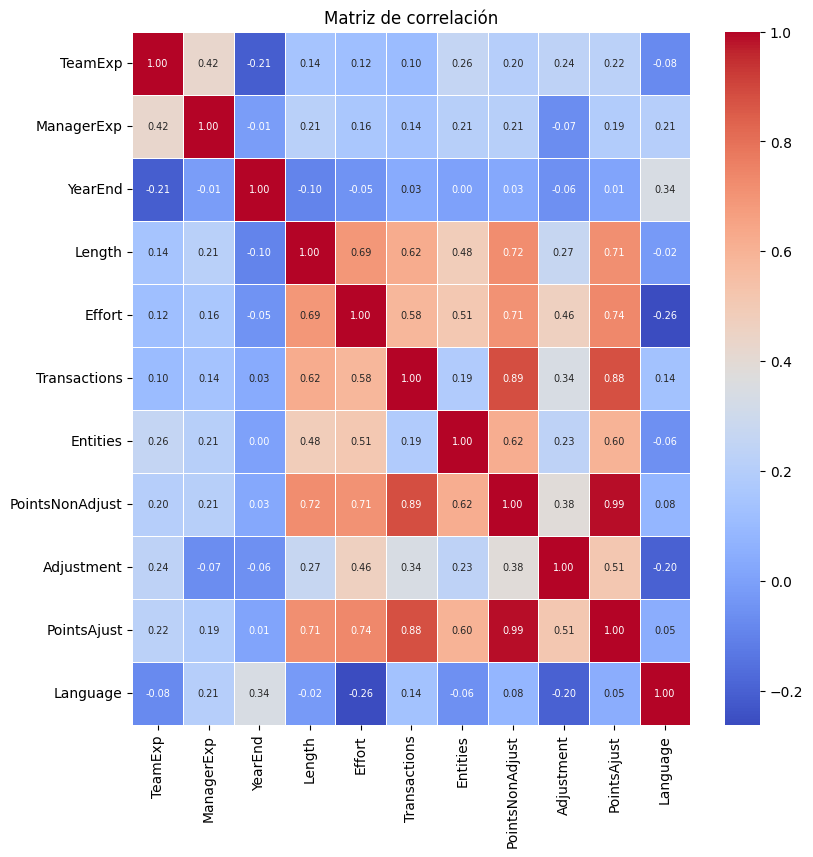

In [ ]:
plt.figure(figsize=(9, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 7}, linewidths=0.5)
plt.title("Matriz de correlación")
plt.show()

In [ ]:
# Pares de atributos con correlación superior a 0.95
high_correlation_pairs = []
atributos = []

# Recorre la matriz de correlación y verifica los valores
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            attribute_pair = (correlation_matrix.columns[i], correlation_matrix.columns[j])
            high_correlation_pairs.append(attribute_pair)

# Imprime los pares de atributos con correlación superior a 0.8 y crear una lista de atributos sin repetir
for pair in high_correlation_pairs:
    print("Correlación alta entre: ", pair[0], "y", pair[1])
    atributos.extend(pair)

# Eliminar duplicados y mantener el orden
atributos = list(dict.fromkeys(atributos))

# Imprimir la lista de atributos
print("Lista de atributos con correlación alta: ", atributos)

Correlación alta entre:  Transactions y PointsNonAdjust
Correlación alta entre:  Transactions y PointsAjust
Correlación alta entre:  PointsNonAdjust y PointsAjust
Lista de atributos con correlación alta:  ['Transactions', 'PointsNonAdjust', 'PointsAjust']


**VALIDACIÓN CRUZADA PARA COMPROBAR EL EFECTO DE LOS PARÁMETROS:**

In [ ]:
# Defino los algoritmos base para evaluar
reg_svr=svm.SVR()
rfr=RandomForestRegressor()
knnr=KNeighborsRegressor()
reg_gbr=GradientBoostingRegressor()
votr=VotingRegressor([('svr',reg_svr),('rf',rfr),('gbr',reg_gbr),('knn',knnr)])
modelos=[reg_svr, rfr, reg_gbr, knnr, votr]

In [ ]:
for i in atributos:
  print("\n##########################################################################################################")
  print("\nPARA EL ATRIBUTO: ", i)
  # Preparando los datos
  x=df[feature_names].values
  y=df['Effort'].values

  alg_escalado = StandardScaler(with_mean=True, with_std=True)
  x_escalado = alg_escalado.fit_transform(x)
  y=y.reshape(-1,1)
  y_escalado = alg_escalado.fit_transform(y)

  df_x_transf = pd.DataFrame(x_escalado, columns=feature_names)
  df_y_transf = pd.DataFrame(y_escalado, columns=['Effort'])
  df_data_transf = pd.concat([df_x_transf, df_y_transf], axis=1)

  X=df_data_transf[feature_names]
  Y=df_data_transf['Effort']

  x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=42)
  x_train_sin=x_train.drop(i, axis=1)

  for j in modelos:
    # Realizar validación cruzada con y sin el atributo con alta correlación:
    # Con el atributo
    cv_scores_con = cross_val_score(j, x_train, y_train, cv=5, scoring='neg_mean_squared_error')

    # Sin el atributo
    cv_scores_sin = cross_val_score(j, x_train_sin, y_train, cv=5, scoring='neg_mean_squared_error')

    # Calcular el estadístico t y el p-valor
    t_statistic, p_value = ttest_rel(cv_scores_con, cv_scores_sin)

    # Mostrar los resultados
    print("-------------------------------------------------------------------------------------------------------------")
    print("El modelo: ", j)
    print("MSE de validación cruzada (con atributo):", cv_scores_con)
    print("MSE de validación cruzada (sin atributo):", cv_scores_sin)
    print("El MSE medio con atributo es: ", np.mean(cv_scores_con), "\nEl MSE medio sin atributo es: ", np.mean(cv_scores_sin))
    if np.mean(cv_scores_con) > np.mean(cv_scores_sin):
      print("El atributo mejora el desempeño del modelo, con una diferencia de: ", np.mean(cv_scores_con)-np.mean(cv_scores_sin))
    else:
      print("El atributo no mejora el desempeño del modelo, con una diferencia de: ", np.mean(cv_scores_con)-np.mean(cv_scores_sin))

    print("Estadístico t:", t_statistic)
    print("p-valor:", p_value)


##########################################################################################################

PARA EL ATRIBUTO:  PointsNonAdjust
-------------------------------------------------------------------------------------------------------------
El modelo:  SVR()
MSE de validación cruzada (con atributo): [-0.24496551 -1.07302051 -0.23122196 -0.85874901 -0.15352623]
MSE de validación cruzada (sin atributo): [-0.24351794 -1.06435348 -0.22375959 -0.87199076 -0.14638176]
El MSE medio con atributo es:  -0.5122966432673852 
El MSE medio sin atributo es:  -0.510000705142102
El atributo no mejora el desempeño del modelo, con una diferencia de:  -0.00229593812528317
Estadístico t: -0.5627276643170573
p-valor: 0.6036637429174025
-------------------------------------------------------------------------------------------------------------
El modelo:  RandomForestRegressor()
MSE de validación cruzada (con atributo): [-0.49634292 -0.35832626 -0.13336583 -0.10183175 -0.104524  ]
MSE de valida

In [ ]:
#estos atributos tienen alta correlación, por lo tanto los elimino
feature_names.remove('PointsNonAdjust')
print(feature_names)

['TeamExp', 'ManagerExp', 'YearEnd', 'Length', 'Transactions', 'Entities', 'Adjustment', 'PointsAjust', 'Language']


In [ ]:
df_final=df
df_final=df_final.drop("PointsNonAdjust", axis=1)
df_final.describe()

,TeamExp,ManagerExp,YearEnd,Length,Effort,Transactions,Entities,Adjustment,PointsAjust,Language
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,2.185185,2.530864,85.740741,11.666667,5046.308642,182.123457,122.333333,27.629630,289.234568,1.555556
std,1.415195,1.643825,1.222475,7.424621,4418.767228,144.035098,84.882124,10.591795,185.761088,0.707107
min,-1.000000,-1.000000,82.000000,1.000000,546.000000,9.000000,7.000000,5.000000,62.000000,1.000000
25%,1.000000,1.000000,85.000000,6.000000,2352.000000,88.000000,57.000000,20.000000,152.000000,1.000000
50%,2.000000,3.000000,86.000000,10.000000,3647.000000,140.000000,99.000000,28.000000,255.000000,1.000000
75%,4.000000,4.000000,87.000000,14.000000,5922.000000,224.000000,169.000000,35.000000,351.000000,2.000000
max,4.000000,7.000000,88.000000,39.000000,23940.000000,886.000000,387.000000,52.000000,1116.000000,3.000000


In [ ]:
# Tomar los valores de la variable dependiente (y) y las independientes (x)
x=df[feature_names].values
y=df['Effort'].values

#se realiza una normalización con el objetivo de obtener una distribución de media cero y varianza uno
alg_escalado = StandardScaler(with_mean=True, with_std=True)
x_escalado = alg_escalado.fit_transform(x)
y=y.reshape(-1,1) #es necesario que sea un array 1d
y_escalado = alg_escalado.fit_transform(y)
y_escalado=y_escalado.ravel() #para aplanar y_escalado

df_x_transf = pd.DataFrame(x_escalado, columns=feature_names)
df_y_transf = pd.DataFrame(y_escalado, columns=['Effort'])
df_data_transf = pd.concat([df_x_transf, df_y_transf], axis=1)

X=df_data_transf[feature_names]
Y=df_data_transf['Effort']

In [ ]:
#dividir en conjunto de entrenamiento y test 70%-30%
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=42)

# **Algoritmos:**

### **SVR:**

**GRIDSEARCHCV:**

In [ ]:
#Búsqueda combinacion de parámetros usando GridSearchCV
modelo=svm.SVR()
params={'kernel':['linear','poly', 'rbf', 'sigmoid'],'degree':[1,2,3,4],'gamma':['auto','scale',0.1],'C':list(np.arange(0.5,21.5,0.5))}
score={'mae':'neg_mean_absolute_error','mse':'neg_mean_squared_error','R2':'r2'}

# Definir la validación cruzada repetida
cv = RepeatedKFold(n_splits=5, n_repeats=3)

grid=GridSearchCV(modelo,params,cv=cv,scoring='r2',verbose=1)
grid.fit(x_train,y_train)

Fitting 15 folds for each of 2016 candidates, totalling 30240 fits


GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=5, random_state=None),
             estimator=SVR(),
             param_grid={'C': [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0,
                               5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5,
                               10.0, 10.5, 11.0, 11.5, 12.0, 12.5, 13.0, 13.5,
                               14.0, 14.5, 15.0, ...],
                         'degree': [1, 2, 3, 4],
                         'gamma': ['auto', 'scale', 0.1],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='r2', verbose=1)

In [ ]:
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

{'C': 2.0, 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf'}
SVR(C=2.0, degree=1)
0.2529674636189309


In [ ]:
#definir algoritmo SVR con los mejores parámetros
svr = svm.SVR(kernel='poly',gamma='scale', degree=1, C=0.5)

In [ ]:
#entrenamiento
modelo_svr=svr.fit(x_train,y_train)

In [ ]:
#predicciones
y_pred = modelo_svr.predict(x_test)

**EVALUACIÓN MODELO:**

In [ ]:
#comprobación resultados
df_pred = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_pred)
desv_pred= np.std(y_pred)
print(f'Desviación Estándar Predicciones: {desv_pred:.2f}')
media_pred= np.mean(y_pred)
print(f'Media Predicciones: {media_pred:.2f}')

      Actual  Predicted
30 -0.254886  -0.568390
0   0.024068   0.257542
22  0.165936   0.260300
31 -0.987453  -0.726097
18 -0.125770  -0.431585
28  0.502275  -0.109178
10 -0.223006   0.037904
70 -1.024799  -1.095339
4  -0.659768  -0.313119
12 -0.629481  -0.832968
49  0.175500  -0.392534
33  0.309398  -0.106247
67 -0.860615  -0.837745
35  0.931067   0.456027
68 -0.568909  -0.762966
45  2.263669   0.680119
73 -1.013641  -0.884703
61 -0.721935  -0.925634
55  0.725438  -0.469625
40 -0.097078   0.655888
9  -0.597601  -0.817178
64 -0.323429  -0.205068
5  -0.506742  -0.274002
47  1.771116   0.056882
34 -1.000889  -0.835774
Desviación Estándar Predicciones: 0.51
Media Predicciones: -0.33


In [ ]:
#calcular residuos
residuos = y_test - y_pred
print(residuos)

30    0.313504
0    -0.233474
22   -0.094364
31   -0.261357
18    0.305815
28    0.611453
10   -0.260909
70    0.070540
4    -0.346649
12    0.203486
49    0.568034
33    0.415644
67   -0.022870
35    0.475040
68    0.194058
45    1.583550
73   -0.128938
61    0.203699
55    1.195063
40   -0.752966
9     0.219577
64   -0.118361
5    -0.232740
47    1.714234
34   -0.165115
Name: Effort, dtype: float64


In [ ]:
#calcular métricas para evaluar el rendimiento del algoritmo
mbe=sm.tools.eval_measures.bias(y_test,y_pred)
print(f'Mean Bias Error: {mbe:.4f}')
mdbe=sm.tools.eval_measures.medianbias(y_test,y_pred)
print(f'Median Bias Error: {mdbe:.4f}')
max=sm.tools.eval_measures.maxabs(y_test,y_pred)
print(f'Maximum Absolute Error: {max:.4f}')
iqr=sm.tools.eval_measures.iqr(y_test,y_pred)
print(f'Interquartile Range of Error: {iqr:.4f}')
stde=sm.tools.eval_measures.stde(y_test,y_pred)
print(f'Standard Deviation of Error: {stde:.4f}')
vare=sm.tools.eval_measures.vare(y_test,y_pred)
print(f'Variance of Error: {vare:.4f}')

print("---------------------------------------------------")
mae = mean_absolute_error(y_test, y_pred)
mdae = median_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmspe = sm.tools.eval_measures.rmspe(y_test,y_pred)
r2=r2_score(y_test, y_pred)
mape= mean_absolute_percentage_error(y_test, y_pred)*100
print(f'Mean absolute error: {mae:.2f}')
print(f'Median absolute error: {mdae:.2f}')
print(f'Mean absolute percentage error: {mape:.2f} %')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')
print(f'Root mean squared percentage error: {rmspe:.2f} %')
print(f'Coefficient of determination: {r2:.2f}')

print("---------------------------------------------------")
abs_residuos=abs(residuos)
n_residuos=len(residuos)
mre=abs_residuos/y_test
mmre=np.mean(mre)
mdmre=np.median(mre)
print(f'Mean Magnitude of Error: {mmre:.4f}')
print(f'Median Magnitude of Error: {mdmre:.4f}')
count = mre[mre <= 0.25].count()
pred_25 = (count / len(y_pred)) * 100
print(f'Percentage of Relative Error within 25%: {pred_25:.2f} %')

Mean Bias Error: 0.2182
Median Bias Error: 0.1941
Maximum Absolute Error: 1.7142
Interquartile Range of Error: 0.5808
Standard Deviation of Error: 0.5707
Variance of Error: 0.3257
---------------------------------------------------
Mean absolute error: 0.43
Median absolute error: 0.26
Mean absolute percentage error: 143.19 %
Mean squared error: 0.37
Root mean squared error: 0.61
Root mean squared percentage error: 27.03 %
Coefficient of determination: 0.45
---------------------------------------------------
Mean Magnitude of Error: 0.1595
Median Magnitude of Error: -0.1650
Percentage of Relative Error within 25%: 64.00 %


In [ ]:
modelo_svr.score(x_test, y_test)

0.4539216311406009

In [ ]:
modelo_svr.score(x_train, y_train)

0.655522054564144

**VALIDACIÓN CRUZADA**

In [ ]:
# El número de folds
n_folds = 5

# Inicializar listas para almacenar las puntuaciones de las métricas. Nos centramos en las métricas comunes en la literatura: R2, MAE, MSE/RMSE, MMRE, PRED(25)
r2_scores = []
mae_scores= []
mse_scores = []
rmse_scores = []
mmre_scores = []
pred_25_scores = []

# Crear los objetos KFold
kf = KFold(n_splits=n_folds)

for train_index, test_index in kf.split(df_data_transf):
    # Dividir los datos en entrenamiento y prueba
    train_data = df_data_transf.iloc[train_index]
    test_data = df_data_transf.iloc[test_index]

    X_train = train_data[feature_names]
    Y_train = train_data['Effort']
    X_test = test_data[feature_names]
    Y_test = test_data['Effort']

    # Entrenar el modelo.
    cv_svr=svm.SVR(kernel='poly',gamma='scale', degree=1, C=0.5)
    cv_svr.fit(X_train, Y_train)

    # Realizar las predicciones en el conjunto de prueba
    Y_pred = cv_svr.predict(X_test)

    # Cálculo de residuos
    residuos = Y_test - Y_pred

    # Calcular las métricas
    mae = mean_absolute_error(Y_test, Y_pred)
    mse = mean_squared_error(Y_test, Y_pred)
    rmse = np.sqrt(mse)
    r2=r2_score(Y_test, Y_pred)
    abs_residuos=abs(residuos)
    n_residuos=len(residuos)
    mre=abs_residuos/Y_test
    mmre=np.mean(mre)
    count = mre[mre <= 0.25].count()
    pred_25 = (count / len(Y_pred)) * 100

    # Agregar las puntuaciones a las listas
    r2_scores.append(r2)
    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    mmre_scores.append(mmre)
    pred_25_scores.append(pred_25)

# Calcular la media de las puntuaciones
mean_r2 = np.mean(r2_scores)
mean_mae = np.mean(mae_scores)
mean_mse = np.mean(mse_scores)
mean_rmse = np.mean(rmse_scores)
mean_mmre = np.mean(mmre_scores)
mean_pred_25 = np.mean(pred_25_scores)

print(f'CV Mean absolute error: {mean_mae:.2f}')
print(f'CV Mean squared error: {mean_mse:.2f}')
print(f'CV Root mean squared error: {mean_rmse:.2f}')
print(f'CV Coefficient of determination: {mean_r2:.2f}')
print(f'CV Mean Magnitude of Error: {mean_mmre:.4f}')
print(f'CV Percentage of Relative Error within 25%: {mean_pred_25:.2f} %')

CV Mean absolute error: 0.48
CV Mean squared error: 0.48
CV Root mean squared error: 0.66
CV Coefficient of determination: 0.41
CV Mean Magnitude of Error: -0.1729
CV Percentage of Relative Error within 25%: 72.79 %


In [ ]:
cv_results = cross_validate(svr, X, Y, cv=5, scoring=('neg_mean_absolute_error','neg_mean_squared_error', 'neg_root_mean_squared_error','r2'))

In [ ]:
sorted(cv_results.keys())

['fit_time',
 'score_time',
 'test_neg_mean_absolute_error',
 'test_neg_mean_squared_error',
 'test_neg_root_mean_squared_error',
 'test_r2']

In [ ]:
print("Error Absoluto Medio: ", cv_results['test_neg_mean_absolute_error'], " // Con una media de: ", np.mean(cv_results['test_neg_mean_absolute_error']))
print("Error Cuadrático Medio: " , cv_results['test_neg_mean_squared_error'], " // Con una media de: ", np.mean(cv_results['test_neg_mean_squared_error']))
print("Raiz Error Cuadrático Medio: ", cv_results['test_neg_root_mean_squared_error'], " // Con una media de: ", np.mean(cv_results['test_neg_root_mean_squared_error']))
print("Coeficiente de Determinación: ", cv_results['test_r2'], " // Con una media de: ", np.mean(cv_results['test_r2']))

Error Absoluto Medio:  [-0.22363819 -0.642685   -0.69351364 -0.36714948 -0.44877506]  // Con una media de:  -0.4751522738909169
Error Cuadrático Medio:  [-0.10453441 -0.62749432 -0.93304751 -0.30477941 -0.42307258]  // Con una media de:  -0.47858564528375797
Raiz Error Cuadrático Medio:  [-0.32331781 -0.79214539 -0.96594385 -0.5520683  -0.65044029]  // Con una media de:  -0.6567831283156983
Coeficiente de Determinación:  [ 0.53755124 -0.01656307  0.36846493  0.39727197  0.78286813]  // Con una media de:  0.41391864043232846


In [ ]:
score_result={"Modelo":["SVR"],"MAE":[mean_mae], "MSE":[mean_mse], "RMSE":[mean_rmse], "R2":[mean_r2], "MMRE":[abs(mean_mmre)], "PRED(0.25)":[mean_pred_25/100]}
score_result=pd.DataFrame(score_result)

In [ ]:
score_result

,Modelo,MAE,MSE,RMSE,R2,MMRE,PRED(0.25)
0,SVR,0.475152,0.478586,0.656783,0.413919,0.172867,0.727941


### **RandomForest:**

In [ ]:
modelo=RandomForestRegressor(random_state=42)
params={'n_estimators':[100,200,400],'criterion':["squared_error", "absolute_error"],'min_samples_split':[2,3,4,5],'min_samples_leaf':[1,2,3],'bootstrap':[True,False],'max_depth':[None,1,3,5]}
score={'mae':'neg_mean_absolute_error','rmse':'neg_root_mean_squared_error','R2':'r2'}

# Definir la validación cruzada repetida
cv = RepeatedKFold(n_splits=5, n_repeats=3)

grid=GridSearchCV(modelo,params,cv=cv,scoring='r2',verbose=1)
grid.fit(x_train,y_train)

Fitting 15 folds for each of 576 candidates, totalling 8640 fits


GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=5, random_state=None),
             estimator=RandomForestRegressor(random_state=42),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [None, 1, 3, 5],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [100, 200, 400]},
             scoring='r2', verbose=1)

In [ ]:
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

{'bootstrap': True, 'criterion': 'absolute_error', 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 200}
RandomForestRegressor(criterion='absolute_error', max_depth=5,
                      min_samples_leaf=3, n_estimators=200, random_state=42)
-0.3037454518579278


In [ ]:
rf = RandomForestRegressor(criterion='absolute_error', max_depth=5, min_samples_leaf=3, n_estimators=200, random_state=42)

In [ ]:
modelo_rf=rf.fit(x_train,y_train)

In [ ]:
y_pred = modelo_rf.predict(x_test)

**EVALUACIÓN MODELO:**

In [ ]:
#comprobación resultados
df_pred = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_pred)
desv_pred= np.std(y_pred)
print(f'Desviación Estándar Predicciones: {desv_pred:.2f}')
media_pred= np.mean(y_pred)
print(f'Media Predicciones: {media_pred:.2f}')

      Actual  Predicted
30 -0.254886  -0.386652
0   0.024068  -0.227517
22  0.165936   0.174906
31 -0.987453  -0.554863
18 -0.125770  -0.186068
28  0.502275   0.227413
10 -0.223006   0.191799
70 -1.024799  -0.760067
4  -0.659768  -0.295904
12 -0.629481  -0.718740
49  0.175500  -0.379750
33  0.309398  -0.131529
67 -0.860615  -0.698057
35  0.931067   0.825865
68 -0.568909  -0.722618
45  2.263669   0.834967
73 -1.013641  -0.458183
61 -0.721935  -0.698545
55  0.725438  -0.198545
40 -0.097078   0.113352
9  -0.597601  -0.780033
64 -0.323429  -0.188651
5  -0.506742  -0.352802
47  1.771116  -0.119151
34 -1.000889  -0.597614
Desviación Estándar Predicciones: 0.44
Media Predicciones: -0.24


In [ ]:
residuos = y_test - y_pred
print(residuos)

30    0.131766
0     0.251585
22   -0.008970
31   -0.432590
18    0.060298
28    0.274861
10   -0.414804
70   -0.264732
4    -0.363864
12    0.089259
49    0.555250
33    0.440927
67   -0.162557
35    0.105201
68    0.153710
45    1.428702
73   -0.555458
61   -0.023390
55    0.923983
40   -0.210430
9     0.182432
64   -0.134779
5    -0.153939
47    1.890268
34   -0.403275
Name: Effort, dtype: float64


In [ ]:
#calcular métricas para evaluar el rendimiento del algoritmo
mbe=sm.tools.eval_measures.bias(y_test,y_pred)
print(f'Mean Bias Error: {mbe:.4f}')
mdbe=sm.tools.eval_measures.medianbias(y_test,y_pred)
print(f'Median Bias Error: {mdbe:.4f}')
max=sm.tools.eval_measures.maxabs(y_test,y_pred)
print(f'Maximum Absolute Error: {max:.4f}')
iqr=sm.tools.eval_measures.iqr(y_test,y_pred)
print(f'Interquartile Range of Error: {iqr:.4f}')
stde=sm.tools.eval_measures.stde(y_test,y_pred)
print(f'Standard Deviation of Error: {stde:.4f}')
vare=sm.tools.eval_measures.vare(y_test,y_pred)
print(f'Variance of Error: {vare:.4f}')

print("---------------------------------------------------")
mae = mean_absolute_error(y_test, y_pred)
mdae = median_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmspe = sm.tools.eval_measures.rmspe(y_test,y_pred)
r2=r2_score(y_test, y_pred)
mape= mean_absolute_percentage_error(y_test, y_pred)*100
print(f'Mean absolute error: {mae:.2f}')
print(f'Median absolute error: {mdae:.2f}')
print(f'Mean absolute percentage error: {mape:.2f} %')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')
print(f'Root mean squared percentage error: {rmspe:.2f} %')
print(f'Coefficient of determination: {r2:.2f}')

print("---------------------------------------------------")
abs_residuos=abs(residuos)
n_residuos=len(residuos)
mre=abs_residuos/y_test
mmre=np.mean(mre)
mdmre=np.median(mre)
print(f'Mean Magnitude of Error: {mmre:.4f}')
print(f'Median Magnitude of Error: {mdmre:.4f}')
count = mre[mre <= 0.25].count()
pred_25 = (count / len(y_pred)) * 100
print(f'Percentage of Relative Error within 25%: {pred_25:.2f} %')

Mean Bias Error: 0.1344
Median Bias Error: 0.0603
Maximum Absolute Error: 1.8903
Interquartile Range of Error: 0.4620
Standard Deviation of Error: 0.5622
Variance of Error: 0.3160
---------------------------------------------------
Mean absolute error: 0.38
Median absolute error: 0.25
Mean absolute percentage error: 110.44 %
Mean squared error: 0.33
Root mean squared error: 0.58
Root mean squared percentage error: 23.23 %
Coefficient of determination: 0.51
---------------------------------------------------
Mean Magnitude of Error: 0.3939
Median Magnitude of Error: -0.2583
Percentage of Relative Error within 25%: 72.00 %


In [ ]:
modelo_rf.score(x_test, y_test)

0.5113609296694319

In [ ]:
modelo_rf.score(x_train, y_train)

0.7263578088152247

**VALIDACIÓN CRUZADA:**

In [ ]:
# El número de folds
n_folds = 5

# Inicializar listas para almacenar las puntuaciones de las métricas. Nos centramos en las métricas comunes en la literatura: R2, MAE, MSE/RMSE, MMRE, PRED(25)
r2_scores = []
mae_scores= []
mse_scores = []
rmse_scores = []
mmre_scores = []
pred_25_scores = []

# Crear los objetos KFold
kf = KFold(n_splits=n_folds)

for train_index, test_index in kf.split(df_data_transf):
    # Dividir los datos en entrenamiento y prueba
    train_data = df_data_transf.iloc[train_index]
    test_data = df_data_transf.iloc[test_index]

    X_train = train_data[feature_names]
    Y_train = train_data['Effort']
    X_test = test_data[feature_names]
    Y_test = test_data['Effort']

    # Entrenar el modelo.
    cv_rf=RandomForestRegressor(criterion='absolute_error', max_depth=5, min_samples_leaf=3, n_estimators=200, random_state=42)
    cv_rf.fit(X_train, Y_train)

    # Realizar las predicciones en el conjunto de prueba
    Y_pred = cv_rf.predict(X_test)

    # Cálculo de residuos
    residuos = Y_test - Y_pred

    # Calcular las métricas
    mae = mean_absolute_error(Y_test, Y_pred)
    mse = mean_squared_error(Y_test, Y_pred)
    rmse = np.sqrt(mse)
    r2=r2_score(Y_test, Y_pred)
    abs_residuos=abs(residuos)
    n_residuos=len(residuos)
    mre=abs_residuos/Y_test
    mmre=np.mean(mre)
    count = mre[mre <= 0.25].count()
    pred_25 = (count / len(Y_pred)) * 100

    # Agregar las puntuaciones a las listas
    r2_scores.append(r2)
    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    mmre_scores.append(mmre)
    pred_25_scores.append(pred_25)

# Calcular la media de las puntuaciones
mean_r2 = np.mean(r2_scores)
mean_mae = np.mean(mae_scores)
mean_mse = np.mean(mse_scores)
mean_rmse = np.mean(rmse_scores)
mean_mmre = np.mean(mmre_scores)
mean_pred_25 = np.mean(pred_25_scores)

print(f'CV Mean absolute error: {mean_mae:.2f}')
print(f'CV Mean squared error: {mean_mse:.2f}')
print(f'CV Root mean squared error: {mean_rmse:.2f}')
print(f'CV Coefficient of determination: {mean_r2:.2f}')
print(f'CV Mean Magnitude of Error: {mean_mmre:.4f}')
print(f'CV Percentage of Relative Error within 25%: {mean_pred_25:.2f} %')

CV Mean absolute error: 0.57
CV Mean squared error: 0.71
CV Root mean squared error: 0.79
CV Coefficient of determination: 0.18
CV Mean Magnitude of Error: -0.3165
CV Percentage of Relative Error within 25%: 72.79 %


In [ ]:
cv_results = cross_validate(rf, X, Y, cv=5, scoring=('neg_mean_absolute_error','neg_mean_squared_error', 'neg_root_mean_squared_error','r2'))

In [ ]:
sorted(cv_results.keys())

['fit_time',
 'score_time',
 'test_neg_mean_absolute_error',
 'test_neg_mean_squared_error',
 'test_neg_root_mean_squared_error',
 'test_r2']

In [ ]:
print("Error Absoluto Medio: ", cv_results['test_neg_mean_absolute_error'], " // Con una media de: ", np.mean(cv_results['test_neg_mean_absolute_error']))
print("Error Cuadrático Medio: " , cv_results['test_neg_mean_squared_error'], " // Con una media de: ", np.mean(cv_results['test_neg_mean_squared_error']))
print("Raiz Error Cuadrático Medio: ", cv_results['test_neg_root_mean_squared_error'], " // Con una media de: ", np.mean(cv_results['test_neg_root_mean_squared_error']))
print("Coeficiente de Determinación: ", cv_results['test_r2'], " // Con una media de: ", np.mean(cv_results['test_r2']))

Error Absoluto Medio:  [-0.26139825 -0.85078187 -0.74961969 -0.3397207  -0.6399903 ]  // Con una media de:  -0.5683021595480918
Error Cuadrático Medio:  [-0.11122756 -1.08221277 -1.13132499 -0.30826253 -0.94077071]  // Con una media de:  -0.7147597138472769
Raiz Error Cuadrático Medio:  [-0.33350796 -1.04029456 -1.06363762 -0.55521395 -0.96993335]  // Con una media de:  -0.7925174902322291
Coeficiente de Determinación:  [ 0.50794145 -0.75322309  0.23426042  0.39038378  0.51717196]  // Con una media de:  0.1793069054661096


In [ ]:
score_result=score_result.append({"Modelo":"RandomForest","MAE":mean_mae, "MSE":mean_mse, "RMSE":mean_rmse, "R2":mean_r2, "MMRE":abs(mean_mmre), "PRED(0.25)":mean_pred_25/100}, ignore_index=True)

<ipython-input-40-06667e9c6bdf>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_result=score_result.append({"Modelo":"RandomForest","MAE":mean_mae, "MSE":mean_mse, "RMSE":mean_rmse, "R2":mean_r2, "MMRE":abs(mean_mmre), "PRED(0.25)":mean_pred_25/100}, ignore_index=True)


### **GradientBoostingRegresor:**

In [ ]:
#Búsqueda combinacion de parámetros usando GridSearchCV
modelo=GradientBoostingRegressor(random_state=42)
params={'loss':['squared_error', 'absolute_error'],'learning_rate':[0.1,0.3,0.5],'n_estimators':[100,300,500],'criterion':['friedman_mse','squared_error'],'min_samples_split':[2,3,4],'min_samples_leaf':[1,3,5],'max_depth':[None,1,3]}
score={'mae':'neg_mean_absolute_error','mse':'neg_mean_squared_error','R2':'r2'}

# Definir la validación cruzada repetida
cv = RepeatedKFold(n_splits=5, n_repeats=3)

grid=GridSearchCV(modelo,params,cv=cv,scoring='r2',verbose=1)
grid.fit(x_train,y_train)

Fitting 15 folds for each of 972 candidates, totalling 14580 fits


GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=5, random_state=None),
             estimator=GradientBoostingRegressor(random_state=42),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.1, 0.3, 0.5],
                         'loss': ['squared_error', 'absolute_error'],
                         'max_depth': [None, 1, 3],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 300, 500]},
             scoring='r2', verbose=1)

In [ ]:
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

{'criterion': 'friedman_mse', 'learning_rate': 0.3, 'loss': 'absolute_error', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 300}
GradientBoostingRegressor(learning_rate=0.3, loss='absolute_error',
                          min_samples_split=4, n_estimators=300,
                          random_state=42)
0.19588149672744534


In [ ]:
#gbr=GradientBoostingRegressor(criterion='friedman_mse', learning_rate=0.1, min_samples_split=3,min_samples_leaf=5,loss='absolute_error',random_state=42,n_estimators=300)
gbr=GradientBoostingRegressor(loss='absolute_error', max_depth=1, min_samples_leaf=5, random_state=42)

In [ ]:
modelo_gbr=gbr.fit(x_train,y_train)

In [ ]:
y_pred = modelo_gbr.predict(x_test)

**EVALUACIÓN MODELO:**

In [ ]:
#comprobación resultados
df_pred = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_pred)
desv_pred= np.std(y_pred)
print(f'Desviación Estándar Predicciones: {desv_pred:.2f}')
media_pred= np.mean(y_pred)
print(f'Media Predicciones: {media_pred:.2f}')

      Actual  Predicted
30 -0.254886  -0.491899
0   0.024068  -0.124647
22  0.165936   0.425283
31 -0.987453  -0.955961
18 -0.125770  -0.368481
28  0.502275   0.165406
10 -0.223006   0.248486
70 -1.024799  -1.136347
4  -0.659768  -0.474372
12 -0.629481  -0.695711
49  0.175500  -0.497252
33  0.309398  -0.179228
67 -0.860615  -0.677693
35  0.931067   0.959426
68 -0.568909  -0.677693
45  2.263669   0.314064
73 -1.013641  -0.817088
61 -0.721935  -0.602464
55  0.725438  -0.368481
40 -0.097078   0.328145
9  -0.597601  -0.710104
64 -0.323429  -0.163316
5  -0.506742  -0.440266
47  1.771116  -0.205452
34 -1.000889  -0.983751
Desviación Estándar Predicciones: 0.50
Media Predicciones: -0.33


In [ ]:
residuos = y_test - y_pred
print(residuos)

30    0.237013
0     0.148715
22   -0.259347
31   -0.031492
18    0.242711
28    0.336869
10   -0.471492
70    0.111548
4    -0.185396
12    0.066229
49    0.672752
33    0.488625
67   -0.182922
35   -0.028360
68    0.108784
45    1.949605
73   -0.196553
61   -0.119471
55    1.093919
40   -0.425223
9     0.112503
64   -0.160113
5    -0.066475
47    1.976569
34   -0.017138
Name: Effort, dtype: float64


In [ ]:
#calcular métricas para evaluar el rendimiento del algoritmo
mbe=sm.tools.eval_measures.bias(y_test,y_pred)
print(f'Mean Bias Error: {mbe:.4f}')
mdbe=sm.tools.eval_measures.medianbias(y_test,y_pred)
print(f'Median Bias Error: {mdbe:.4f}')
max=sm.tools.eval_measures.maxabs(y_test,y_pred)
print(f'Maximum Absolute Error: {max:.4f}')
iqr=sm.tools.eval_measures.iqr(y_test,y_pred)
print(f'Interquartile Range of Error: {iqr:.4f}')
stde=sm.tools.eval_measures.stde(y_test,y_pred)
print(f'Standard Deviation of Error: {stde:.4f}')
vare=sm.tools.eval_measures.vare(y_test,y_pred)
print(f'Variance of Error: {vare:.4f}')

print("---------------------------------------------------")
mae = mean_absolute_error(y_test, y_pred)
mdae = median_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmspe = sm.tools.eval_measures.rmspe(y_test,y_pred)
r2=r2_score(y_test, y_pred)
mape= mean_absolute_percentage_error(y_test, y_pred)*100
print(f'Mean absolute error: {mae:.2f}')
print(f'Median absolute error: {mdae:.2f}')
print(f'Mean absolute percentage error: {mape:.2f} %')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')
print(f'Root mean squared percentage error: {rmspe:.2f} %')
print(f'Coefficient of determination: {r2:.2f}')

print("---------------------------------------------------")
abs_residuos=abs(residuos)
n_residuos=len(residuos)
mre=abs_residuos/y_test
mmre=np.mean(mre)
mdmre=np.median(mre)
print(f'Mean Magnitude of Error: {mmre:.4f}')
print(f'Median Magnitude of Error: {mdmre:.4f}')
count = mre[mre <= 0.25].count()
pred_25 = (count / len(y_pred)) * 100
print(f'Percentage of Relative Error within 25%: {pred_25:.2f} %')

Mean Bias Error: 0.2161
Median Bias Error: 0.0662
Maximum Absolute Error: 1.9766
Interquartile Range of Error: 0.4028
Standard Deviation of Error: 0.6114
Variance of Error: 0.3738
---------------------------------------------------
Mean absolute error: 0.39
Median absolute error: 0.19
Mean absolute percentage error: 115.27 %
Mean squared error: 0.42
Root mean squared error: 0.65
Root mean squared percentage error: 19.11 %
Coefficient of determination: 0.39
---------------------------------------------------
Mean Magnitude of Error: 0.2346
Median Magnitude of Error: -0.1088
Percentage of Relative Error within 25%: 68.00 %


In [ ]:
modelo_gbr.score(x_test, y_test)

0.38508706286207306

In [ ]:
modelo_gbr.score(x_train, y_train)

0.5564649582145602

**VALIDACIÓN CRUZADA:**

In [ ]:
# El número de folds
n_folds = 5

# Inicializar listas para almacenar las puntuaciones de las métricas. Nos centramos en las métricas comunes en la literatura: R2, MAE, MSE/RMSE, MMRE, PRED(25)
r2_scores = []
mae_scores= []
mse_scores = []
rmse_scores = []
mmre_scores = []
pred_25_scores = []

# Crear los objetos KFold
kf = KFold(n_splits=n_folds)

for train_index, test_index in kf.split(df_data_transf):
    # Dividir los datos en entrenamiento y prueba
    train_data = df_data_transf.iloc[train_index]
    test_data = df_data_transf.iloc[test_index]

    X_train = train_data[feature_names]
    Y_train = train_data['Effort']
    X_test = test_data[feature_names]
    Y_test = test_data['Effort']

    # Entrenar el modelo.
    cv_gbr=GradientBoostingRegressor(loss='absolute_error', max_depth=1, min_samples_leaf=5, random_state=42)
    cv_gbr.fit(X_train, Y_train)

    # Realizar las predicciones en el conjunto de prueba
    Y_pred = cv_gbr.predict(X_test)

    # Cálculo de residuos
    residuos = Y_test - Y_pred

    # Calcular las métricas
    mae = mean_absolute_error(Y_test, Y_pred)
    mse = mean_squared_error(Y_test, Y_pred)
    rmse = np.sqrt(mse)
    r2=r2_score(Y_test, Y_pred)
    abs_residuos=abs(residuos)
    n_residuos=len(residuos)
    mre=abs_residuos/Y_test
    mmre=np.mean(mre)
    count = mre[mre <= 0.25].count()
    pred_25 = (count / len(Y_pred)) * 100

    # Agregar las puntuaciones a las listas
    r2_scores.append(r2)
    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    mmre_scores.append(mmre)
    pred_25_scores.append(pred_25)

# Calcular la media de las puntuaciones
mean_r2 = np.mean(r2_scores)
mean_mae = np.mean(mae_scores)
mean_mse = np.mean(mse_scores)
mean_rmse = np.mean(rmse_scores)
mean_mmre = np.mean(mmre_scores)
mean_pred_25 = np.mean(pred_25_scores)

print(f'CV Mean absolute error: {mean_mae:.2f}')
print(f'CV Mean squared error: {mean_mse:.2f}')
print(f'CV Root mean squared error: {mean_rmse:.2f}')
print(f'CV Coefficient of determination: {mean_r2:.2f}')
print(f'CV Mean Magnitude of Error: {mean_mmre:.4f}')
print(f'CV Percentage of Relative Error within 25%: {mean_pred_25:.2f} %')

CV Mean absolute error: 0.54
CV Mean squared error: 0.73
CV Root mean squared error: 0.80
CV Coefficient of determination: 0.20
CV Mean Magnitude of Error: -0.2099
CV Percentage of Relative Error within 25%: 69.04 %


In [ ]:
cv_results = cross_validate(gbr, X, Y, cv=5, scoring=('neg_mean_absolute_error','neg_mean_squared_error', 'neg_root_mean_squared_error','r2'))

In [ ]:
sorted(cv_results.keys())

['fit_time',
 'score_time',
 'test_neg_mean_absolute_error',
 'test_neg_mean_squared_error',
 'test_neg_root_mean_squared_error',
 'test_r2']

In [ ]:
print("Error Absoluto Medio: ", cv_results['test_neg_mean_absolute_error'], " // Con una media de: ", np.mean(cv_results['test_neg_mean_absolute_error']))
print("Error Cuadrático Medio: " , cv_results['test_neg_mean_squared_error'], " // Con una media de: ", np.mean(cv_results['test_neg_mean_squared_error']))
print("Raiz Error Cuadrático Medio: ", cv_results['test_neg_root_mean_squared_error'], " // Con una media de: ", np.mean(cv_results['test_neg_root_mean_squared_error']))
print("Coeficiente de Determinación: ", cv_results['test_r2'], " // Con una media de: ", np.mean(cv_results['test_r2']))

Error Absoluto Medio:  [-0.275019   -0.77658982 -0.66543432 -0.32723214 -0.65274009]  // Con una media de:  -0.5394030722121844
Error Cuadrático Medio:  [-0.13320466 -0.86233301 -1.11706997 -0.31335475 -1.20134481]  // Con una media de:  -0.7254614404426484
Raiz Error Cuadrático Medio:  [-0.36497214 -0.92861887 -1.05691531 -0.55978098 -1.09605876]  // Con una media de:  -0.801269212819386
Coeficiente de Determinación:  [ 0.41071716 -0.39701007  0.24390897  0.38031348  0.38343854]  // Con una media de:  0.2042736155415509


In [ ]:
score_result=score_result.append({"Modelo":"GradienBoosting","MAE":mean_mae, "MSE":mean_mse, "RMSE":mean_rmse, "R2":mean_r2, "MMRE":abs(mean_mmre), "PRED(0.25)":mean_pred_25/100}, ignore_index=True)

<ipython-input-50-e4bd913ac2fd>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_result=score_result.append({"Modelo":"GradienBoosting","MAE":mean_mae, "MSE":mean_mse, "RMSE":mean_rmse, "R2":mean_r2, "MMRE":abs(mean_mmre), "PRED(0.25)":mean_pred_25/100}, ignore_index=True)


### **Voting:**

In [ ]:
reg_vot=VotingRegressor(estimators=[('rf',rf),('SVR',svr),('gbr',gbr)])

In [ ]:
modelo_voting=reg_vot.fit(x_train,y_train)

In [ ]:
y_pred = modelo_voting.predict(x_test)

**EVALUACIÓN MODELO:**

In [ ]:
#comprobación resultados
df_pred = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_pred)
desv_pred= np.std(y_pred)
print(f'Desviación Estándar Predicciones: {desv_pred:.2f}')
media_pred= np.mean(y_pred)
print(f'Media Predicciones: {media_pred:.2f}')

      Actual  Predicted
30 -0.254886  -0.482314
0   0.024068  -0.031541
22  0.165936   0.286829
31 -0.987453  -0.745640
18 -0.125770  -0.328712
28  0.502275   0.094547
10 -0.223006   0.159396
70 -1.024799  -0.997251
4  -0.659768  -0.361132
12 -0.629481  -0.749140
49  0.175500  -0.423179
33  0.309398  -0.139001
67 -0.860615  -0.737832
35  0.931067   0.747106
68 -0.568909  -0.721092
45  2.263669   0.609717
73 -1.013641  -0.719991
61 -0.721935  -0.742214
55  0.725438  -0.345550
40 -0.097078   0.365795
9  -0.597601  -0.769105
64 -0.323429  -0.185678
5  -0.506742  -0.355690
47  1.771116  -0.089240
34 -1.000889  -0.805713
Desviación Estándar Predicciones: 0.46
Media Predicciones: -0.30


In [ ]:
residuos = y_test - y_pred
print(residuos)

30    0.227428
0     0.055608
22   -0.120894
31   -0.241813
18    0.202941
28    0.407728
10   -0.382402
70   -0.027548
4    -0.298636
12    0.119658
49    0.598679
33    0.448399
67   -0.122783
35    0.183961
68    0.152184
45    1.653953
73   -0.293650
61    0.020279
55    1.070988
40   -0.462873
9     0.171504
64   -0.137751
5    -0.151052
47    1.860357
34   -0.195176
Name: Effort, dtype: float64


In [ ]:
#calcular métricas para evaluar el rendimiento del algoritmo
mbe=sm.tools.eval_measures.bias(y_test,y_pred)
print(f'Mean Bias Error: {mbe:.4f}')
mdbe=sm.tools.eval_measures.medianbias(y_test,y_pred)
print(f'Median Bias Error: {mdbe:.4f}')
max=sm.tools.eval_measures.maxabs(y_test,y_pred)
print(f'Maximum Absolute Error: {max:.4f}')
iqr=sm.tools.eval_measures.iqr(y_test,y_pred)
print(f'Interquartile Range of Error: {iqr:.4f}')
stde=sm.tools.eval_measures.stde(y_test,y_pred)
print(f'Standard Deviation of Error: {stde:.4f}')
vare=sm.tools.eval_measures.vare(y_test,y_pred)
print(f'Variance of Error: {vare:.4f}')

print("---------------------------------------------------")
mae = mean_absolute_error(y_test, y_pred)
mdae = median_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmspe = sm.tools.eval_measures.rmspe(y_test,y_pred)
r2=r2_score(y_test, y_pred)
mape= mean_absolute_percentage_error(y_test, y_pred)*100
print(f'Mean absolute error: {mae:.2f}')
print(f'Median absolute error: {mdae:.2f}')
print(f'Mean absolute percentage error: {mape:.2f} %')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')
print(f'Root mean squared percentage error: {rmspe:.2f} %')
print(f'Coefficient of determination: {r2:.2f}')

print("---------------------------------------------------")
abs_residuos=abs(residuos)
n_residuos=len(residuos)
mre=abs_residuos/y_test
mmre=np.mean(mre)
mdmre=np.median(mre)
print(f'Mean Magnitude of Error: {mmre:.4f}')
print(f'Median Magnitude of Error: {mdmre:.4f}')
count = mre[mre <= 0.25].count()
pred_25 = (count / len(y_pred)) * 100
print(f'Percentage of Relative Error within 25%: {pred_25:.2f} %')

Mean Bias Error: 0.1896
Median Bias Error: 0.0556
Maximum Absolute Error: 1.8604
Interquartile Range of Error: 0.3785
Standard Deviation of Error: 0.5683
Variance of Error: 0.3229
---------------------------------------------------
Mean absolute error: 0.38
Median absolute error: 0.20
Mean absolute percentage error: 96.01 %
Mean squared error: 0.36
Root mean squared error: 0.60
Root mean squared percentage error: 14.71 %
Coefficient of determination: 0.48
---------------------------------------------------
Mean Magnitude of Error: 0.0132
Median Magnitude of Error: -0.1901
Percentage of Relative Error within 25%: 68.00 %


In [ ]:
modelo_voting.score(x_test, y_test)

0.47517852891166235

In [ ]:
modelo_voting.score(x_train, y_train)

0.6725930807188781

**VALIDACIÓN CRUZADA:**

In [ ]:
# El número de folds
n_folds = 5

# Inicializar listas para almacenar las puntuaciones de las métricas. Nos centramos en las métricas comunes en la literatura: R2, MAE, MSE/RMSE, MMRE, PRED(25)
r2_scores = []
mae_scores= []
mse_scores = []
rmse_scores = []
mmre_scores = []
pred_25_scores = []

# Crear los objetos KFold
kf = KFold(n_splits=n_folds)

for train_index, test_index in kf.split(df_data_transf):
    # Dividir los datos en entrenamiento y prueba
    train_data = df_data_transf.iloc[train_index]
    test_data = df_data_transf.iloc[test_index]

    X_train = train_data[feature_names]
    Y_train = train_data['Effort']
    X_test = test_data[feature_names]
    Y_test = test_data['Effort']

    # Entrenar el modelo.
    cv_vot=VotingRegressor(estimators=[('rf',rf),('SVR',svr),('gbr',gbr)])
    cv_vot.fit(X_train, Y_train)

    # Realizar las predicciones en el conjunto de prueba
    Y_pred = cv_vot.predict(X_test)

    # Cálculo de residuos
    residuos = Y_test - Y_pred

    # Calcular las métricas
    mae = mean_absolute_error(Y_test, Y_pred)
    mse = mean_squared_error(Y_test, Y_pred)
    rmse = np.sqrt(mse)
    r2=r2_score(Y_test, Y_pred)
    abs_residuos=abs(residuos)
    n_residuos=len(residuos)
    mre=abs_residuos/Y_test
    mmre=np.mean(mre)
    count = np.sum(mre <= 0.25)
    pred_25 = (count / len(Y_pred)) * 100

    # Agregar las puntuaciones a las listas
    r2_scores.append(r2)
    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    mmre_scores.append(mmre)
    pred_25_scores.append(pred_25)

# Calcular la media de las puntuaciones
mean_r2 = np.mean(r2_scores)
mean_mae = np.mean(mae_scores)
mean_mse = np.mean(mse_scores)
mean_rmse = np.mean(rmse_scores)
mean_mmre = np.mean(mmre_scores)
mean_pred_25 = np.mean(pred_25_scores)

print(f'CV Mean absolute error: {mean_mae:.2f}')
print(f'CV Mean squared error: {mean_mse:.2f}')
print(f'CV Root mean squared error: {mean_rmse:.2f}')
print(f'CV Coefficient of determination: {mean_r2:.2f}')
print(f'CV Mean Magnitude of Error: {mean_mmre:.4f}')
print(f'CV Percentage of Relative Error within 25%: {mean_pred_25:.2f} %')

CV Mean absolute error: 0.51
CV Mean squared error: 0.60
CV Root mean squared error: 0.73
CV Coefficient of determination: 0.31
CV Mean Magnitude of Error: -0.2962
CV Percentage of Relative Error within 25%: 74.04 %


In [ ]:
cv_results = cross_validate(reg_vot, X, Y, cv=5, scoring=('neg_mean_absolute_error','neg_mean_squared_error', 'neg_root_mean_squared_error','r2'))

In [ ]:
sorted(cv_results.keys())

['fit_time',
 'score_time',
 'test_neg_mean_absolute_error',
 'test_neg_mean_squared_error',
 'test_neg_root_mean_squared_error',
 'test_r2']

In [ ]:
print("Error Absoluto Medio: ", cv_results['test_neg_mean_absolute_error'], " // Con una media de: ", np.mean(cv_results['test_neg_mean_absolute_error']))
print("Error Cuadrático Medio: " , cv_results['test_neg_mean_squared_error'], " // Con una media de: ", np.mean(cv_results['test_neg_mean_squared_error']))
print("Raiz Error Cuadrático Medio: ", cv_results['test_neg_root_mean_squared_error'], " // Con una media de: ", np.mean(cv_results['test_neg_root_mean_squared_error']))
print("Coeficiente de Determinación: ", cv_results['test_r2'], " // Con una media de: ", np.mean(cv_results['test_r2']))

Error Absoluto Medio:  [-0.23513098 -0.75331325 -0.6767021  -0.32807418 -0.54227217]  // Con una media de:  -0.5070985347919461
Error Cuadrático Medio:  [-0.10188356 -0.8256586  -1.00397175 -0.29951139 -0.77882769]  // Con una media de:  -0.6019705973768261
Raiz Error Cuadrático Medio:  [-0.31919204 -0.90865758 -1.0019839  -0.54727634 -0.88251215]  // Con una media de:  -0.7319244034501597
Coeficiente de Determinación:  [ 0.54927828 -0.33759622  0.32045972  0.40768993  0.60028534]  // Con una media de:  0.3080234094895479


In [ ]:
score_result=score_result.append({"Modelo":"Voting","MAE":mean_mae, "MSE":mean_mse, "RMSE":mean_rmse, "R2":mean_r2, "MMRE":abs(mean_mmre), "PRED(0.25)":mean_pred_25/100}, ignore_index=True)

<ipython-input-60-c16958f5272a>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_result=score_result.append({"Modelo":"Voting","MAE":mean_mae, "MSE":mean_mse, "RMSE":mean_rmse, "R2":mean_r2, "MMRE":abs(mean_mmre), "PRED(0.25)":mean_pred_25/100}, ignore_index=True)


# **Explicabilidad:**

In [ ]:
# Crear las columnas del MultiIndex
columns_multi = pd.MultiIndex.from_tuples([
    ('Breakdown', 'Ranking'), ('Breakdown', 'Signo'),
    ('Shapley', 'Ranking'), ('Shapley', 'Signo'),
    ('Lime', 'Ranking'), ('Lime', 'Signo')
])

## **SVR:**

**FEATURE IMPORTANCE:**

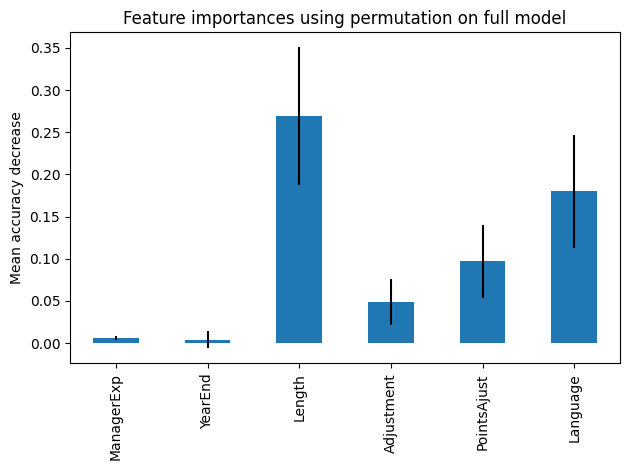

In [ ]:
# Uso de permutation importance
permu = permutation_importance(modelo_svr, x_test, y_test, n_repeats=20, random_state=42, n_jobs=2)
permu_importances = pd.Series(permu.importances_mean.round(3), index=feature_names)[permu.importances_mean.round(3) > 0.000]
fig, ax = plt.subplots()
permu_importances.plot.bar(yerr=permu.importances_std[permu.importances_mean.round(3) > 0.000], ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

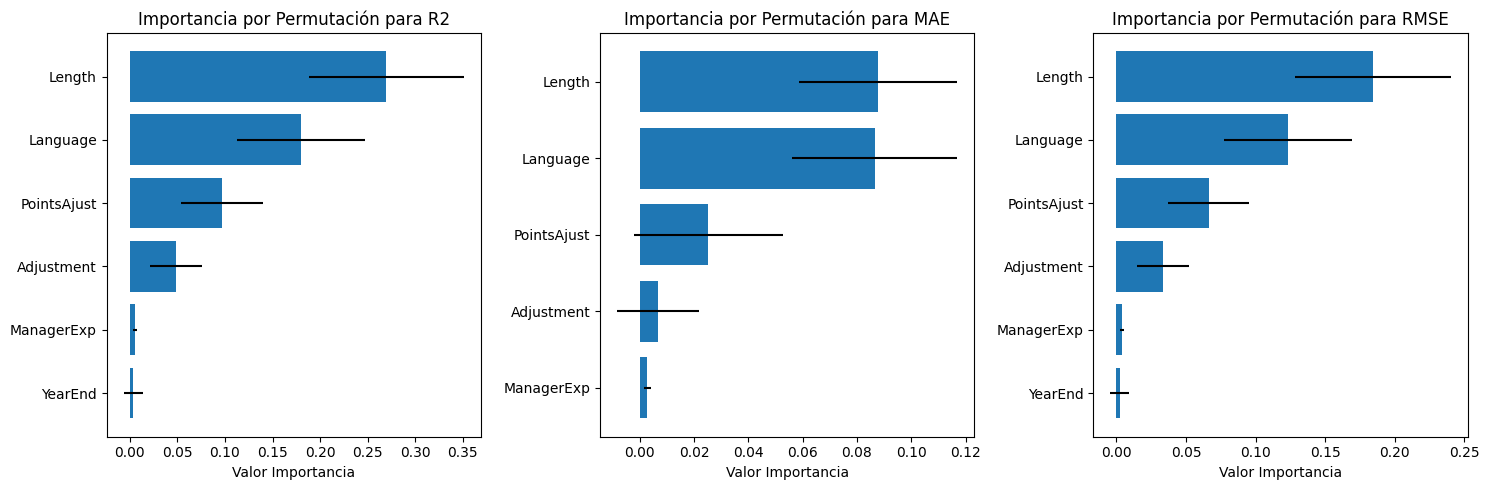

In [ ]:
scoring = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error']
metric_names = ['R2', 'MAE', 'RMSE']

permu_score = permutation_importance(modelo_svr, x_test, y_test, n_repeats=20, random_state=42, scoring=scoring)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Itera a través de las métricas
for i, metric in enumerate(scoring):
    permu = permu_score[metric]

    # Filtra las características que cumplen la condición
    filtered_indices = [j for j in range(len(permu.importances_mean)) if permu.importances_mean[j].round(3) > 0.000]
    sorted_feature_names = [feature_names[j] for j in filtered_indices]
    importances_mean = permu.importances_mean[filtered_indices]
    importances_std = permu.importances_std[filtered_indices]

    # Ordena los datos por importancia de mayor a menor
    sorted_indices = np.argsort(importances_mean)[::1]
    sorted_feature_names = [sorted_feature_names[j] for j in sorted_indices]
    importances_mean = importances_mean[sorted_indices]
    importances_std = importances_std[sorted_indices]

    # Crea la representación gráfica en el subplot correspondiente
    axs[i].barh(range(len(sorted_feature_names)), importances_mean, xerr=importances_std, align='center')
    axs[i].set_yticks(range(len(sorted_feature_names)))
    axs[i].set_yticklabels(sorted_feature_names)
    axs[i].set_xlabel('Valor Importancia')
    axs[i].set_title(f'Importancia por Permutación para {metric_names[i]}')

# Ajusta los espacios entre subplots y muestra la figura
plt.tight_layout()
plt.show()

In [ ]:
scoring = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error']

# Crea un diccionario para almacenar los DataFrames
results_global_svr = {}

permu_score = permutation_importance(modelo_svr, x_test, y_test, n_repeats=20, random_state=42, scoring=scoring)
for i, metric in enumerate(scoring):
  permu = permu_score[metric]

  # Filtra las características que cumplen la condición
  filtered_indices = [j for j in range(len(permu.importances_mean)) if permu.importances_mean[j].round(3) > 0.000]
  sorted_feature_names = [feature_names[j] for j in filtered_indices]
  importances_mean = permu.importances_mean[filtered_indices]
  importances_std = permu.importances_std[filtered_indices]



  # Crear un DataFrame con los resultados
  df_exp_global = pd.DataFrame({'Feature': sorted_feature_names,
                       'Importance_Mean': importances_mean,
                       'Importance_Std': importances_std})

  # Ordenar el DataFrame por importance_mean en orden descendente
  df_exp_global = df_exp_global.sort_values(by='Importance_Mean', ascending=False)

  # Asignar el DataFrame al diccionario con el nombre de la métrica
  results_global_svr[f'df_global_{metric_names[i]}'] = df_exp_global

In [ ]:
results_global_svr['df_global_R2']

,Feature,Importance_Mean,Importance_Std
2,Length,0.269464,0.081594
5,Language,0.180238,0.067022
4,PointsAjust,0.096820,0.042967
3,Adjustment,0.048755,0.027195
0,ManagerExp,0.005789,0.002284
1,YearEnd,0.003711,0.010011


In [ ]:
results_global_svr['df_global_MAE']

,Feature,Importance_Mean,Importance_Std
1,Length,0.087779,0.029168
4,Language,0.086490,0.030444
3,PointsAjust,0.025258,0.027368
2,Adjustment,0.006715,0.015099
0,ManagerExp,0.002675,0.001307


In [ ]:
results_global_svr['df_global_RMSE']

,Feature,Importance_Mean,Importance_Std
2,Length,0.184244,0.055789
5,Language,0.123236,0.045826
4,PointsAjust,0.066200,0.029378
3,Adjustment,0.033336,0.018595
0,ManagerExp,0.003958,0.001562
1,YearEnd,0.002537,0.006845


**BREAK-DOWN, SHAP Y LIME:**

In [ ]:
#primero definimos el explainer
exp = dx.Explainer(modelo_svr, x_train, y_train)

Preparation of a new explainer is initiated

  -> data              : 56 rows 9 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 56 values
  -> model_class       : sklearn.svm._classes.SVR (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_default at 0x7fa3aa2d7370> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = -1.04, mean = -0.0453, max = 2.83
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -2.13, mean = 0.094, max = 1.99
  -> model_info        : package sklearn

A new explainer has been created!


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


In [ ]:
#Primero obtenemos las instancias con valor estimado máximo, minimo y en la mediana.
max_index = np.argmax(y_pred)
min_index = np.argmin(y_pred)
mediana = np.median(y_pred)
#Encontrar el índice de la instancia cuyo valor estimado está en la mediana
median_index = np.argmin(np.abs(y_pred - mediana))

print("Índice de la instancia del conjunto de entrenamiento con mayor esfuerzo estimado es: ", max_index)
print("El valor máximo obtenido es: ", y_pred[max_index])
print("Ínidce de la instancia del conjunto de entrenamiento con menor esfuerzo estimado es: ", min_index)
print("El valor mínimo obtenido es: ", y_pred[min_index])
print("Índice de la instancia del conjunto de entrenamiento con esfuerzo estimado en la mediana: ", median_index)
print("El valor de la mediana es: ", y_pred[median_index])

Índice de la instancia del conjunto de entrenamiento con mayor esfuerzo estimado es:  15
El valor máximo obtenido es:  0.6801190387900158
Ínidce de la instancia del conjunto de entrenamiento con menor esfuerzo estimado es:  7
El valor mínimo obtenido es:  -1.095338858965014
Índice de la instancia del conjunto de entrenamiento con esfuerzo estimado en la mediana:  10
El valor de la mediana es:  -0.3925343835950809


In [ ]:
df_instancia_max = x_test.iloc[max_index]
df_instancia_median = x_test.iloc[median_index]
df_instancia_min = x_test.iloc[min_index]

In [ ]:
breakdown_max = exp.predict_parts(df_instancia_max, type="break_down",random_state=42)
breakdown_median = exp.predict_parts(df_instancia_median, type="break_down",random_state=42)
breakdown_min = exp.predict_parts(df_instancia_min, type="break_down",random_state=42)

shap_max = exp.predict_parts(df_instancia_max, type="shap",random_state=42)
shap_median = exp.predict_parts(df_instancia_median, type="shap",random_state=42)
shap_min = exp.predict_parts(df_instancia_min, type="shap",random_state=42)

lime_max = exp.predict_surrogate(df_instancia_max, random_state=42)
lime_median = exp.predict_surrogate(df_instancia_median, random_state=42)
lime_min = exp.predict_surrogate(df_instancia_min, random_state=42)

breakdown_df_max = breakdown_max.result
shap_df_max = shap_max.result
lime_df_max=lime_max.result
breakdown_df_median = breakdown_median.result
shap_df_median = shap_median.result
lime_df_median= lime_median.result
breakdown_df_min = breakdown_min.result
shap_df_min = shap_min.result
lime_df_min = lime_min.result

In [ ]:
breakdown_max.plot()
breakdown_median.plot()
breakdown_min.plot()

In [ ]:
shap_max.plot()
shap_median.plot()
shap_min.plot()

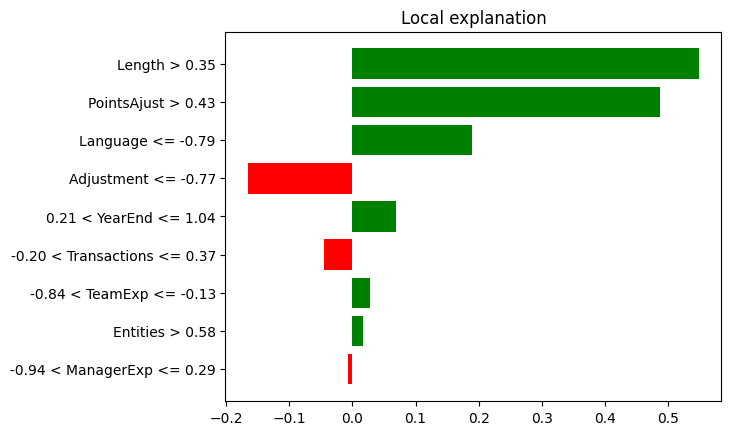

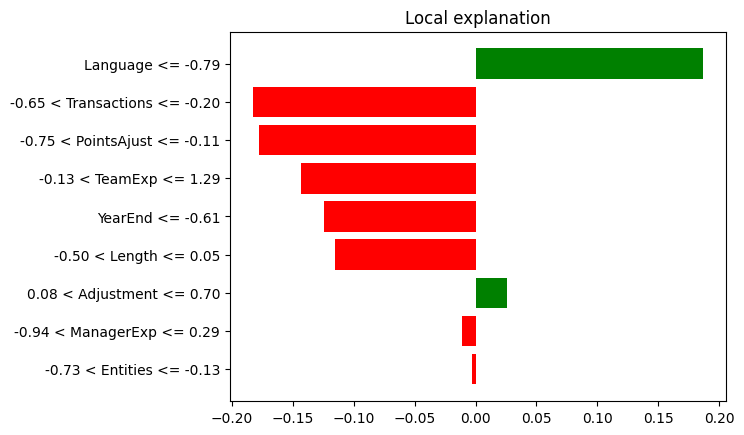

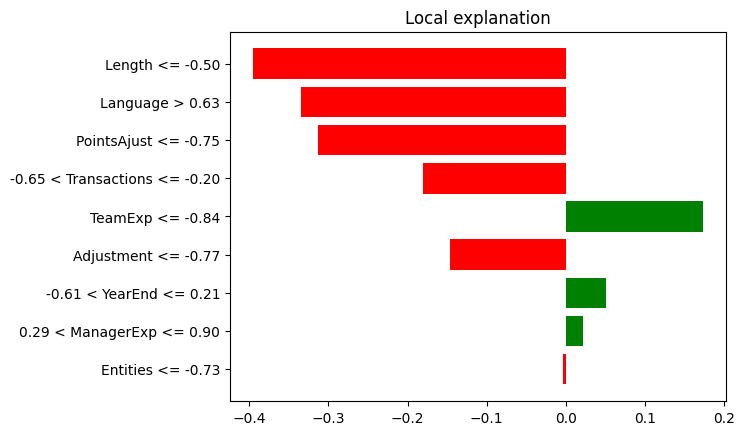

In [ ]:
lime_max.plot()
lime_median.plot()
lime_min.plot()

In [ ]:
lime_max.show_in_notebook()
lime_median.show_in_notebook()
lime_min.show_in_notebook()

### MAX:

In [ ]:
breakdown_df_max = breakdown_df_max.loc[:, ['variable_name', 'contribution', 'sign']]
breakdown_df_max = breakdown_df_max.drop(index=[0, 10])
breakdown_df_max['sign'] = breakdown_df_max['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
breakdown_df_max = breakdown_df_max.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

shap_df_max = shap_df_max.loc[:, ['variable_name', 'contribution', 'sign']]
shap_df_max = shap_df_max.tail(9)
shap_df_max['sign'] = shap_df_max['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
shap_df_max = shap_df_max.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

lime_df_max["Variable"] = lime_df_max["variable"].str.split(" ").str[0]
lime_df_max["Signo"] = lime_df_max["effect"].apply(evaluar_valor)
lime_df_max = lime_df_max.sort_values(by='effect', key=lambda x: abs(x), ascending=False)
lime_df_max = lime_df_max.drop(columns=['variable'])

# Agregar una columna de ranking
breakdown_df_max['Ranking'] = breakdown_df_max['contribution'].abs().rank(ascending=False).astype(int)
breakdown_df_max.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
breakdown_df_max = breakdown_df_max[['Variable', 'Ranking', 'contribution', 'Signo']]

shap_df_max['Ranking'] = shap_df_max['contribution'].abs().rank(ascending=False).astype(int)
shap_df_max.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
shap_df_max = shap_df_max[['Variable', 'Ranking', 'contribution', 'Signo']]

lime_df_max['Ranking'] = lime_df_max['effect'].abs().rank(ascending=False).astype(int)
lime_df_max = lime_df_max.head(5)
lime_df_max = lime_df_max[['Variable', 'Ranking', 'effect', 'Signo']]

# Elimino la columna de la contribucion
breakdown_df_max = breakdown_df_max.drop(columns=['contribution'])
shap_df_max = shap_df_max.drop(columns=['contribution'])
lime_df_max = lime_df_max.drop(columns=['effect'])

# Filtrar las 5 primeras contribuciones en valor absoluto
breakdown_df_max = breakdown_df_max.head(5)
breakdown_df_max = breakdown_df_max.reset_index(drop=True)

shap_df_max = shap_df_max.head(5)
shap_df_max = shap_df_max.reset_index(drop=True)

lime_df_max = lime_df_max.reset_index(drop=True)
lime_df_max.at[4, "Variable"] = "YearEnd"

print(breakdown_df_max)
print(shap_df_max)
print(lime_df_max)

      Variable  Ranking     Signo
0       Length        1  Positivo
1     Language        2  Positivo
2  PointsAjust        3  Positivo
3   Adjustment        4  Negativo
4      YearEnd        5  Positivo
      Variable  Ranking     Signo
0       Length        1  Positivo
1     Language        2  Positivo
2  PointsAjust        3  Positivo
3   Adjustment        4  Negativo
4      YearEnd        5  Positivo
      Variable  Ranking     Signo
0       Length        1  Positivo
1  PointsAjust        2  Positivo
2     Language        3  Positivo
3   Adjustment        4  Negativo
4      YearEnd        5  Positivo


In [ ]:
# Obtener todas las características únicas de las tres técnicas
breakdown_features = list(breakdown_df_max['Variable'])
shapley_features = list(shap_df_max['Variable'])
lime_features = list(lime_df_max['Variable'])
all_features = list(set(breakdown_features + shapley_features + lime_features))
all_features = all_features[::-1]

df_final_max = pd.DataFrame(index=range(len(all_features)), columns=columns_multi)
df_final_max['Variable'] = list(all_features)
df_final_max= df_final_max[['Variable', 'Breakdown', 'Shapley', 'Lime']]

print(breakdown_features)
print(shapley_features)
print(lime_features)
print(all_features)

for feature in df_final_max['Variable']:
    # Buscar la característica en el DataFrame de Breakdown
    breakdown_row = breakdown_df_max[breakdown_df_max['Variable'] == feature]
    if not breakdown_row.empty:
        # Si se encuentra, obtener los valores de "Ranking" y "Signo"
        ranking_breakdown = breakdown_row.iloc[0]['Ranking']
        signo_breakdown = breakdown_row.iloc[0]['Signo']
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Ranking')] = ranking_breakdown
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Signo')] = signo_breakdown
    else:
        # Si no se encuentra, añadir "-"
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Ranking')] = '-'
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Shapley
    shap_row = shap_df_max[shap_df_max['Variable'] == feature]
    if not shap_row.empty:
        ranking_shap = shap_row.iloc[0]['Ranking']
        signo_shap = shap_row.iloc[0]['Signo']
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Ranking')] = ranking_shap
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Signo')] = signo_shap
    else:
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Ranking')] = '-'
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Lime
    lime_row = lime_df_max[lime_df_max['Variable'] == feature]
    if not lime_row.empty:
        ranking_lime = lime_row.iloc[0]['Ranking']
        signo_lime = lime_row.iloc[0]['Signo']
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Ranking')] = ranking_lime
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Signo')] = signo_lime
    else:
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Ranking')] = '-'
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Signo')] = '-'

df_final_max

['Length', 'Language', 'PointsAjust', 'Adjustment', 'YearEnd']
['Length', 'Language', 'PointsAjust', 'Adjustment', 'YearEnd']
['Length', 'PointsAjust', 'Language', 'Adjustment', 'YearEnd']
['Adjustment', 'PointsAjust', 'Language', 'Length', 'YearEnd']


Variable Breakdown           Shapley              Lime          
                 Ranking     Signo Ranking     Signo Ranking     Signo
0   Adjustment         4  Negativo       4  Negativo       4  Negativo
1  PointsAjust         3  Positivo       3  Positivo       2  Positivo
2     Language         2  Positivo       2  Positivo       3  Positivo
3       Length         1  Positivo       1  Positivo       1  Positivo
4      YearEnd         5  Positivo       5  Positivo       5  Positivo

In [ ]:
df_final_max.set_index('Variable', inplace=True)
nuevo_orden = ["Length", "Language", "PointsAjust", "Adjustment", "YearEnd"]

# Reorganizar el DataFrame según el nuevo orden
df_final_max = df_final_max.reindex(nuevo_orden)

df_final_max

Breakdown           Shapley              Lime          
              Ranking     Signo Ranking     Signo Ranking     Signo
Variable                                                           
Length              1  Positivo       1  Positivo       1  Positivo
Language            2  Positivo       2  Positivo       3  Positivo
PointsAjust         3  Positivo       3  Positivo       2  Positivo
Adjustment          4  Negativo       4  Negativo       4  Negativo
YearEnd             5  Positivo       5  Positivo       5  Positivo

### MEDIAN:

In [ ]:
breakdown_df_median = breakdown_df_median.loc[:, ['variable_name', 'contribution', 'sign']]
breakdown_df_median = breakdown_df_median.drop(index=[0, 10])
breakdown_df_median['sign'] = breakdown_df_median['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
breakdown_df_median = breakdown_df_median.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

shap_df_median = shap_df_median.loc[:, ['variable_name', 'contribution', 'sign']]
shap_df_median = shap_df_median.tail(9)
shap_df_median['sign'] = shap_df_median['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
shap_df_median = shap_df_median.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

lime_df_median["Variable"] = lime_df_median["variable"].str.split(" ").str[0]
lime_df_median["Signo"] = lime_df_median["effect"].apply(evaluar_valor)
lime_df_median = lime_df_median.sort_values(by='effect', key=lambda x: abs(x), ascending=False)
lime_df_median = lime_df_median.drop(columns=['variable'])

# Agregar una columna de ranking
breakdown_df_median['Ranking'] = breakdown_df_median['contribution'].abs().rank(ascending=False).astype(int)
breakdown_df_median.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
breakdown_df_median = breakdown_df_median[['Variable', 'Ranking', 'contribution', 'Signo']]

shap_df_median['Ranking'] = shap_df_median['contribution'].abs().rank(ascending=False).astype(int)
shap_df_median.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
shap_df_median = shap_df_median[['Variable', 'Ranking', 'contribution', 'Signo']]

lime_df_median['Ranking'] = lime_df_median['effect'].abs().rank(ascending=False).astype(int)
lime_df_median = lime_df_median.head(5)
lime_df_median = lime_df_median[['Variable', 'Ranking', 'effect', 'Signo']]

# Elimino la columna de la contribucion
breakdown_df_median = breakdown_df_median.drop(columns=['contribution'])
shap_df_median = shap_df_median.drop(columns=['contribution'])
lime_df_median = lime_df_median.drop(columns=['effect'])

# Filtrar las 5 primeras contribuciones en valor absoluto
breakdown_df_median = breakdown_df_median.head(5)
breakdown_df_median = breakdown_df_median.reset_index(drop=True)

shap_df_median = shap_df_median.head(5)
shap_df_median = shap_df_median.reset_index(drop=True)

lime_df_median = lime_df_median.reset_index(drop=True)
lime_df_median.at[1, "Variable"] = "Transactions"
lime_df_median.at[2, "Variable"] = "PointsAjust"
lime_df_median.at[3, "Variable"] = "TeamExp"

print(breakdown_df_median)
print(shap_df_median)
print(lime_df_median)

       Variable  Ranking     Signo
0  Transactions        1  Negativo
1      Language        2  Positivo
2        Length        3  Negativo
3   PointsAjust        4  Negativo
4       TeamExp        5  Negativo
       Variable  Ranking     Signo
0  Transactions        1  Negativo
1      Language        2  Positivo
2        Length        3  Negativo
3   PointsAjust        4  Negativo
4       TeamExp        5  Negativo
       Variable  Ranking     Signo
0      Language        1  Positivo
1  Transactions        2  Negativo
2   PointsAjust        3  Negativo
3       TeamExp        4  Negativo
4       YearEnd        5  Negativo


In [ ]:
# Obtener todas las características únicas de las tres técnicas
breakdown_features = list(breakdown_df_median['Variable'])
shapley_features = list(shap_df_median['Variable'])
lime_features = list(lime_df_median['Variable'])
all_features = list(set(breakdown_features + shapley_features + lime_features))
all_features = all_features[::-1]

df_final_median = pd.DataFrame(index=range(len(all_features)), columns=columns_multi)
df_final_median['Variable'] = list(all_features)
df_final_median= df_final_median[['Variable', 'Breakdown', 'Shapley', 'Lime']]

print(breakdown_features)
print(shapley_features)
print(lime_features)
print(all_features)

for feature in df_final_median['Variable']:
    # Buscar la característica en el DataFrame de Breakdown
    breakdown_row = breakdown_df_median[breakdown_df_median['Variable'] == feature]
    if not breakdown_row.empty:
        # Si se encuentra, obtener los valores de "Ranking" y "Signo"
        ranking_breakdown = breakdown_row.iloc[0]['Ranking']
        signo_breakdown = breakdown_row.iloc[0]['Signo']
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Ranking')] = ranking_breakdown
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Signo')] = signo_breakdown
    else:
        # Si no se encuentra, añadir "-"
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Ranking')] = '-'
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Shapley
    shap_row = shap_df_median[shap_df_median['Variable'] == feature]
    if not shap_row.empty:
        ranking_shap = shap_row.iloc[0]['Ranking']
        signo_shap = shap_row.iloc[0]['Signo']
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Ranking')] = ranking_shap
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Signo')] = signo_shap
    else:
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Ranking')] = '-'
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Lime
    lime_row = lime_df_median[lime_df_median['Variable'] == feature]
    if not lime_row.empty:
        ranking_lime = lime_row.iloc[0]['Ranking']
        signo_lime = lime_row.iloc[0]['Signo']
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Ranking')] = ranking_lime
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Signo')] = signo_lime
    else:
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Ranking')] = '-'
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Signo')] = '-'

df_final_median

['Transactions', 'Language', 'Length', 'PointsAjust', 'TeamExp']
['Transactions', 'Language', 'Length', 'PointsAjust', 'TeamExp']
['Language', 'Transactions', 'PointsAjust', 'TeamExp', 'YearEnd']
['PointsAjust', 'TeamExp', 'Language', 'Length', 'Transactions', 'YearEnd']


Variable Breakdown           Shapley              Lime          
                  Ranking     Signo Ranking     Signo Ranking     Signo
0   PointsAjust         4  Negativo       4  Negativo       3  Negativo
1       TeamExp         5  Negativo       5  Negativo       4  Negativo
2      Language         2  Positivo       2  Positivo       1  Positivo
3        Length         3  Negativo       3  Negativo       -         -
4  Transactions         1  Negativo       1  Negativo       2  Negativo
5       YearEnd         -         -       -         -       5  Negativo

In [ ]:
df_final_median.set_index('Variable', inplace=True)
nuevo_orden = ["Transactions", "Language", "Length", "PointsAjust", "TeamExp", "YearEnd"]

# Reorganizar el DataFrame según el nuevo orden
df_final_median = df_final_median.reindex(nuevo_orden)

df_final_median

Breakdown           Shapley              Lime          
               Ranking     Signo Ranking     Signo Ranking     Signo
Variable                                                            
Transactions         1  Negativo       1  Negativo       2  Negativo
Language             2  Positivo       2  Positivo       1  Positivo
Length               3  Negativo       3  Negativo       -         -
PointsAjust          4  Negativo       4  Negativo       3  Negativo
TeamExp              5  Negativo       5  Negativo       4  Negativo
YearEnd              -         -       -         -       5  Negativo

### MIN:

In [ ]:
breakdown_df_min = breakdown_df_min.loc[:, ['variable_name', 'contribution', 'sign']]
breakdown_df_min = breakdown_df_min.drop(index=[0, 10])
breakdown_df_min['sign'] = breakdown_df_min['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
breakdown_df_min = breakdown_df_min.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

shap_df_min = shap_df_min.loc[:, ['variable_name', 'contribution', 'sign']]
shap_df_min = shap_df_min.tail(9)
shap_df_min['sign'] = shap_df_min['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
shap_df_min = shap_df_min.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

lime_df_min["Variable"] = lime_df_min["variable"].str.split(" ").str[0]
lime_df_min["Signo"] = lime_df_min["effect"].apply(evaluar_valor)
lime_df_min = lime_df_min.sort_values(by='effect', key=lambda x: abs(x), ascending=False)
lime_df_min = lime_df_min.drop(columns=['variable'])

# Agregar una columna de ranking
breakdown_df_min['Ranking'] = breakdown_df_min['contribution'].abs().rank(ascending=False).astype(int)
breakdown_df_min.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
breakdown_df_min = breakdown_df_min[['Variable', 'Ranking', 'contribution', 'Signo']]

shap_df_min['Ranking'] = shap_df_min['contribution'].abs().rank(ascending=False).astype(int)
shap_df_min.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
shap_df_min = shap_df_min[['Variable', 'Ranking', 'contribution', 'Signo']]

lime_df_min['Ranking'] = lime_df_min['effect'].abs().rank(ascending=False).astype(int)
lime_df_min = lime_df_min.head(5)
lime_df_min = lime_df_min[['Variable', 'Ranking', 'effect', 'Signo']]

# Elimino la columna de la contribucion
breakdown_df_min = breakdown_df_min.drop(columns=['contribution'])
shap_df_min = shap_df_min.drop(columns=['contribution'])
lime_df_min = lime_df_min.drop(columns=['effect'])

# Filtrar las 5 primeras contribuciones en valor absoluto
breakdown_df_min = breakdown_df_min.head(5)
breakdown_df_min = breakdown_df_min.reset_index(drop=True)

shap_df_min = shap_df_min.head(5)
shap_df_min = shap_df_min.reset_index(drop=True)

lime_df_min = lime_df_min.reset_index(drop=True)
lime_df_min.at[3, "Variable"] = "Transactions"

print(breakdown_df_min)
print(shap_df_min)
print(lime_df_min)

       Variable  Ranking     Signo
0      Language        1  Negativo
1        Length        2  Negativo
2   PointsAjust        3  Negativo
3    Adjustment        4  Negativo
4  Transactions        5  Negativo
       Variable  Ranking     Signo
0      Language        1  Negativo
1        Length        2  Negativo
2   PointsAjust        3  Negativo
3    Adjustment        4  Negativo
4  Transactions        5  Negativo
       Variable  Ranking     Signo
0        Length        1  Negativo
1      Language        2  Negativo
2   PointsAjust        3  Negativo
3  Transactions        4  Negativo
4       TeamExp        5  Positivo


In [ ]:
# Obtener todas las características únicas de las tres técnicas
breakdown_features = list(breakdown_df_min['Variable'])
shapley_features = list(shap_df_min['Variable'])
lime_features = list(lime_df_min['Variable'])
all_features = list(set(breakdown_features + shapley_features + lime_features))
all_features = all_features[::-1]

df_final_min = pd.DataFrame(index=range(len(all_features)), columns=columns_multi)
df_final_min['Variable'] = list(all_features)
df_final_min= df_final_min[['Variable', 'Breakdown', 'Shapley', 'Lime']]

print(breakdown_features)
print(shapley_features)
print(lime_features)
print(all_features)

for feature in df_final_min['Variable']:
    # Buscar la característica en el DataFrame de Breakdown
    breakdown_row = breakdown_df_min[breakdown_df_min['Variable'] == feature]
    if not breakdown_row.empty:
        # Si se encuentra, obtener los valores de "Ranking" y "Signo"
        ranking_breakdown = breakdown_row.iloc[0]['Ranking']
        signo_breakdown = breakdown_row.iloc[0]['Signo']
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Ranking')] = ranking_breakdown
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Signo')] = signo_breakdown
    else:
        # Si no se encuentra, añadir "-"
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Ranking')] = '-'
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Shapley
    shap_row = shap_df_min[shap_df_min['Variable'] == feature]
    if not shap_row.empty:
        ranking_shap = shap_row.iloc[0]['Ranking']
        signo_shap = shap_row.iloc[0]['Signo']
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Ranking')] = ranking_shap
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Signo')] = signo_shap
    else:
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Ranking')] = '-'
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Lime
    lime_row = lime_df_min[lime_df_min['Variable'] == feature]
    if not lime_row.empty:
        ranking_lime = lime_row.iloc[0]['Ranking']
        signo_lime = lime_row.iloc[0]['Signo']
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Ranking')] = ranking_lime
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Signo')] = signo_lime
    else:
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Ranking')] = '-'
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Signo')] = '-'

df_final_min

['Language', 'Length', 'PointsAjust', 'Adjustment', 'Transactions']
['Language', 'Length', 'PointsAjust', 'Adjustment', 'Transactions']
['Length', 'Language', 'PointsAjust', 'Transactions', 'TeamExp']
['Adjustment', 'PointsAjust', 'TeamExp', 'Language', 'Length', 'Transactions']


Variable Breakdown           Shapley              Lime          
                  Ranking     Signo Ranking     Signo Ranking     Signo
0    Adjustment         4  Negativo       4  Negativo       -         -
1   PointsAjust         3  Negativo       3  Negativo       3  Negativo
2       TeamExp         -         -       -         -       5  Positivo
3      Language         1  Negativo       1  Negativo       2  Negativo
4        Length         2  Negativo       2  Negativo       1  Negativo
5  Transactions         5  Negativo       5  Negativo       4  Negativo

In [ ]:
df_final_min.set_index('Variable', inplace=True)
nuevo_orden = ["Language", "Length", "PointsAjust", "Adjustment", "Transactions", "TeamExp"]

# Reorganizar el DataFrame según el nuevo orden
df_final_min = df_final_min.reindex(nuevo_orden)

df_final_min

Breakdown           Shapley              Lime          
               Ranking     Signo Ranking     Signo Ranking     Signo
Variable                                                            
Language             1  Negativo       1  Negativo       2  Negativo
Length               2  Negativo       2  Negativo       1  Negativo
PointsAjust          3  Negativo       3  Negativo       3  Negativo
Adjustment           4  Negativo       4  Negativo       -         -
Transactions         5  Negativo       5  Negativo       4  Negativo
TeamExp              -         -       -         -       5  Positivo

### GLOBAL

In [ ]:
ranking_valores = {
    'Breakdown': [],
    'Shapley': [],
    'Lime': []
}

# Recorre los DataFrames y almacena los pares de valores por técnica
for tecnica in ranking_valores:
    for caracteristica in df_final_max.index:
        ranking = df_final_max[(tecnica, 'Ranking')][caracteristica]
        if ranking != "-":
            ranking_valores[tecnica].append((caracteristica, int(ranking)))

    for caracteristica in df_final_median.index:
        ranking = df_final_median[(tecnica, 'Ranking')][caracteristica]
        if ranking != "-":
            ranking_valores[tecnica].append((caracteristica, int(ranking)))

    for caracteristica in df_final_min.index:
        ranking = df_final_min[(tecnica, 'Ranking')][caracteristica]
        if ranking != "-":
            ranking_valores[tecnica].append((caracteristica, int(ranking)))

# Calcula el ranking medio por técnica y característica
ranking_medio = {
    'Breakdown': {},
    'Shapley': {},
    'Lime': {}
}

for tecnica, ranking_values in ranking_valores.items():
    for caracteristica, ranking in ranking_values:
        if caracteristica not in ranking_medio[tecnica]:
            ranking_medio[tecnica][caracteristica] = [ranking]
        else:
            ranking_medio[tecnica][caracteristica].append(ranking)

for tecnica, ranking_values in ranking_medio.items():
    for caracteristica in ranking_values:
        ranking_medio[tecnica][caracteristica] = sum(ranking_values[caracteristica]) / len(ranking_values[caracteristica])


# Ahora el conteo de apariciones por característica y técnica
apariciones_count = {
    'Breakdown': {},
    'Shapley': {},
    'Lime': {}
}

for tecnica, ranking_values in ranking_valores.items():
    for caracteristica, _ in ranking_values:
        if caracteristica not in apariciones_count[tecnica]:
            apariciones_count[tecnica][caracteristica] = 1
        else:
            apariciones_count[tecnica][caracteristica] += 1

# Tengo los valores, los conteos de apariciones y los ranking medios por técnica en los respectivos diccionarios
print(ranking_valores)
print(apariciones_count)
print(ranking_medio)

{'Breakdown': [('Length', 1), ('Language', 2), ('PointsAjust', 3), ('Adjustment', 4), ('YearEnd', 5), ('Transactions', 1), ('Language', 2), ('Length', 3), ('PointsAjust', 4), ('TeamExp', 5), ('Language', 1), ('Length', 2), ('PointsAjust', 3), ('Adjustment', 4), ('Transactions', 5)], 'Shapley': [('Length', 1), ('Language', 2), ('PointsAjust', 3), ('Adjustment', 4), ('YearEnd', 5), ('Transactions', 1), ('Language', 2), ('Length', 3), ('PointsAjust', 4), ('TeamExp', 5), ('Language', 1), ('Length', 2), ('PointsAjust', 3), ('Adjustment', 4), ('Transactions', 5)], 'Lime': [('Length', 1), ('Language', 3), ('PointsAjust', 2), ('Adjustment', 4), ('YearEnd', 5), ('Transactions', 2), ('Language', 1), ('PointsAjust', 3), ('TeamExp', 4), ('YearEnd', 5), ('Language', 2), ('Length', 1), ('PointsAjust', 3), ('Transactions', 4), ('TeamExp', 5)]}
{'Breakdown': {'Length': 3, 'Language': 3, 'PointsAjust': 3, 'Adjustment': 2, 'YearEnd': 1, 'Transactions': 2, 'TeamExp': 1}, 'Shapley': {'Length': 3, 'Languag

In [ ]:
# Lista de técnicas
techniques = ['Breakdown', 'Shapley', 'Lime']

# Diccionario para almacenar los datos
data_dict = {}

# Crear una lista de todas las características
all_caract = list(set().union(*[set(ranking_medio[technique]) for technique in techniques]))

# Recorrer las técnicas y las características
for technique in techniques:
    caract = list(ranking_medio[technique].keys())
    rank = [ranking_medio[technique].get(c, "-") for c in all_caract]
    apar = [apariciones_count[technique].get(c, "-") for c in all_caract]

    # Agregar los datos al diccionario
    data_dict[(technique, "Ranking Medio")] = rank
    data_dict[(technique, "Conteo")] = apar

# Crear el DataFrame resumen
df_resumen_svr = pd.DataFrame(data_dict, index=all_caract)

df_resumen_svr

Breakdown              Shapley                 Lime       
             Ranking Medio Conteo Ranking Medio Conteo Ranking Medio Conteo
YearEnd           5.000000      1      5.000000      1      5.000000      2
Transactions      3.000000      2      3.000000      2      3.000000      2
Length            2.000000      3      2.000000      3      1.000000      2
Language          1.666667      3      1.666667      3      2.000000      3
TeamExp           5.000000      1      5.000000      1      4.500000      2
PointsAjust       3.333333      3      3.333333      3      2.666667      3
Adjustment        4.000000      2      4.000000      2      4.000000      1

In [ ]:
# Calcular el ranking medio general omitiendo los valores "-"
df_resumen_svr[("General", "Ranking")] = df_resumen_svr[[(tech, "Ranking Medio") for tech in techniques]].replace('-', np.nan).mean(axis=1)

# Calcular la suma total de apariciones omitiendo los valores "-"
df_resumen_svr[("General", "Conteo Total")] = df_resumen_svr[[(tech, "Conteo") for tech in techniques]].replace('-', 0).sum(axis=1)

# Mostrar el DataFrame resumen actualizado
df_resumen_svr

Breakdown              Shapley                 Lime         \
             Ranking Medio Conteo Ranking Medio Conteo Ranking Medio Conteo   
YearEnd           5.000000      1      5.000000      1      5.000000      2   
Transactions      3.000000      2      3.000000      2      3.000000      2   
Length            2.000000      3      2.000000      3      1.000000      2   
Language          1.666667      3      1.666667      3      2.000000      3   
TeamExp           5.000000      1      5.000000      1      4.500000      2   
PointsAjust       3.333333      3      3.333333      3      2.666667      3   
Adjustment        4.000000      2      4.000000      2      4.000000      1   

               General               
               Ranking Conteo Total  
YearEnd       5.000000            4  
Transactions  3.000000            6  
Length        1.666667            8  
Language      1.777778            9  
TeamExp       4.833333            4  
PointsAjust   3.111111            9  
Adjustment    4.000000            5

In [ ]:
# Obtener el número de características
num_caract = df_resumen_svr.shape[0]

# Calcular el peso para el ranking y apariciones
df_resumen_svr[("General", "Peso Rango")] = 1 - ((df_resumen_svr[("General", "Ranking")].rank(ascending=True) - 1) / num_caract)
df_resumen_svr[("General", "Peso Conteo")] = df_resumen_svr[("General", "Conteo Total")].rank(ascending=True) / num_caract

# Calcular el puntaje final como suma de los pesos
df_resumen_svr[("General", "Puntaje")] = df_resumen_svr[("General", "Peso Rango")] + df_resumen_svr[("General", "Peso Conteo")]
df_resumen_svr[("General", "Ranking")] = df_resumen_svr[("General", "Puntaje")].rank(ascending=False, method="min")

# Eliminar la subcolumnas innecesarias
df_resumen_svr.drop("Peso Rango", axis=1, level=1, inplace=True)
df_resumen_svr.drop("Peso Conteo", axis=1, level=1, inplace=True)
df_resumen_svr.drop("Puntaje", axis=1, level=1, inplace=True)

df_resumen_svr

Breakdown              Shapley                 Lime         \
             Ranking Medio Conteo Ranking Medio Conteo Ranking Medio Conteo   
YearEnd           5.000000      1      5.000000      1      5.000000      2   
Transactions      3.000000      2      3.000000      2      3.000000      2   
Length            2.000000      3      2.000000      3      1.000000      2   
Language          1.666667      3      1.666667      3      2.000000      3   
TeamExp           5.000000      1      5.000000      1      4.500000      2   
PointsAjust       3.333333      3      3.333333      3      2.666667      3   
Adjustment        4.000000      2      4.000000      2      4.000000      1   

             General               
             Ranking Conteo Total  
YearEnd          7.0            4  
Transactions     4.0            6  
Length           2.0            8  
Language         1.0            9  
TeamExp          6.0            4  
PointsAjust      3.0            9  
Adjustment       5.0            5

In [ ]:
# Obtener las columnas actuales del DataFrame
columns = df_resumen_svr.columns

# Extraer las columnas de "General" y sus subcolumnas
general_columns = columns.get_level_values(0) == "General"

# Crear una lista con las subcolumnas de "General"
general_subcolumns = [("General", "Ranking"), ("General", "Conteo Total")]

# Crear una lista con las subcolumnas asociadas a las técnicas
technique_subcolumns = list(columns[~general_columns])

# Reorganizar las columnas para mover "General" al principio
new_columns = general_subcolumns + technique_subcolumns

# Crear un nuevo DataFrame con las columnas reorganizadas
df_resumen_svr = df_resumen_svr[new_columns]

In [ ]:
df_resumen_svr.sort_values(by=("General", "Ranking"), ascending=True, inplace=True)

# Formatear los valores
for tech in techniques:
    df_resumen_svr[(tech, "Ranking Medio")] = df_resumen_svr[(tech, "Ranking Medio")].apply(lambda x: f"{x:.2f}" if isinstance(x, (int, float)) else x)

df_resumen_svr

General                  Breakdown              Shapley         \
             Ranking Conteo Total Ranking Medio Conteo Ranking Medio Conteo   
Language         1.0            9          1.67      3          1.67      3   
Length           2.0            8          2.00      3          2.00      3   
PointsAjust      3.0            9          3.33      3          3.33      3   
Transactions     4.0            6          3.00      2          3.00      2   
Adjustment       5.0            5          4.00      2          4.00      2   
TeamExp          6.0            4          5.00      1          5.00      1   
YearEnd          7.0            4          5.00      1          5.00      1   

                      Lime         
             Ranking Medio Conteo  
Language              2.00      3  
Length                1.00      2  
PointsAjust           2.67      3  
Transactions          3.00      2  
Adjustment            4.00      1  
TeamExp               4.50      2  
YearEnd               5.00      2

## **RandomForest:**

**FEATURE IMPORTANCE:**

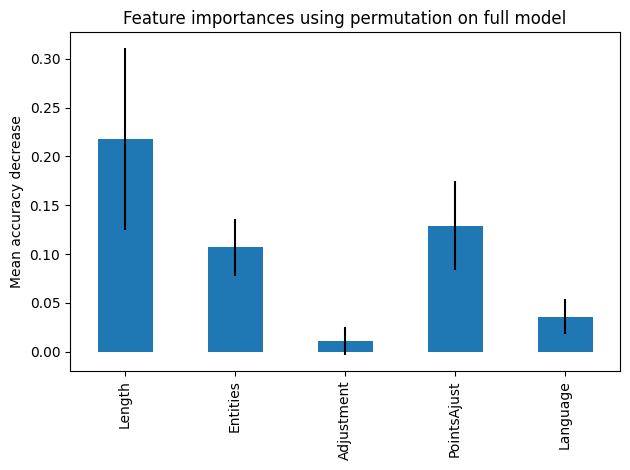

In [ ]:
# Uso de permutation importance
permu = permutation_importance(modelo_rf, x_test, y_test, n_repeats=20, random_state=42, n_jobs=2)
permu_importances = pd.Series(permu.importances_mean.round(3), index=feature_names)[permu.importances_mean.round(3) > 0.000]
fig, ax = plt.subplots()
permu_importances.plot.bar(yerr=permu.importances_std[permu.importances_mean.round(3) > 0.000], ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

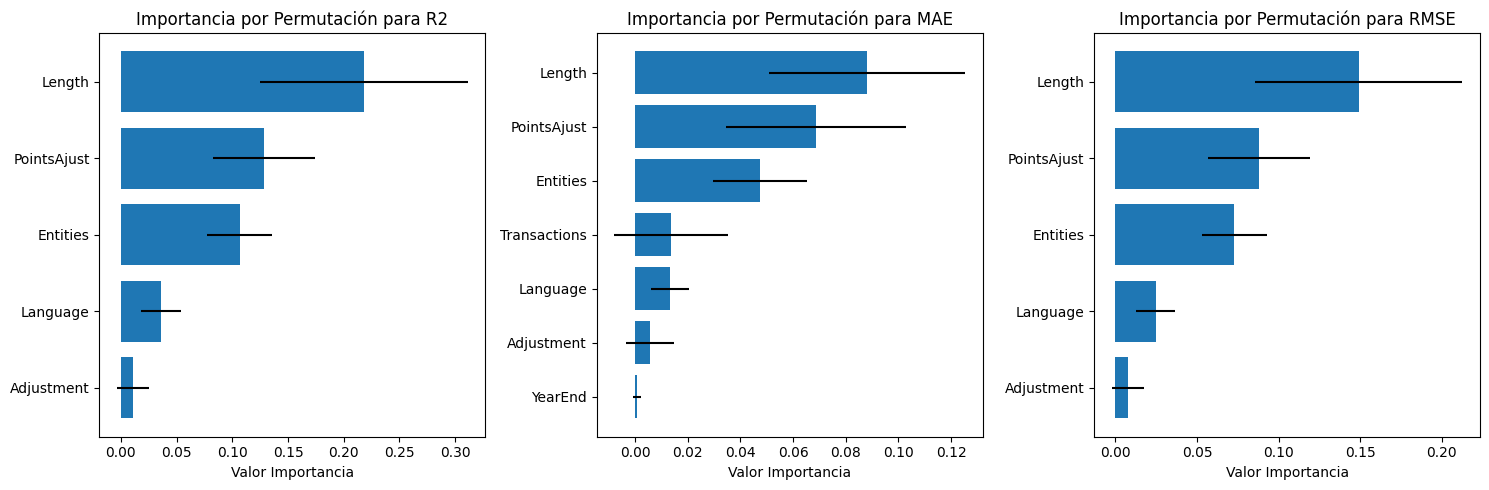

In [ ]:
scoring = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error']
metric_names = ['R2', 'MAE', 'RMSE']

permu_score = permutation_importance(modelo_rf, x_test, y_test, n_repeats=20, random_state=42, scoring=scoring)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Itera a través de las métricas
for i, metric in enumerate(scoring):
    permu = permu_score[metric]

    # Filtra las características que cumplen la condición
    filtered_indices = [j for j in range(len(permu.importances_mean)) if permu.importances_mean[j].round(3) > 0.000]
    sorted_feature_names = [feature_names[j] for j in filtered_indices]
    importances_mean = permu.importances_mean[filtered_indices]
    importances_std = permu.importances_std[filtered_indices]

    # Ordena los datos por importancia de mayor a menor
    sorted_indices = np.argsort(importances_mean)[::1]
    sorted_feature_names = [sorted_feature_names[j] for j in sorted_indices]
    importances_mean = importances_mean[sorted_indices]
    importances_std = importances_std[sorted_indices]

    # Crea la representación gráfica en el subplot correspondiente
    axs[i].barh(range(len(sorted_feature_names)), importances_mean, xerr=importances_std, align='center')
    axs[i].set_yticks(range(len(sorted_feature_names)))
    axs[i].set_yticklabels(sorted_feature_names)
    axs[i].set_xlabel('Valor Importancia')
    axs[i].set_title(f'Importancia por Permutación para {metric_names[i]}')

# Ajusta los espacios entre subplots y muestra la figura
plt.tight_layout()
plt.show()

In [ ]:
scoring = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error']

# Crea un diccionario para almacenar los DataFrames
results_global_rf = {}

permu_score = permutation_importance(modelo_rf, x_test, y_test, n_repeats=20, random_state=42, scoring=scoring)
for i, metric in enumerate(scoring):
  permu = permu_score[metric]

  # Filtra las características que cumplen la condición
  filtered_indices = [j for j in range(len(permu.importances_mean)) if permu.importances_mean[j].round(3) > 0.000]
  sorted_feature_names = [feature_names[j] for j in filtered_indices]
  importances_mean = permu.importances_mean[filtered_indices]
  importances_std = permu.importances_std[filtered_indices]



  # Crear un DataFrame con los resultados
  df_exp_global = pd.DataFrame({'Feature': sorted_feature_names,
                       'Importance_Mean': importances_mean,
                       'Importance_Std': importances_std})

  # Ordenar el DataFrame por importance_mean en orden descendente
  df_exp_global = df_exp_global.sort_values(by='Importance_Mean', ascending=False)

  # Asignar el DataFrame al diccionario con el nombre de la métrica
  results_global_rf[f'df_global_{metric_names[i]}'] = df_exp_global

In [ ]:
results_global_rf['df_global_R2']

,Feature,Importance_Mean,Importance_Std
0,Length,0.218046,0.093238
3,PointsAjust,0.128556,0.045723
1,Entities,0.106659,0.029231
4,Language,0.036069,0.017680
2,Adjustment,0.011075,0.014484


In [ ]:
results_global_rf['df_global_MAE']

,Feature,Importance_Mean,Importance_Std
1,Length,0.087988,0.037308
5,PointsAjust,0.068642,0.034109
3,Entities,0.047418,0.017744
2,Transactions,0.013648,0.021499
6,Language,0.013386,0.007256
4,Adjustment,0.005714,0.009083
0,YearEnd,0.000746,0.001398


In [ ]:
results_global_rf['df_global_RMSE']

,Feature,Importance_Mean,Importance_Std
0,Length,0.149087,0.063751
3,PointsAjust,0.087899,0.031262
1,Entities,0.072927,0.019986
4,Language,0.024662,0.012088
2,Adjustment,0.007573,0.009904


**BREAK-DOWN, SHAP Y LIME:**

In [ ]:
#primero definimos el explainer
exp = dx.Explainer(modelo_rf, x_train, y_train)

Preparation of a new explainer is initiated

  -> data              : 56 rows 9 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 56 values
  -> model_class       : sklearn.ensemble._forest.RandomForestRegressor (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_default at 0x7fa3aa2d7370> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = -0.807, mean = -0.00664, max = 1.88
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -1.37, mean = 0.0553, max = 2.45
  -> model_info        : package sklearn

A new explainer has been created!


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
#Primero obtenemos las instancias con valor estimado máximo, minimo y en la mediana.
max_index = np.argmax(y_pred)
min_index = np.argmin(y_pred)
mediana = np.median(y_pred)
#Encontrar el índice de la instancia cuyo valor estimado está en la mediana
median_index = np.argmin(np.abs(y_pred - mediana))

print("Índice de la instancia del conjunto de entrenamiento con mayor esfuerzo estimado es: ", max_index)
print("El valor máximo obtenido es: ", y_pred[max_index])
print("Ínidce de la instancia del conjunto de entrenamiento con menor esfuerzo estimado es: ", min_index)
print("El valor mínimo obtenido es: ", y_pred[min_index])
print("Índice de la instancia del conjunto de entrenamiento con esfuerzo estimado en la mediana: ", median_index)
print("El valor de la mediana es: ", y_pred[median_index])

Índice de la instancia del conjunto de entrenamiento con mayor esfuerzo estimado es:  15
El valor máximo obtenido es:  0.834966912657705
Ínidce de la instancia del conjunto de entrenamiento con menor esfuerzo estimado es:  20
El valor mínimo obtenido es:  -0.7800328650397843
Índice de la instancia del conjunto de entrenamiento con esfuerzo estimado en la mediana:  8
El valor de la mediana es:  -0.29590433895960666


In [ ]:
df_instancia_max = x_test.iloc[max_index]
df_instancia_median = x_test.iloc[median_index]
df_instancia_min = x_test.iloc[min_index]

In [ ]:
breakdown_max = exp.predict_parts(df_instancia_max, type="break_down",random_state=42)
breakdown_median = exp.predict_parts(df_instancia_median, type="break_down",random_state=42)
breakdown_min = exp.predict_parts(df_instancia_min, type="break_down",random_state=42)

shap_max = exp.predict_parts(df_instancia_max, type="shap",random_state=42)
shap_median = exp.predict_parts(df_instancia_median, type="shap",random_state=42)
shap_min = exp.predict_parts(df_instancia_min, type="shap",random_state=42)

lime_max = exp.predict_surrogate(df_instancia_max, random_state=42)
lime_median = exp.predict_surrogate(df_instancia_median, random_state=42)
lime_min = exp.predict_surrogate(df_instancia_min, random_state=42)

breakdown_df_max = breakdown_max.result
shap_df_max = shap_max.result
lime_df_max=lime_max.result
breakdown_df_median = breakdown_median.result
shap_df_median = shap_median.result
lime_df_median= lime_median.result
breakdown_df_min = breakdown_min.result
shap_df_min = shap_min.result
lime_df_min = lime_min.result

In [ ]:
breakdown_max.plot()
breakdown_median.plot()
breakdown_min.plot()

In [ ]:
shap_max.plot()
shap_median.plot()
shap_min.plot()

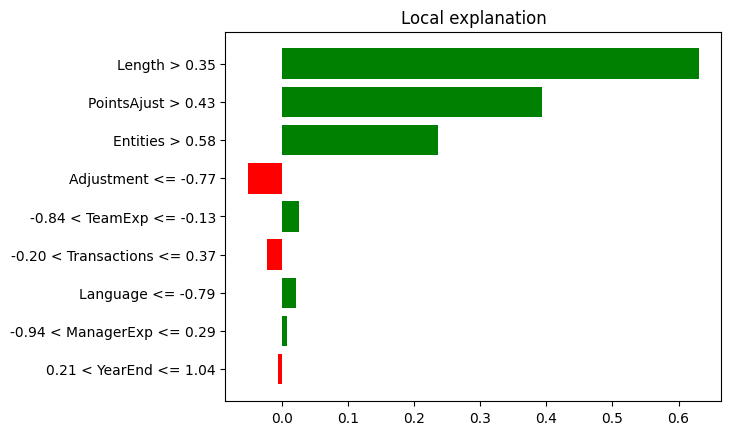

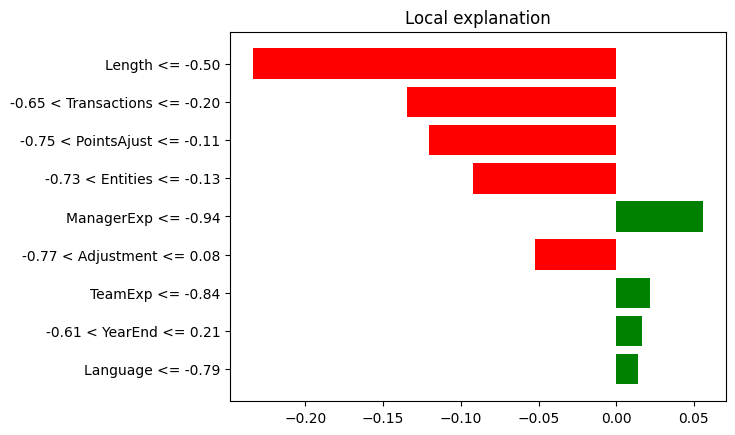

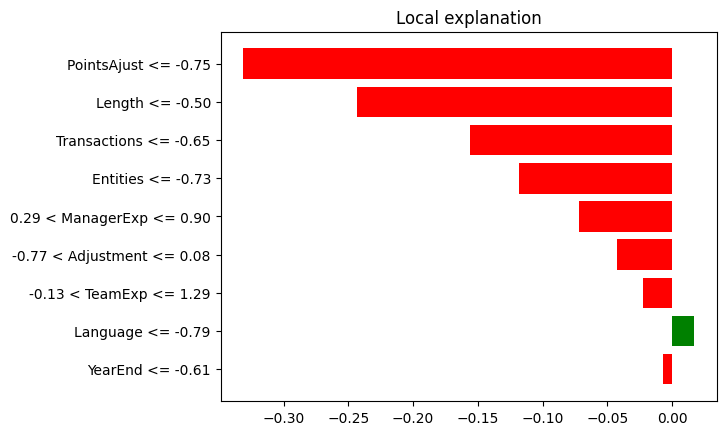

In [ ]:
lime_max.plot()
lime_median.plot()
lime_min.plot()

In [ ]:
lime_max.show_in_notebook()
lime_median.show_in_notebook()
lime_min.show_in_notebook()

### MAX:

In [ ]:
breakdown_df_max = breakdown_df_max.loc[:, ['variable_name', 'contribution', 'sign']]
breakdown_df_max = breakdown_df_max.drop(index=[0, 10])
breakdown_df_max['sign'] = breakdown_df_max['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
breakdown_df_max = breakdown_df_max.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

shap_df_max = shap_df_max.loc[:, ['variable_name', 'contribution', 'sign']]
shap_df_max = shap_df_max.tail(9)
shap_df_max['sign'] = shap_df_max['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
shap_df_max = shap_df_max.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

lime_df_max["Variable"] = lime_df_max["variable"].str.split(" ").str[0]
lime_df_max["Signo"] = lime_df_max["effect"].apply(evaluar_valor)
lime_df_max = lime_df_max.sort_values(by='effect', key=lambda x: abs(x), ascending=False)
lime_df_max = lime_df_max.drop(columns=['variable'])

# Agregar una columna de ranking
breakdown_df_max['Ranking'] = breakdown_df_max['contribution'].abs().rank(ascending=False).astype(int)
breakdown_df_max.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
breakdown_df_max = breakdown_df_max[['Variable', 'Ranking', 'contribution', 'Signo']]

shap_df_max['Ranking'] = shap_df_max['contribution'].abs().rank(ascending=False).astype(int)
shap_df_max.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
shap_df_max = shap_df_max[['Variable', 'Ranking', 'contribution', 'Signo']]

lime_df_max['Ranking'] = lime_df_max['effect'].abs().rank(ascending=False).astype(int)
lime_df_max = lime_df_max.head(5)
lime_df_max = lime_df_max[['Variable', 'Ranking', 'effect', 'Signo']]

# Elimino la columna de la contribucion
breakdown_df_max = breakdown_df_max.drop(columns=['contribution'])
shap_df_max = shap_df_max.drop(columns=['contribution'])
lime_df_max = lime_df_max.drop(columns=['effect'])

# Filtrar las 5 primeras contribuciones en valor absoluto
breakdown_df_max = breakdown_df_max.head(5)
breakdown_df_max = breakdown_df_max.reset_index(drop=True)

shap_df_max = shap_df_max.head(5)
shap_df_max = shap_df_max.reset_index(drop=True)

lime_df_max = lime_df_max.reset_index(drop=True)
lime_df_max.at[4, "Variable"] = "TeamExp"

print(breakdown_df_max)
print(shap_df_max)
print(lime_df_max)

       Variable  Ranking     Signo
0        Length        1  Positivo
1      Entities        2  Positivo
2   PointsAjust        3  Positivo
3    Adjustment        4  Negativo
4  Transactions        5  Negativo
       Variable  Ranking     Signo
0        Length        1  Positivo
1      Entities        2  Positivo
2   PointsAjust        3  Positivo
3    Adjustment        4  Negativo
4  Transactions        5  Negativo
      Variable  Ranking     Signo
0       Length        1  Positivo
1  PointsAjust        2  Positivo
2     Entities        3  Positivo
3   Adjustment        4  Negativo
4      TeamExp        5  Positivo


In [ ]:
# Obtener todas las características únicas de las tres técnicas
breakdown_features = list(breakdown_df_max['Variable'])
shapley_features = list(shap_df_max['Variable'])
lime_features = list(lime_df_max['Variable'])
all_features = list(set(breakdown_features + shapley_features + lime_features))
all_features = all_features[::-1]

df_final_max = pd.DataFrame(index=range(len(all_features)), columns=columns_multi)
df_final_max['Variable'] = list(all_features)
df_final_max= df_final_max[['Variable', 'Breakdown', 'Shapley', 'Lime']]

print(breakdown_features)
print(shapley_features)
print(lime_features)
print(all_features)

for feature in df_final_max['Variable']:
    # Buscar la característica en el DataFrame de Breakdown
    breakdown_row = breakdown_df_max[breakdown_df_max['Variable'] == feature]
    if not breakdown_row.empty:
        # Si se encuentra, obtener los valores de "Ranking" y "Signo"
        ranking_breakdown = breakdown_row.iloc[0]['Ranking']
        signo_breakdown = breakdown_row.iloc[0]['Signo']
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Ranking')] = ranking_breakdown
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Signo')] = signo_breakdown
    else:
        # Si no se encuentra, añadir "-"
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Ranking')] = '-'
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Shapley
    shap_row = shap_df_max[shap_df_max['Variable'] == feature]
    if not shap_row.empty:
        ranking_shap = shap_row.iloc[0]['Ranking']
        signo_shap = shap_row.iloc[0]['Signo']
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Ranking')] = ranking_shap
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Signo')] = signo_shap
    else:
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Ranking')] = '-'
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Lime
    lime_row = lime_df_max[lime_df_max['Variable'] == feature]
    if not lime_row.empty:
        ranking_lime = lime_row.iloc[0]['Ranking']
        signo_lime = lime_row.iloc[0]['Signo']
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Ranking')] = ranking_lime
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Signo')] = signo_lime
    else:
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Ranking')] = '-'
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Signo')] = '-'

df_final_max

['Length', 'Entities', 'PointsAjust', 'Adjustment', 'Transactions']
['Length', 'Entities', 'PointsAjust', 'Adjustment', 'Transactions']
['Length', 'PointsAjust', 'Entities', 'Adjustment', 'TeamExp']
['Adjustment', 'PointsAjust', 'Entities', 'TeamExp', 'Length', 'Transactions']


Variable Breakdown           Shapley              Lime          
                  Ranking     Signo Ranking     Signo Ranking     Signo
0    Adjustment         4  Negativo       4  Negativo       4  Negativo
1   PointsAjust         3  Positivo       3  Positivo       2  Positivo
2      Entities         2  Positivo       2  Positivo       3  Positivo
3       TeamExp         -         -       -         -       5  Positivo
4        Length         1  Positivo       1  Positivo       1  Positivo
5  Transactions         5  Negativo       5  Negativo       -         -

In [ ]:
df_final_max.set_index('Variable', inplace=True)
nuevo_orden = ["Length", "Entities", "PointsAjust", "Adjustment", "Transactions", "TeamExp"]

# Reorganizar el DataFrame según el nuevo orden
df_final_max = df_final_max.reindex(nuevo_orden)

df_final_max

Breakdown           Shapley              Lime          
               Ranking     Signo Ranking     Signo Ranking     Signo
Variable                                                            
Length               1  Positivo       1  Positivo       1  Positivo
Entities             2  Positivo       2  Positivo       3  Positivo
PointsAjust          3  Positivo       3  Positivo       2  Positivo
Adjustment           4  Negativo       4  Negativo       4  Negativo
Transactions         5  Negativo       5  Negativo       -         -
TeamExp              -         -       -         -       5  Positivo

### MEDIAN:

In [ ]:
breakdown_df_median = breakdown_df_median.loc[:, ['variable_name', 'contribution', 'sign']]
breakdown_df_median = breakdown_df_median.drop(index=[0, 10])
breakdown_df_median['sign'] = breakdown_df_median['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
breakdown_df_median = breakdown_df_median.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

shap_df_median = shap_df_median.loc[:, ['variable_name', 'contribution', 'sign']]
shap_df_median = shap_df_median.tail(9)
shap_df_median['sign'] = shap_df_median['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
shap_df_median = shap_df_median.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

lime_df_median["Variable"] = lime_df_median["variable"].str.split(" ").str[0]
lime_df_median["Signo"] = lime_df_median["effect"].apply(evaluar_valor)
lime_df_median = lime_df_median.sort_values(by='effect', key=lambda x: abs(x), ascending=False)
lime_df_median = lime_df_median.drop(columns=['variable'])

# Agregar una columna de ranking
breakdown_df_median['Ranking'] = breakdown_df_median['contribution'].abs().rank(ascending=False).astype(int)
breakdown_df_median.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
breakdown_df_median = breakdown_df_median[['Variable', 'Ranking', 'contribution', 'Signo']]

shap_df_median['Ranking'] = shap_df_median['contribution'].abs().rank(ascending=False).astype(int)
shap_df_median.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
shap_df_median = shap_df_median[['Variable', 'Ranking', 'contribution', 'Signo']]

lime_df_median['Ranking'] = lime_df_median['effect'].abs().rank(ascending=False).astype(int)
lime_df_median = lime_df_median.head(5)
lime_df_median = lime_df_median[['Variable', 'Ranking', 'effect', 'Signo']]

# Elimino la columna de la contribucion
breakdown_df_median = breakdown_df_median.drop(columns=['contribution'])
shap_df_median = shap_df_median.drop(columns=['contribution'])
lime_df_median = lime_df_median.drop(columns=['effect'])

# Filtrar las 5 primeras contribuciones en valor absoluto
breakdown_df_median = breakdown_df_median.head(5)
breakdown_df_median = breakdown_df_median.reset_index(drop=True)

shap_df_median = shap_df_median.head(5)
shap_df_median = shap_df_median.reset_index(drop=True)

lime_df_median = lime_df_median.reset_index(drop=True)
lime_df_median.at[1, "Variable"] = "Transactions"
lime_df_median.at[2, "Variable"] = "PointsAjust"
lime_df_median.at[3, "Variable"] = "Entities"

print(breakdown_df_median)
print(shap_df_median)
print(lime_df_median)

       Variable  Ranking     Signo
0        Length        1  Negativo
1   PointsAjust        2  Negativo
2      Entities        3  Negativo
3  Transactions        4  Negativo
4    Adjustment        5  Negativo
       Variable  Ranking     Signo
0        Length        1  Negativo
1  Transactions        2  Negativo
2   PointsAjust        3  Negativo
3    ManagerExp        4  Positivo
4      Entities        5  Negativo
       Variable  Ranking     Signo
0        Length        1  Negativo
1  Transactions        2  Negativo
2   PointsAjust        3  Negativo
3      Entities        4  Negativo
4    ManagerExp        5  Positivo


In [ ]:
# Obtener todas las características únicas de las tres técnicas
breakdown_features = list(breakdown_df_median['Variable'])
shapley_features = list(shap_df_median['Variable'])
lime_features = list(lime_df_median['Variable'])
all_features = list(set(breakdown_features + shapley_features + lime_features))
all_features = all_features[::-1]

df_final_median = pd.DataFrame(index=range(len(all_features)), columns=columns_multi)
df_final_median['Variable'] = list(all_features)
df_final_median= df_final_median[['Variable', 'Breakdown', 'Shapley', 'Lime']]

print(breakdown_features)
print(shapley_features)
print(lime_features)
print(all_features)

for feature in df_final_median['Variable']:
    # Buscar la característica en el DataFrame de Breakdown
    breakdown_row = breakdown_df_median[breakdown_df_median['Variable'] == feature]
    if not breakdown_row.empty:
        # Si se encuentra, obtener los valores de "Ranking" y "Signo"
        ranking_breakdown = breakdown_row.iloc[0]['Ranking']
        signo_breakdown = breakdown_row.iloc[0]['Signo']
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Ranking')] = ranking_breakdown
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Signo')] = signo_breakdown
    else:
        # Si no se encuentra, añadir "-"
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Ranking')] = '-'
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Shapley
    shap_row = shap_df_median[shap_df_median['Variable'] == feature]
    if not shap_row.empty:
        ranking_shap = shap_row.iloc[0]['Ranking']
        signo_shap = shap_row.iloc[0]['Signo']
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Ranking')] = ranking_shap
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Signo')] = signo_shap
    else:
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Ranking')] = '-'
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Lime
    lime_row = lime_df_median[lime_df_median['Variable'] == feature]
    if not lime_row.empty:
        ranking_lime = lime_row.iloc[0]['Ranking']
        signo_lime = lime_row.iloc[0]['Signo']
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Ranking')] = ranking_lime
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Signo')] = signo_lime
    else:
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Ranking')] = '-'
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Signo')] = '-'

df_final_median

['Length', 'PointsAjust', 'Entities', 'Transactions', 'Adjustment']
['Length', 'Transactions', 'PointsAjust', 'ManagerExp', 'Entities']
['Length', 'Transactions', 'PointsAjust', 'Entities', 'ManagerExp']
['Adjustment', 'ManagerExp', 'PointsAjust', 'Entities', 'Length', 'Transactions']


Variable Breakdown           Shapley              Lime          
                  Ranking     Signo Ranking     Signo Ranking     Signo
0    Adjustment         5  Negativo       -         -       -         -
1    ManagerExp         -         -       4  Positivo       5  Positivo
2   PointsAjust         2  Negativo       3  Negativo       3  Negativo
3      Entities         3  Negativo       5  Negativo       4  Negativo
4        Length         1  Negativo       1  Negativo       1  Negativo
5  Transactions         4  Negativo       2  Negativo       2  Negativo

In [ ]:
df_final_median.set_index('Variable', inplace=True)

nuevo_orden = ["Length","PointsAjust", "Entities", "Transactions", "Adjustment", "ManagerExp"]

# Reorganizar el DataFrame según el nuevo orden
df_final_median = df_final_median.reindex(nuevo_orden)

df_final_median

Breakdown           Shapley              Lime          
               Ranking     Signo Ranking     Signo Ranking     Signo
Variable                                                            
Length               1  Negativo       1  Negativo       1  Negativo
PointsAjust          2  Negativo       3  Negativo       3  Negativo
Entities             3  Negativo       5  Negativo       4  Negativo
Transactions         4  Negativo       2  Negativo       2  Negativo
Adjustment           5  Negativo       -         -       -         -
ManagerExp           -         -       4  Positivo       5  Positivo

### MIN:

In [ ]:
breakdown_df_min = breakdown_df_min.loc[:, ['variable_name', 'contribution', 'sign']]
breakdown_df_min = breakdown_df_min.drop(index=[0, 10])
breakdown_df_min['sign'] = breakdown_df_min['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
breakdown_df_min = breakdown_df_min.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

shap_df_min = shap_df_min.loc[:, ['variable_name', 'contribution', 'sign']]
shap_df_min = shap_df_min.tail(9)
shap_df_min['sign'] = shap_df_min['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
shap_df_min = shap_df_min.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

lime_df_min["Variable"] = lime_df_min["variable"].str.split(" ").str[0]
lime_df_min["Signo"] = lime_df_min["effect"].apply(evaluar_valor)
lime_df_min = lime_df_min.sort_values(by='effect', key=lambda x: abs(x), ascending=False)
lime_df_min = lime_df_min.drop(columns=['variable'])

# Agregar una columna de ranking
breakdown_df_min['Ranking'] = breakdown_df_min['contribution'].abs().rank(ascending=False).astype(int)
breakdown_df_min.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
breakdown_df_min = breakdown_df_min[['Variable', 'Ranking', 'contribution', 'Signo']]

shap_df_min['Ranking'] = shap_df_min['contribution'].abs().rank(ascending=False).astype(int)
shap_df_min.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
shap_df_min = shap_df_min[['Variable', 'Ranking', 'contribution', 'Signo']]

lime_df_min['Ranking'] = lime_df_min['effect'].abs().rank(ascending=False).astype(int)
lime_df_min = lime_df_min.head(5)
lime_df_min = lime_df_min[['Variable', 'Ranking', 'effect', 'Signo']]

# Elimino la columna de la contribucion
breakdown_df_min = breakdown_df_min.drop(columns=['contribution'])
shap_df_min = shap_df_min.drop(columns=['contribution'])
lime_df_min = lime_df_min.drop(columns=['effect'])

# Filtrar las 5 primeras contribuciones en valor absoluto
breakdown_df_min = breakdown_df_min.head(5)
breakdown_df_min = breakdown_df_min.reset_index(drop=True)

shap_df_min = shap_df_min.head(5)
shap_df_min = shap_df_min.reset_index(drop=True)

lime_df_min = lime_df_min.reset_index(drop=True)
lime_df_min.at[4, "Variable"] = "ManagerExp"

print(breakdown_df_min)
print(shap_df_min)
print(lime_df_min)

       Variable  Ranking     Signo
0   PointsAjust        1  Negativo
1        Length        2  Negativo
2      Entities        3  Negativo
3  Transactions        4  Negativo
4    Adjustment        5  Negativo
       Variable  Ranking     Signo
0   PointsAjust        1  Negativo
1        Length        2  Negativo
2  Transactions        3  Negativo
3      Entities        4  Negativo
4    ManagerExp        5  Negativo
       Variable  Ranking     Signo
0   PointsAjust        1  Negativo
1        Length        2  Negativo
2  Transactions        3  Negativo
3      Entities        4  Negativo
4    ManagerExp        5  Negativo


In [ ]:
# Obtener todas las características únicas de las tres técnicas
breakdown_features = list(breakdown_df_min['Variable'])
shapley_features = list(shap_df_min['Variable'])
lime_features = list(lime_df_min['Variable'])
all_features = list(set(breakdown_features + shapley_features + lime_features))
all_features = all_features[::-1]

df_final_min = pd.DataFrame(index=range(len(all_features)), columns=columns_multi)
df_final_min['Variable'] = list(all_features)
df_final_min= df_final_min[['Variable', 'Breakdown', 'Shapley', 'Lime']]

print(breakdown_features)
print(shapley_features)
print(lime_features)
print(all_features)

for feature in df_final_min['Variable']:
    # Buscar la característica en el DataFrame de Breakdown
    breakdown_row = breakdown_df_min[breakdown_df_min['Variable'] == feature]
    if not breakdown_row.empty:
        # Si se encuentra, obtener los valores de "Ranking" y "Signo"
        ranking_breakdown = breakdown_row.iloc[0]['Ranking']
        signo_breakdown = breakdown_row.iloc[0]['Signo']
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Ranking')] = ranking_breakdown
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Signo')] = signo_breakdown
    else:
        # Si no se encuentra, añadir "-"
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Ranking')] = '-'
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Shapley
    shap_row = shap_df_min[shap_df_min['Variable'] == feature]
    if not shap_row.empty:
        ranking_shap = shap_row.iloc[0]['Ranking']
        signo_shap = shap_row.iloc[0]['Signo']
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Ranking')] = ranking_shap
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Signo')] = signo_shap
    else:
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Ranking')] = '-'
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Lime
    lime_row = lime_df_min[lime_df_min['Variable'] == feature]
    if not lime_row.empty:
        ranking_lime = lime_row.iloc[0]['Ranking']
        signo_lime = lime_row.iloc[0]['Signo']
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Ranking')] = ranking_lime
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Signo')] = signo_lime
    else:
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Ranking')] = '-'
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Signo')] = '-'

df_final_min

['PointsAjust', 'Length', 'Entities', 'Transactions', 'Adjustment']
['PointsAjust', 'Length', 'Transactions', 'Entities', 'ManagerExp']
['PointsAjust', 'Length', 'Transactions', 'Entities', 'ManagerExp']
['Adjustment', 'ManagerExp', 'PointsAjust', 'Entities', 'Length', 'Transactions']


Variable Breakdown           Shapley              Lime          
                  Ranking     Signo Ranking     Signo Ranking     Signo
0    Adjustment         5  Negativo       -         -       -         -
1    ManagerExp         -         -       5  Negativo       5  Negativo
2   PointsAjust         1  Negativo       1  Negativo       1  Negativo
3      Entities         3  Negativo       4  Negativo       4  Negativo
4        Length         2  Negativo       2  Negativo       2  Negativo
5  Transactions         4  Negativo       3  Negativo       3  Negativo

In [ ]:
df_final_min.set_index('Variable', inplace=True)
nuevo_orden = ["PointsAjust", "Length", "Entities", "Transactions", "Adjustment", "ManagerExp"]

# Reorganizar el DataFrame según el nuevo orden
df_final_min = df_final_min.reindex(nuevo_orden)

df_final_min

Breakdown           Shapley              Lime          
               Ranking     Signo Ranking     Signo Ranking     Signo
Variable                                                            
PointsAjust          1  Negativo       1  Negativo       1  Negativo
Length               2  Negativo       2  Negativo       2  Negativo
Entities             3  Negativo       4  Negativo       4  Negativo
Transactions         4  Negativo       3  Negativo       3  Negativo
Adjustment           5  Negativo       -         -       -         -
ManagerExp           -         -       5  Negativo       5  Negativo

### GLOBAL

In [ ]:
ranking_valores = {
    'Breakdown': [],
    'Shapley': [],
    'Lime': []
}

# Recorre los DataFrames y almacena los pares de valores por técnica
for tecnica in ranking_valores:
    for caracteristica in df_final_max.index:
        ranking = df_final_max[(tecnica, 'Ranking')][caracteristica]
        if ranking != "-":
            ranking_valores[tecnica].append((caracteristica, int(ranking)))

    for caracteristica in df_final_median.index:
        ranking = df_final_median[(tecnica, 'Ranking')][caracteristica]
        if ranking != "-":
            ranking_valores[tecnica].append((caracteristica, int(ranking)))

    for caracteristica in df_final_min.index:
        ranking = df_final_min[(tecnica, 'Ranking')][caracteristica]
        if ranking != "-":
            ranking_valores[tecnica].append((caracteristica, int(ranking)))

# Calcula el ranking medio por técnica y característica
ranking_medio = {
    'Breakdown': {},
    'Shapley': {},
    'Lime': {}
}

for tecnica, ranking_values in ranking_valores.items():
    for caracteristica, ranking in ranking_values:
        if caracteristica not in ranking_medio[tecnica]:
            ranking_medio[tecnica][caracteristica] = [ranking]
        else:
            ranking_medio[tecnica][caracteristica].append(ranking)

for tecnica, ranking_values in ranking_medio.items():
    for caracteristica in ranking_values:
        ranking_medio[tecnica][caracteristica] = sum(ranking_values[caracteristica]) / len(ranking_values[caracteristica])


# Ahora el conteo de apariciones por característica y técnica
apariciones_count = {
    'Breakdown': {},
    'Shapley': {},
    'Lime': {}
}

for tecnica, ranking_values in ranking_valores.items():
    for caracteristica, _ in ranking_values:
        if caracteristica not in apariciones_count[tecnica]:
            apariciones_count[tecnica][caracteristica] = 1
        else:
            apariciones_count[tecnica][caracteristica] += 1

# Tengo los valores, los conteos de apariciones y los ranking medios por técnica en los respectivos diccionarios
print(ranking_valores)
print(apariciones_count)
print(ranking_medio)

{'Breakdown': [('Length', 1), ('Entities', 2), ('PointsAjust', 3), ('Adjustment', 4), ('Transactions', 5), ('Length', 1), ('PointsAjust', 2), ('Entities', 3), ('Transactions', 4), ('Adjustment', 5), ('PointsAjust', 1), ('Length', 2), ('Entities', 3), ('Transactions', 4), ('Adjustment', 5)], 'Shapley': [('Length', 1), ('Entities', 2), ('PointsAjust', 3), ('Adjustment', 4), ('Transactions', 5), ('Length', 1), ('PointsAjust', 3), ('Entities', 5), ('Transactions', 2), ('ManagerExp', 4), ('PointsAjust', 1), ('Length', 2), ('Entities', 4), ('Transactions', 3), ('ManagerExp', 5)], 'Lime': [('Length', 1), ('Entities', 3), ('PointsAjust', 2), ('Adjustment', 4), ('TeamExp', 5), ('Length', 1), ('PointsAjust', 3), ('Entities', 4), ('Transactions', 2), ('ManagerExp', 5), ('PointsAjust', 1), ('Length', 2), ('Entities', 4), ('Transactions', 3), ('ManagerExp', 5)]}
{'Breakdown': {'Length': 3, 'Entities': 3, 'PointsAjust': 3, 'Adjustment': 3, 'Transactions': 3}, 'Shapley': {'Length': 3, 'Entities': 3, 

In [ ]:
# Lista de técnicas
techniques = ['Breakdown', 'Shapley', 'Lime']

# Diccionario para almacenar los datos
data_dict = {}

# Crear una lista de todas las características
all_caract = list(set().union(*[set(ranking_medio[technique]) for technique in techniques]))

# Recorrer las técnicas y las características
for technique in techniques:
    caract = list(ranking_medio[technique].keys())
    rank = [ranking_medio[technique].get(c, "-") for c in all_caract]
    apar = [apariciones_count[technique].get(c, "-") for c in all_caract]

    # Agregar los datos al diccionario
    data_dict[(technique, "Ranking Medio")] = rank
    data_dict[(technique, "Conteo")] = apar

# Crear el DataFrame resumen
df_resumen_rf = pd.DataFrame(data_dict, index=all_caract)

df_resumen_rf

Breakdown              Shapley                 Lime       
             Ranking Medio Conteo Ranking Medio Conteo Ranking Medio Conteo
Transactions      4.333333      3      3.333333      3      2.500000      2
Length            1.333333      3      1.333333      3      1.333333      3
TeamExp                  -      -             -      -      5.000000      1
Entities          2.666667      3      3.666667      3      3.666667      3
PointsAjust            2.0      3      2.333333      3      2.000000      3
ManagerExp               -      -           4.5      2      5.000000      2
Adjustment        4.666667      3           4.0      1      4.000000      1

In [ ]:
# Calcular el ranking medio general omitiendo los valores "-"
df_resumen_rf[("General", "Ranking")] = df_resumen_rf[[(tech, "Ranking Medio") for tech in techniques]].replace('-', np.nan).mean(axis=1)

# Calcular la suma total de apariciones omitiendo los valores "-"
df_resumen_rf[("General", "Conteo Total")] = df_resumen_rf[[(tech, "Conteo") for tech in techniques]].replace('-', 0).sum(axis=1)

# Mostrar el DataFrame resumen actualizado
df_resumen_rf

Breakdown              Shapley                 Lime         \
             Ranking Medio Conteo Ranking Medio Conteo Ranking Medio Conteo   
Transactions      4.333333      3      3.333333      3      2.500000      2   
Length            1.333333      3      1.333333      3      1.333333      3   
TeamExp                  -      -             -      -      5.000000      1   
Entities          2.666667      3      3.666667      3      3.666667      3   
PointsAjust            2.0      3      2.333333      3      2.000000      3   
ManagerExp               -      -           4.5      2      5.000000      2   
Adjustment        4.666667      3           4.0      1      4.000000      1   

               General               
               Ranking Conteo Total  
Transactions  3.388889            8  
Length        1.333333            9  
TeamExp       5.000000            1  
Entities      3.333333            9  
PointsAjust   2.111111            9  
ManagerExp    4.750000            4  
Adjustment    4.222222            5

In [ ]:
# Obtener el número de características
num_caract = df_resumen_rf.shape[0]

# Calcular el peso para el ranking y apariciones
df_resumen_rf[("General", "Peso Rango")] = 1 - ((df_resumen_rf[("General", "Ranking")].rank(ascending=True) - 1) / num_caract)
df_resumen_rf[("General", "Peso Conteo")] = df_resumen_rf[("General", "Conteo Total")].rank(ascending=True) / num_caract

# Calcular el puntaje final como suma de los pesos
df_resumen_rf[("General", "Puntaje")] = df_resumen_rf[("General", "Peso Rango")] + df_resumen_rf[("General", "Peso Conteo")]
df_resumen_rf[("General", "Ranking")] = df_resumen_rf[("General", "Puntaje")].rank(ascending=False, method="min")

# Eliminar la subcolumnas innecesarias
df_resumen_rf.drop("Peso Rango", axis=1, level=1, inplace=True)
df_resumen_rf.drop("Peso Conteo", axis=1, level=1, inplace=True)
df_resumen_rf.drop("Puntaje", axis=1, level=1, inplace=True)

df_resumen_rf

Breakdown              Shapley                 Lime         \
             Ranking Medio Conteo Ranking Medio Conteo Ranking Medio Conteo   
Transactions      4.333333      3      3.333333      3      2.500000      2   
Length            1.333333      3      1.333333      3      1.333333      3   
TeamExp                  -      -             -      -      5.000000      1   
Entities          2.666667      3      3.666667      3      3.666667      3   
PointsAjust            2.0      3      2.333333      3      2.000000      3   
ManagerExp               -      -           4.5      2      5.000000      2   
Adjustment        4.666667      3           4.0      1      4.000000      1   

             General               
             Ranking Conteo Total  
Transactions     4.0            8  
Length           1.0            9  
TeamExp          7.0            1  
Entities         3.0            9  
PointsAjust      2.0            9  
ManagerExp       6.0            4  
Adjustment       5.0            5

In [ ]:
# Obtener las columnas actuales del DataFrame
columns = df_resumen_rf.columns

# Extraer las columnas de "General" y sus subcolumnas
general_columns = columns.get_level_values(0) == "General"

# Crear una lista con las subcolumnas de "General"
general_subcolumns = [("General", "Ranking"), ("General", "Conteo Total")]

# Crear una lista con las subcolumnas asociadas a las técnicas
technique_subcolumns = list(columns[~general_columns])

# Reorganizar las columnas para mover "General" al principio
new_columns = general_subcolumns + technique_subcolumns

# Crear un nuevo DataFrame con las columnas reorganizadas
df_resumen_rf = df_resumen_rf[new_columns]

In [ ]:
df_resumen_rf.sort_values(by=("General", "Ranking"), ascending=True, inplace=True)

# Formatear los valores
for tech in techniques:
    df_resumen_rf[(tech, "Ranking Medio")] = df_resumen_rf[(tech, "Ranking Medio")].apply(lambda x: f"{x:.2f}" if isinstance(x, (int, float)) else x)

df_resumen_rf

General                  Breakdown              Shapley         \
             Ranking Conteo Total Ranking Medio Conteo Ranking Medio Conteo   
Length           1.0            9          1.33      3          1.33      3   
PointsAjust      2.0            9          2.00      3          2.33      3   
Entities         3.0            9          2.67      3          3.67      3   
Transactions     4.0            8          4.33      3          3.33      3   
Adjustment       5.0            5          4.67      3          4.00      1   
ManagerExp       6.0            4             -      -          4.50      2   
TeamExp          7.0            1             -      -             -      -   

                      Lime         
             Ranking Medio Conteo  
Length                1.33      3  
PointsAjust           2.00      3  
Entities              3.67      3  
Transactions          2.50      2  
Adjustment            4.00      1  
ManagerExp            5.00      2  
TeamExp               5.00      1

## **GradientBoostingRegresor:**

**FEATURE IMPORTANCE:**

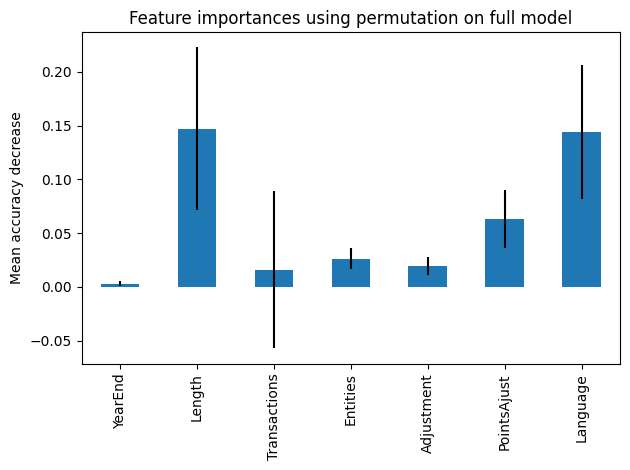

In [ ]:
# Uso de permutation importance
permu = permutation_importance(modelo_gbr, x_test, y_test, n_repeats=20, random_state=42, n_jobs=2)
permu_importances = pd.Series(permu.importances_mean.round(3), index=feature_names)[permu.importances_mean.round(3) > 0.000]
fig, ax = plt.subplots()
permu_importances.plot.bar(yerr=permu.importances_std[permu.importances_mean.round(3) > 0.000], ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

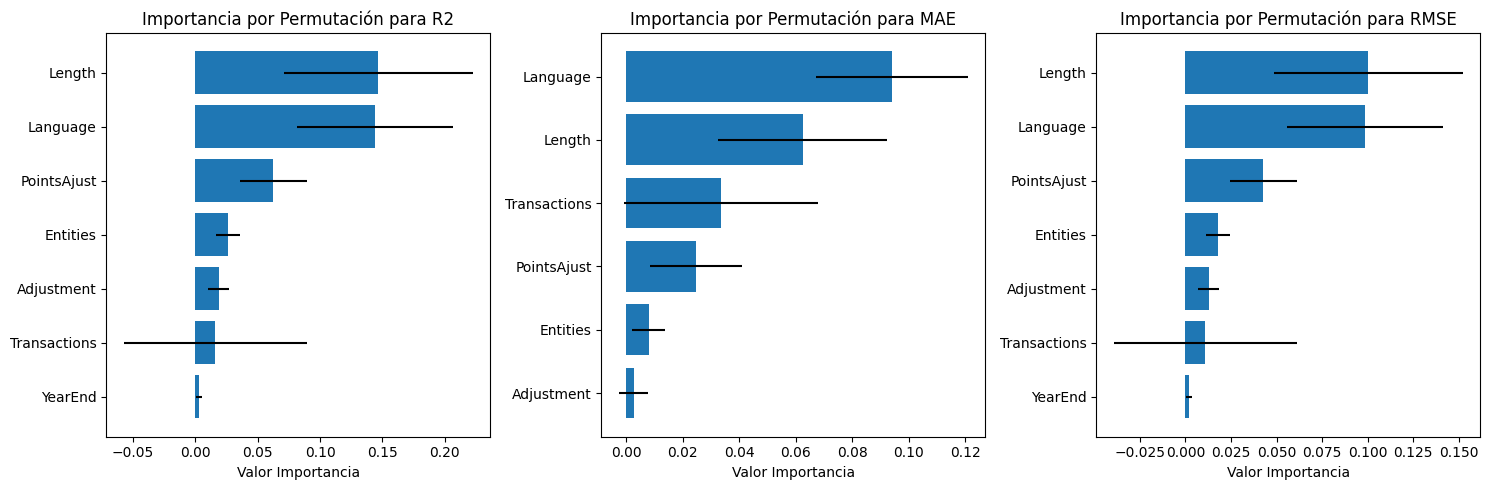

In [ ]:
scoring = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error']
metric_names = ['R2', 'MAE', 'RMSE']

permu_score = permutation_importance(modelo_gbr, x_test, y_test, n_repeats=20, random_state=42, scoring=scoring)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Itera a través de las métricas
for i, metric in enumerate(scoring):
    permu = permu_score[metric]

    # Filtra las características que cumplen la condición
    filtered_indices = [j for j in range(len(permu.importances_mean)) if permu.importances_mean[j].round(3) > 0.000]
    sorted_feature_names = [feature_names[j] for j in filtered_indices]
    importances_mean = permu.importances_mean[filtered_indices]
    importances_std = permu.importances_std[filtered_indices]

    # Ordena los datos por importancia de mayor a menor
    sorted_indices = np.argsort(importances_mean)[::1]
    sorted_feature_names = [sorted_feature_names[j] for j in sorted_indices]
    importances_mean = importances_mean[sorted_indices]
    importances_std = importances_std[sorted_indices]

    # Crea la representación gráfica en el subplot correspondiente
    axs[i].barh(range(len(sorted_feature_names)), importances_mean, xerr=importances_std, align='center')
    axs[i].set_yticks(range(len(sorted_feature_names)))
    axs[i].set_yticklabels(sorted_feature_names)
    axs[i].set_xlabel('Valor Importancia')
    axs[i].set_title(f'Importancia por Permutación para {metric_names[i]}')

# Ajusta los espacios entre subplots y muestra la figura
plt.tight_layout()
plt.show()

In [ ]:
scoring = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error']

# Crea un diccionario para almacenar los DataFrames
results_global_gbr = {}

permu_score = permutation_importance(modelo_gbr, x_test, y_test, n_repeats=20, random_state=42, scoring=scoring)
for i, metric in enumerate(scoring):
  permu = permu_score[metric]

  # Filtra las características que cumplen la condición
  filtered_indices = [j for j in range(len(permu.importances_mean)) if permu.importances_mean[j].round(3) > 0.000]
  sorted_feature_names = [feature_names[j] for j in filtered_indices]
  importances_mean = permu.importances_mean[filtered_indices]
  importances_std = permu.importances_std[filtered_indices]



  # Crear un DataFrame con los resultados
  df_exp_global = pd.DataFrame({'Feature': sorted_feature_names,
                       'Importance_Mean': importances_mean,
                       'Importance_Std': importances_std})

  # Ordenar el DataFrame por importance_mean en orden descendente
  df_exp_global = df_exp_global.sort_values(by='Importance_Mean', ascending=False)

  # Asignar el DataFrame al diccionario con el nombre de la métrica
  results_global_gbr[f'df_global_{metric_names[i]}'] = df_exp_global

In [ ]:
results_global_gbr['df_global_R2']

,Feature,Importance_Mean,Importance_Std
1,Length,0.146653,0.075627
6,Language,0.143991,0.062604
5,PointsAjust,0.062541,0.026876
3,Entities,0.025919,0.009712
4,Adjustment,0.018789,0.008387
2,Transactions,0.015942,0.073245
0,YearEnd,0.003020,0.002118


In [ ]:
results_global_gbr['df_global_MAE']

,Feature,Importance_Mean,Importance_Std
5,Language,0.093953,0.026810
0,Length,0.062580,0.029873
1,Transactions,0.033680,0.034309
4,PointsAjust,0.024787,0.016198
2,Entities,0.008110,0.005817
3,Adjustment,0.002672,0.005160


In [ ]:
results_global_gbr['df_global_RMSE']

,Feature,Importance_Mean,Importance_Std
1,Length,0.100273,0.051710
6,Language,0.098453,0.042805
5,PointsAjust,0.042762,0.018376
3,Entities,0.017722,0.006640
4,Adjustment,0.012847,0.005735
2,Transactions,0.010900,0.050081
0,YearEnd,0.002065,0.001448


**BREAK-DOWN, SHAP Y LIME:**

In [ ]:
#primero definimos el explainer
exp = dx.Explainer(modelo_gbr, x_train, y_train)

Preparation of a new explainer is initiated

  -> data              : 56 rows 9 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 56 values
  -> model_class       : sklearn.ensemble._gb.GradientBoostingRegressor (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_default at 0x7fa3aa2d7370> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = -0.972, mean = -0.121, max = 1.07
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -1.09, mean = 0.169, max = 3.28
  -> model_info        : package sklearn

A new explainer has been created!


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


In [ ]:
#Primero obtenemos las instancias con valor estimado máximo, minimo y en la mediana.
max_index = np.argmax(y_pred)
min_index = np.argmin(y_pred)
mediana = np.median(y_pred)
#Encontrar el índice de la instancia cuyo valor estimado está en la mediana
median_index = np.argmin(np.abs(y_pred - mediana))

print("Índice de la instancia del conjunto de entrenamiento con mayor esfuerzo estimado es: ", max_index)
print("El valor máximo obtenido es: ", y_pred[max_index])
print("Ínidce de la instancia del conjunto de entrenamiento con menor esfuerzo estimado es: ", min_index)
print("El valor mínimo obtenido es: ", y_pred[min_index])
print("Índice de la instancia del conjunto de entrenamiento con esfuerzo estimado en la mediana: ", median_index)
print("El valor de la mediana es: ", y_pred[median_index])

Índice de la instancia del conjunto de entrenamiento con mayor esfuerzo estimado es:  13
El valor máximo obtenido es:  0.9594260452403744
Ínidce de la instancia del conjunto de entrenamiento con menor esfuerzo estimado es:  7
El valor mínimo obtenido es:  -1.1363471359452502
Índice de la instancia del conjunto de entrenamiento con esfuerzo estimado en la mediana:  22
El valor de la mediana es:  -0.4402663054558107


In [ ]:
df_instancia_max = x_test.iloc[max_index]
df_instancia_median = x_test.iloc[median_index]
df_instancia_min = x_test.iloc[min_index]

In [ ]:
breakdown_max = exp.predict_parts(df_instancia_max, type="break_down",random_state=42)
breakdown_median = exp.predict_parts(df_instancia_median, type="break_down",random_state=42)
breakdown_min = exp.predict_parts(df_instancia_min, type="break_down",random_state=42)

shap_max = exp.predict_parts(df_instancia_max, type="shap",random_state=42)
shap_median = exp.predict_parts(df_instancia_median, type="shap",random_state=42)
shap_min = exp.predict_parts(df_instancia_min, type="shap",random_state=42)

lime_max = exp.predict_surrogate(df_instancia_max, random_state=42)
lime_median = exp.predict_surrogate(df_instancia_median, random_state=42)
lime_min = exp.predict_surrogate(df_instancia_min, random_state=42)

breakdown_df_max = breakdown_max.result
shap_df_max = shap_max.result
lime_df_max=lime_max.result
breakdown_df_median = breakdown_median.result
shap_df_median = shap_median.result
lime_df_median= lime_median.result
breakdown_df_min = breakdown_min.result
shap_df_min = shap_min.result
lime_df_min = lime_min.result

In [ ]:
breakdown_max.plot()
breakdown_median.plot()
breakdown_min.plot()

In [ ]:
shap_max.plot()
shap_median.plot()
shap_min.plot()

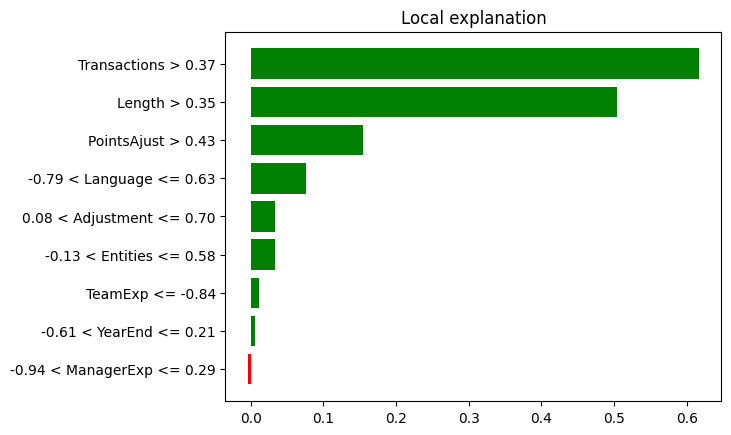

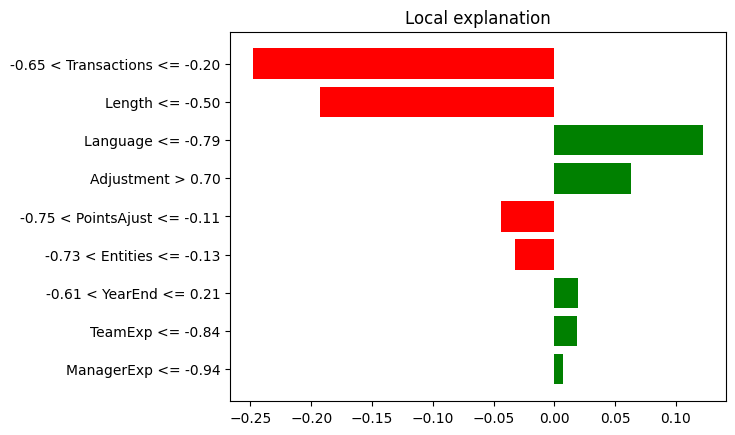

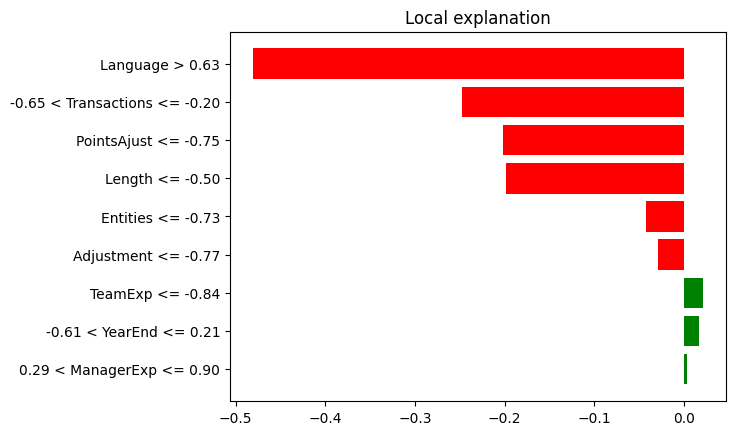

In [ ]:
lime_max.plot()
lime_median.plot()
lime_min.plot()

In [ ]:
lime_max.show_in_notebook()
lime_median.show_in_notebook()
lime_min.show_in_notebook()

### MAX:

In [ ]:
breakdown_df_max = breakdown_df_max.loc[:, ['variable_name', 'contribution', 'sign']]
breakdown_df_max = breakdown_df_max.drop(index=[0, 10])
breakdown_df_max['sign'] = breakdown_df_max['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
breakdown_df_max = breakdown_df_max.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

shap_df_max = shap_df_max.loc[:, ['variable_name', 'contribution', 'sign']]
shap_df_max = shap_df_max.tail(9)
shap_df_max['sign'] = shap_df_max['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
shap_df_max = shap_df_max.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

lime_df_max["Variable"] = lime_df_max["variable"].str.split(" ").str[0]
lime_df_max["Signo"] = lime_df_max["effect"].apply(evaluar_valor)
lime_df_max = lime_df_max.sort_values(by='effect', key=lambda x: abs(x), ascending=False)
lime_df_max = lime_df_max.drop(columns=['variable'])

# Agregar una columna de ranking
breakdown_df_max['Ranking'] = breakdown_df_max['contribution'].abs().rank(ascending=False).astype(int)
breakdown_df_max.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
breakdown_df_max = breakdown_df_max[['Variable', 'Ranking', 'contribution', 'Signo']]

shap_df_max['Ranking'] = shap_df_max['contribution'].abs().rank(ascending=False).astype(int)
shap_df_max.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
shap_df_max = shap_df_max[['Variable', 'Ranking', 'contribution', 'Signo']]

lime_df_max['Ranking'] = lime_df_max['effect'].abs().rank(ascending=False).astype(int)
lime_df_max = lime_df_max.head(5)
lime_df_max = lime_df_max[['Variable', 'Ranking', 'effect', 'Signo']]

# Elimino la columna de la contribucion
breakdown_df_max = breakdown_df_max.drop(columns=['contribution'])
shap_df_max = shap_df_max.drop(columns=['contribution'])
lime_df_max = lime_df_max.drop(columns=['effect'])

# Filtrar las 5 primeras contribuciones en valor absoluto
breakdown_df_max = breakdown_df_max.head(5)
breakdown_df_max = breakdown_df_max.reset_index(drop=True)

shap_df_max = shap_df_max.head(5)
shap_df_max = shap_df_max.reset_index(drop=True)

lime_df_max = lime_df_max.reset_index(drop=True)
lime_df_max.at[3, "Variable"] = "Language"
lime_df_max.at[4, "Variable"] = "Adjustment"

print(breakdown_df_max)
print(shap_df_max)
print(lime_df_max)

       Variable  Ranking     Signo
0  Transactions        1  Positivo
1        Length        2  Positivo
2   PointsAjust        3  Positivo
3      Language        4  Positivo
4      Entities        5  Positivo
       Variable  Ranking     Signo
0  Transactions        1  Positivo
1        Length        2  Positivo
2   PointsAjust        3  Positivo
3      Language        4  Positivo
4      Entities        5  Positivo
       Variable  Ranking     Signo
0  Transactions        1  Positivo
1        Length        2  Positivo
2   PointsAjust        3  Positivo
3      Language        4  Positivo
4    Adjustment        5  Positivo


In [ ]:
# Obtener todas las características únicas de las tres técnicas
breakdown_features = list(breakdown_df_max['Variable'])
shapley_features = list(shap_df_max['Variable'])
lime_features = list(lime_df_max['Variable'])
all_features = list(set(breakdown_features + shapley_features + lime_features))
all_features = all_features[::-1]

df_final_max = pd.DataFrame(index=range(len(all_features)), columns=columns_multi)
df_final_max['Variable'] = list(all_features)
df_final_max= df_final_max[['Variable', 'Breakdown', 'Shapley', 'Lime']]

print(breakdown_features)
print(shapley_features)
print(lime_features)
print(all_features)

for feature in df_final_max['Variable']:
    # Buscar la característica en el DataFrame de Breakdown
    breakdown_row = breakdown_df_max[breakdown_df_max['Variable'] == feature]
    if not breakdown_row.empty:
        # Si se encuentra, obtener los valores de "Ranking" y "Signo"
        ranking_breakdown = breakdown_row.iloc[0]['Ranking']
        signo_breakdown = breakdown_row.iloc[0]['Signo']
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Ranking')] = ranking_breakdown
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Signo')] = signo_breakdown
    else:
        # Si no se encuentra, añadir "-"
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Ranking')] = '-'
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Shapley
    shap_row = shap_df_max[shap_df_max['Variable'] == feature]
    if not shap_row.empty:
        ranking_shap = shap_row.iloc[0]['Ranking']
        signo_shap = shap_row.iloc[0]['Signo']
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Ranking')] = ranking_shap
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Signo')] = signo_shap
    else:
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Ranking')] = '-'
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Lime
    lime_row = lime_df_max[lime_df_max['Variable'] == feature]
    if not lime_row.empty:
        ranking_lime = lime_row.iloc[0]['Ranking']
        signo_lime = lime_row.iloc[0]['Signo']
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Ranking')] = ranking_lime
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Signo')] = signo_lime
    else:
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Ranking')] = '-'
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Signo')] = '-'

df_final_max

['Transactions', 'Length', 'PointsAjust', 'Language', 'Entities']
['Transactions', 'Length', 'PointsAjust', 'Language', 'Entities']
['Transactions', 'Length', 'PointsAjust', 'Language', 'Adjustment']
['Adjustment', 'PointsAjust', 'Entities', 'Language', 'Length', 'Transactions']


Variable Breakdown           Shapley              Lime          
                  Ranking     Signo Ranking     Signo Ranking     Signo
0    Adjustment         -         -       -         -       5  Positivo
1   PointsAjust         3  Positivo       3  Positivo       3  Positivo
2      Entities         5  Positivo       5  Positivo       -         -
3      Language         4  Positivo       4  Positivo       4  Positivo
4        Length         2  Positivo       2  Positivo       2  Positivo
5  Transactions         1  Positivo       1  Positivo       1  Positivo

In [ ]:
df_final_max.set_index('Variable', inplace=True)
nuevo_orden = ["Transactions", "Length", "PointsAjust", "Language", "Entities", "Adjustment"]

# Reorganizar el DataFrame según el nuevo orden
df_final_max = df_final_max.reindex(nuevo_orden)

df_final_max

Breakdown           Shapley              Lime          
               Ranking     Signo Ranking     Signo Ranking     Signo
Variable                                                            
Transactions         1  Positivo       1  Positivo       1  Positivo
Length               2  Positivo       2  Positivo       2  Positivo
PointsAjust          3  Positivo       3  Positivo       3  Positivo
Language             4  Positivo       4  Positivo       4  Positivo
Entities             5  Positivo       5  Positivo       -         -
Adjustment           -         -       -         -       5  Positivo

### MEDIAN:

In [ ]:
breakdown_df_median = breakdown_df_median.loc[:, ['variable_name', 'contribution', 'sign']]
breakdown_df_median = breakdown_df_median.drop(index=[0, 10])
breakdown_df_median['sign'] = breakdown_df_median['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
breakdown_df_median = breakdown_df_median.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

shap_df_median = shap_df_median.loc[:, ['variable_name', 'contribution', 'sign']]
shap_df_median = shap_df_median.tail(9)
shap_df_median['sign'] = shap_df_median['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
shap_df_median = shap_df_median.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

lime_df_median["Variable"] = lime_df_median["variable"].str.split(" ").str[0]
lime_df_median["Signo"] = lime_df_median["effect"].apply(evaluar_valor)
lime_df_median = lime_df_median.sort_values(by='effect', key=lambda x: abs(x), ascending=False)
lime_df_median = lime_df_median.drop(columns=['variable'])

# Agregar una columna de ranking
breakdown_df_median['Ranking'] = breakdown_df_median['contribution'].abs().rank(ascending=False).astype(int)
breakdown_df_median.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
breakdown_df_median = breakdown_df_median[['Variable', 'Ranking', 'contribution', 'Signo']]

shap_df_median['Ranking'] = shap_df_median['contribution'].abs().rank(ascending=False).astype(int)
shap_df_median.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
shap_df_median = shap_df_median[['Variable', 'Ranking', 'contribution', 'Signo']]

lime_df_median['Ranking'] = lime_df_median['effect'].abs().rank(ascending=False).astype(int)
lime_df_median = lime_df_median.head(5)
lime_df_median = lime_df_median[['Variable', 'Ranking', 'effect', 'Signo']]

# Elimino la columna de la contribucion
breakdown_df_median = breakdown_df_median.drop(columns=['contribution'])
shap_df_median = shap_df_median.drop(columns=['contribution'])
lime_df_median = lime_df_median.drop(columns=['effect'])

# Filtrar las 5 primeras contribuciones en valor absoluto
breakdown_df_median = breakdown_df_median.head(5)
breakdown_df_median = breakdown_df_median.reset_index(drop=True)

shap_df_median = shap_df_median.head(5)
shap_df_median = shap_df_median.reset_index(drop=True)

lime_df_median = lime_df_median.reset_index(drop=True)
lime_df_median.at[0, "Variable"] = "Transactions"
lime_df_median.at[4, "Variable"] = "PointsAjust"

print(breakdown_df_median)
print(shap_df_median)
print(lime_df_median)

       Variable  Ranking     Signo
0  Transactions        1  Negativo
1        Length        2  Negativo
2   PointsAjust        3  Negativo
3      Language        4  Positivo
4    Adjustment        5  Positivo
       Variable  Ranking     Signo
0  Transactions        1  Negativo
1        Length        2  Negativo
2   PointsAjust        3  Negativo
3      Language        4  Positivo
4    Adjustment        5  Positivo
       Variable  Ranking     Signo
0  Transactions        1  Negativo
1        Length        2  Negativo
2      Language        3  Positivo
3    Adjustment        4  Positivo
4   PointsAjust        5  Negativo


In [ ]:
# Obtener todas las características únicas de las tres técnicas
breakdown_features = list(breakdown_df_median['Variable'])
shapley_features = list(shap_df_median['Variable'])
lime_features = list(lime_df_median['Variable'])
all_features = list(set(breakdown_features + shapley_features + lime_features))
all_features = all_features[::-1]

df_final_median = pd.DataFrame(index=range(len(all_features)), columns=columns_multi)
df_final_median['Variable'] = list(all_features)
df_final_median= df_final_median[['Variable', 'Breakdown', 'Shapley', 'Lime']]

print(breakdown_features)
print(shapley_features)
print(lime_features)
print(all_features)

for feature in df_final_median['Variable']:
    # Buscar la característica en el DataFrame de Breakdown
    breakdown_row = breakdown_df_median[breakdown_df_median['Variable'] == feature]
    if not breakdown_row.empty:
        # Si se encuentra, obtener los valores de "Ranking" y "Signo"
        ranking_breakdown = breakdown_row.iloc[0]['Ranking']
        signo_breakdown = breakdown_row.iloc[0]['Signo']
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Ranking')] = ranking_breakdown
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Signo')] = signo_breakdown
    else:
        # Si no se encuentra, añadir "-"
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Ranking')] = '-'
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Shapley
    shap_row = shap_df_median[shap_df_median['Variable'] == feature]
    if not shap_row.empty:
        ranking_shap = shap_row.iloc[0]['Ranking']
        signo_shap = shap_row.iloc[0]['Signo']
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Ranking')] = ranking_shap
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Signo')] = signo_shap
    else:
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Ranking')] = '-'
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Lime
    lime_row = lime_df_median[lime_df_median['Variable'] == feature]
    if not lime_row.empty:
        ranking_lime = lime_row.iloc[0]['Ranking']
        signo_lime = lime_row.iloc[0]['Signo']
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Ranking')] = ranking_lime
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Signo')] = signo_lime
    else:
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Ranking')] = '-'
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Signo')] = '-'

df_final_median

['Transactions', 'Length', 'PointsAjust', 'Language', 'Adjustment']
['Transactions', 'Length', 'PointsAjust', 'Language', 'Adjustment']
['Transactions', 'Length', 'Language', 'Adjustment', 'PointsAjust']
['Adjustment', 'PointsAjust', 'Language', 'Length', 'Transactions']


Variable Breakdown           Shapley              Lime          
                  Ranking     Signo Ranking     Signo Ranking     Signo
0    Adjustment         5  Positivo       5  Positivo       4  Positivo
1   PointsAjust         3  Negativo       3  Negativo       5  Negativo
2      Language         4  Positivo       4  Positivo       3  Positivo
3        Length         2  Negativo       2  Negativo       2  Negativo
4  Transactions         1  Negativo       1  Negativo       1  Negativo

In [ ]:
df_final_median.set_index('Variable', inplace=True)
nuevo_orden = ["Transactions", "Length", "PointsAjust", "Language", "Adjustment"]

# Reorganizar el DataFrame según el nuevo orden
df_final_median = df_final_median.reindex(nuevo_orden)

df_final_median

Breakdown           Shapley              Lime          
               Ranking     Signo Ranking     Signo Ranking     Signo
Variable                                                            
Transactions         1  Negativo       1  Negativo       1  Negativo
Length               2  Negativo       2  Negativo       2  Negativo
PointsAjust          3  Negativo       3  Negativo       5  Negativo
Language             4  Positivo       4  Positivo       3  Positivo
Adjustment           5  Positivo       5  Positivo       4  Positivo

### MIN:

In [ ]:
breakdown_df_min = breakdown_df_min.loc[:, ['variable_name', 'contribution', 'sign']]
breakdown_df_min = breakdown_df_min.drop(index=[0, 10])
breakdown_df_min['sign'] = breakdown_df_min['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
breakdown_df_min = breakdown_df_min.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

shap_df_min = shap_df_min.loc[:, ['variable_name', 'contribution', 'sign']]
shap_df_min = shap_df_min.tail(9)
shap_df_min['sign'] = shap_df_min['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
shap_df_min = shap_df_min.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

lime_df_min["Variable"] = lime_df_min["variable"].str.split(" ").str[0]
lime_df_min["Signo"] = lime_df_min["effect"].apply(evaluar_valor)
lime_df_min = lime_df_min.sort_values(by='effect', key=lambda x: abs(x), ascending=False)
lime_df_min = lime_df_min.drop(columns=['variable'])

# Agregar una columna de ranking
breakdown_df_min['Ranking'] = breakdown_df_min['contribution'].abs().rank(ascending=False).astype(int)
breakdown_df_min.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
breakdown_df_min = breakdown_df_min[['Variable', 'Ranking', 'contribution', 'Signo']]

shap_df_min['Ranking'] = shap_df_min['contribution'].abs().rank(ascending=False).astype(int)
shap_df_min.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
shap_df_min = shap_df_min[['Variable', 'Ranking', 'contribution', 'Signo']]

lime_df_min['Ranking'] = lime_df_min['effect'].abs().rank(ascending=False).astype(int)
lime_df_min = lime_df_min.head(5)
lime_df_min = lime_df_min[['Variable', 'Ranking', 'effect', 'Signo']]

# Elimino la columna de la contribucion
breakdown_df_min = breakdown_df_min.drop(columns=['contribution'])
shap_df_min = shap_df_min.drop(columns=['contribution'])
lime_df_min = lime_df_min.drop(columns=['effect'])

# Filtrar las 5 primeras contribuciones en valor absoluto
breakdown_df_min = breakdown_df_min.head(5)
breakdown_df_min = breakdown_df_min.reset_index(drop=True)

shap_df_min = shap_df_min.head(5)
shap_df_min = shap_df_min.reset_index(drop=True)

lime_df_min = lime_df_min.reset_index(drop=True)
lime_df_min.at[1, "Variable"] = "Transactions"

print(breakdown_df_min)
print(shap_df_min)
print(lime_df_min)

       Variable  Ranking     Signo
0      Language        1  Negativo
1   PointsAjust        2  Negativo
2  Transactions        3  Negativo
3        Length        4  Negativo
4      Entities        5  Negativo
       Variable  Ranking     Signo
0      Language        1  Negativo
1   PointsAjust        2  Negativo
2  Transactions        3  Negativo
3        Length        4  Negativo
4      Entities        5  Negativo
       Variable  Ranking     Signo
0      Language        1  Negativo
1  Transactions        2  Negativo
2   PointsAjust        3  Negativo
3        Length        4  Negativo
4      Entities        5  Negativo


In [ ]:
# Obtener todas las características únicas de las tres técnicas
breakdown_features = list(breakdown_df_min['Variable'])
shapley_features = list(shap_df_min['Variable'])
lime_features = list(lime_df_min['Variable'])
all_features = list(set(breakdown_features + shapley_features + lime_features))
all_features = all_features[::-1]

df_final_min = pd.DataFrame(index=range(len(all_features)), columns=columns_multi)
df_final_min['Variable'] = list(all_features)
df_final_min= df_final_min[['Variable', 'Breakdown', 'Shapley', 'Lime']]

print(breakdown_features)
print(shapley_features)
print(lime_features)
print(all_features)

for feature in df_final_min['Variable']:
    # Buscar la característica en el DataFrame de Breakdown
    breakdown_row = breakdown_df_min[breakdown_df_min['Variable'] == feature]
    if not breakdown_row.empty:
        # Si se encuentra, obtener los valores de "Ranking" y "Signo"
        ranking_breakdown = breakdown_row.iloc[0]['Ranking']
        signo_breakdown = breakdown_row.iloc[0]['Signo']
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Ranking')] = ranking_breakdown
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Signo')] = signo_breakdown
    else:
        # Si no se encuentra, añadir "-"
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Ranking')] = '-'
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Shapley
    shap_row = shap_df_min[shap_df_min['Variable'] == feature]
    if not shap_row.empty:
        ranking_shap = shap_row.iloc[0]['Ranking']
        signo_shap = shap_row.iloc[0]['Signo']
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Ranking')] = ranking_shap
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Signo')] = signo_shap
    else:
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Ranking')] = '-'
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Lime
    lime_row = lime_df_min[lime_df_min['Variable'] == feature]
    if not lime_row.empty:
        ranking_lime = lime_row.iloc[0]['Ranking']
        signo_lime = lime_row.iloc[0]['Signo']
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Ranking')] = ranking_lime
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Signo')] = signo_lime
    else:
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Ranking')] = '-'
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Signo')] = '-'

df_final_min

['Language', 'PointsAjust', 'Transactions', 'Length', 'Entities']
['Language', 'PointsAjust', 'Transactions', 'Length', 'Entities']
['Language', 'Transactions', 'PointsAjust', 'Length', 'Entities']
['PointsAjust', 'Entities', 'Language', 'Length', 'Transactions']


Variable Breakdown           Shapley              Lime          
                  Ranking     Signo Ranking     Signo Ranking     Signo
0   PointsAjust         2  Negativo       2  Negativo       3  Negativo
1      Entities         5  Negativo       5  Negativo       5  Negativo
2      Language         1  Negativo       1  Negativo       1  Negativo
3        Length         4  Negativo       4  Negativo       4  Negativo
4  Transactions         3  Negativo       3  Negativo       2  Negativo

In [ ]:
df_final_min.set_index('Variable', inplace=True)
nuevo_orden = ["Language", "PointsAjust", "Transactions", "Length", "Entities"]

# Reorganizar el DataFrame según el nuevo orden
df_final_min = df_final_min.reindex(nuevo_orden)

df_final_min

Breakdown           Shapley              Lime          
               Ranking     Signo Ranking     Signo Ranking     Signo
Variable                                                            
Language             1  Negativo       1  Negativo       1  Negativo
PointsAjust          2  Negativo       2  Negativo       3  Negativo
Transactions         3  Negativo       3  Negativo       2  Negativo
Length               4  Negativo       4  Negativo       4  Negativo
Entities             5  Negativo       5  Negativo       5  Negativo

### GLOBAL

In [ ]:
ranking_valores = {
    'Breakdown': [],
    'Shapley': [],
    'Lime': []
}

# Recorre los DataFrames y almacena los pares de valores por técnica
for tecnica in ranking_valores:
    for caracteristica in df_final_max.index:
        ranking = df_final_max[(tecnica, 'Ranking')][caracteristica]
        if ranking != "-":
            ranking_valores[tecnica].append((caracteristica, int(ranking)))

    for caracteristica in df_final_median.index:
        ranking = df_final_median[(tecnica, 'Ranking')][caracteristica]
        if ranking != "-":
            ranking_valores[tecnica].append((caracteristica, int(ranking)))

    for caracteristica in df_final_min.index:
        ranking = df_final_min[(tecnica, 'Ranking')][caracteristica]
        if ranking != "-":
            ranking_valores[tecnica].append((caracteristica, int(ranking)))

# Calcula el ranking medio por técnica y característica
ranking_medio = {
    'Breakdown': {},
    'Shapley': {},
    'Lime': {}
}

for tecnica, ranking_values in ranking_valores.items():
    for caracteristica, ranking in ranking_values:
        if caracteristica not in ranking_medio[tecnica]:
            ranking_medio[tecnica][caracteristica] = [ranking]
        else:
            ranking_medio[tecnica][caracteristica].append(ranking)

for tecnica, ranking_values in ranking_medio.items():
    for caracteristica in ranking_values:
        ranking_medio[tecnica][caracteristica] = sum(ranking_values[caracteristica]) / len(ranking_values[caracteristica])


# Ahora el conteo de apariciones por característica y técnica
apariciones_count = {
    'Breakdown': {},
    'Shapley': {},
    'Lime': {}
}

for tecnica, ranking_values in ranking_valores.items():
    for caracteristica, _ in ranking_values:
        if caracteristica not in apariciones_count[tecnica]:
            apariciones_count[tecnica][caracteristica] = 1
        else:
            apariciones_count[tecnica][caracteristica] += 1

# Tengo los valores, los conteos de apariciones y los ranking medios por técnica en los respectivos diccionarios
print(ranking_valores)
print(apariciones_count)
print(ranking_medio)

{'Breakdown': [('Transactions', 1), ('Length', 2), ('PointsAjust', 3), ('Language', 4), ('Entities', 5), ('Transactions', 1), ('Length', 2), ('PointsAjust', 3), ('Language', 4), ('Adjustment', 5), ('Language', 1), ('PointsAjust', 2), ('Transactions', 3), ('Length', 4), ('Entities', 5)], 'Shapley': [('Transactions', 1), ('Length', 2), ('PointsAjust', 3), ('Language', 4), ('Entities', 5), ('Transactions', 1), ('Length', 2), ('PointsAjust', 3), ('Language', 4), ('Adjustment', 5), ('Language', 1), ('PointsAjust', 2), ('Transactions', 3), ('Length', 4), ('Entities', 5)], 'Lime': [('Transactions', 1), ('Length', 2), ('PointsAjust', 3), ('Language', 4), ('Adjustment', 5), ('Transactions', 1), ('Length', 2), ('PointsAjust', 5), ('Language', 3), ('Adjustment', 4), ('Language', 1), ('PointsAjust', 3), ('Transactions', 2), ('Length', 4), ('Entities', 5)]}
{'Breakdown': {'Transactions': 3, 'Length': 3, 'PointsAjust': 3, 'Language': 3, 'Entities': 2, 'Adjustment': 1}, 'Shapley': {'Transactions': 3,

In [ ]:
# Lista de técnicas
techniques = ['Breakdown', 'Shapley', 'Lime']

# Diccionario para almacenar los datos
data_dict = {}

# Crear una lista de todas las características
all_caract = list(set().union(*[set(ranking_medio[technique]) for technique in techniques]))

# Recorrer las técnicas y las características
for technique in techniques:
    caract = list(ranking_medio[technique].keys())
    rank = [ranking_medio[technique].get(c, "-") for c in all_caract]
    apar = [apariciones_count[technique].get(c, "-") for c in all_caract]

    # Agregar los datos al diccionario
    data_dict[(technique, "Ranking Medio")] = rank
    data_dict[(technique, "Conteo")] = apar

# Crear el DataFrame resumen
df_resumen_gbr = pd.DataFrame(data_dict, index=all_caract)

df_resumen_gbr

Breakdown              Shapley                 Lime       
             Ranking Medio Conteo Ranking Medio Conteo Ranking Medio Conteo
Transactions      1.666667      3      1.666667      3      1.333333      3
Length            2.666667      3      2.666667      3      2.666667      3
Language          3.000000      3      3.000000      3      2.666667      3
Entities          5.000000      2      5.000000      2      5.000000      1
PointsAjust       2.666667      3      2.666667      3      3.666667      3
Adjustment        5.000000      1      5.000000      1      4.500000      2

In [ ]:
# Calcular el ranking medio general omitiendo los valores "-"
df_resumen_gbr[("General", "Ranking")] = df_resumen_gbr[[(tech, "Ranking Medio") for tech in techniques]].replace('-', np.nan).mean(axis=1)

# Calcular la suma total de apariciones omitiendo los valores "-"
df_resumen_gbr[("General", "Conteo Total")] = df_resumen_gbr[[(tech, "Conteo") for tech in techniques]].replace('-', 0).sum(axis=1)

# Mostrar el DataFrame resumen actualizado
df_resumen_gbr

Breakdown              Shapley                 Lime         \
             Ranking Medio Conteo Ranking Medio Conteo Ranking Medio Conteo   
Transactions      1.666667      3      1.666667      3      1.333333      3   
Length            2.666667      3      2.666667      3      2.666667      3   
Language          3.000000      3      3.000000      3      2.666667      3   
Entities          5.000000      2      5.000000      2      5.000000      1   
PointsAjust       2.666667      3      2.666667      3      3.666667      3   
Adjustment        5.000000      1      5.000000      1      4.500000      2   

               General               
               Ranking Conteo Total  
Transactions  1.555556            9  
Length        2.666667            9  
Language      2.888889            9  
Entities      5.000000            5  
PointsAjust   3.000000            9  
Adjustment    4.833333            4

In [ ]:
# Obtener el número de características
num_caract = df_resumen_gbr.shape[0]

# Calcular el peso para el ranking y apariciones
df_resumen_gbr[("General", "Peso Rango")] = 1 - ((df_resumen_gbr[("General", "Ranking")].rank(ascending=True) - 1) / num_caract)
df_resumen_gbr[("General", "Peso Conteo")] = df_resumen_gbr[("General", "Conteo Total")].rank(ascending=True) / num_caract

# Calcular el puntaje final como suma de los pesos
df_resumen_gbr[("General", "Puntaje")] = df_resumen_gbr[("General", "Peso Rango")] + df_resumen_gbr[("General", "Peso Conteo")]
df_resumen_gbr[("General", "Ranking")] = df_resumen_gbr[("General", "Puntaje")].rank(ascending=False, method="min")

# Eliminar la subcolumnas innecesarias
df_resumen_gbr.drop("Peso Rango", axis=1, level=1, inplace=True)
df_resumen_gbr.drop("Peso Conteo", axis=1, level=1, inplace=True)
df_resumen_gbr.drop("Puntaje", axis=1, level=1, inplace=True)

df_resumen_gbr

Breakdown              Shapley                 Lime         \
             Ranking Medio Conteo Ranking Medio Conteo Ranking Medio Conteo   
Transactions      1.666667      3      1.666667      3      1.333333      3   
Length            2.666667      3      2.666667      3      2.666667      3   
Language          3.000000      3      3.000000      3      2.666667      3   
Entities          5.000000      2      5.000000      2      5.000000      1   
PointsAjust       2.666667      3      2.666667      3      3.666667      3   
Adjustment        5.000000      1      5.000000      1      4.500000      2   

             General               
             Ranking Conteo Total  
Transactions     1.0            9  
Length           2.0            9  
Language         3.0            9  
Entities         6.0            5  
PointsAjust      4.0            9  
Adjustment       5.0            4

In [ ]:
# Obtener las columnas actuales del DataFrame
columns = df_resumen_gbr.columns

# Extraer las columnas de "General" y sus subcolumnas
general_columns = columns.get_level_values(0) == "General"

# Crear una lista con las subcolumnas de "General"
general_subcolumns = [("General", "Ranking"), ("General", "Conteo Total")]

# Crear una lista con las subcolumnas asociadas a las técnicas
technique_subcolumns = list(columns[~general_columns])

# Reorganizar las columnas para mover "General" al principio
new_columns = general_subcolumns + technique_subcolumns

# Crear un nuevo DataFrame con las columnas reorganizadas
df_resumen_gbr = df_resumen_gbr[new_columns]

In [ ]:
df_resumen_gbr.sort_values(by=("General", "Ranking"), ascending=True, inplace=True)

# Formatear los valores
for tech in techniques:
    df_resumen_gbr[(tech, "Ranking Medio")] = df_resumen_gbr[(tech, "Ranking Medio")].apply(lambda x: f"{x:.2f}" if isinstance(x, (int, float)) else x)

df_resumen_gbr

General                  Breakdown              Shapley         \
             Ranking Conteo Total Ranking Medio Conteo Ranking Medio Conteo   
Transactions     1.0            9          1.67      3          1.67      3   
Length           2.0            9          2.67      3          2.67      3   
Language         3.0            9          3.00      3          3.00      3   
PointsAjust      4.0            9          2.67      3          2.67      3   
Adjustment       5.0            4          5.00      1          5.00      1   
Entities         6.0            5          5.00      2          5.00      2   

                      Lime         
             Ranking Medio Conteo  
Transactions          1.33      3  
Length                2.67      3  
Language              2.67      3  
PointsAjust           3.67      3  
Adjustment            4.50      2  
Entities              5.00      1

## **Voting:**

**FEATURE IMPORTANCE:**

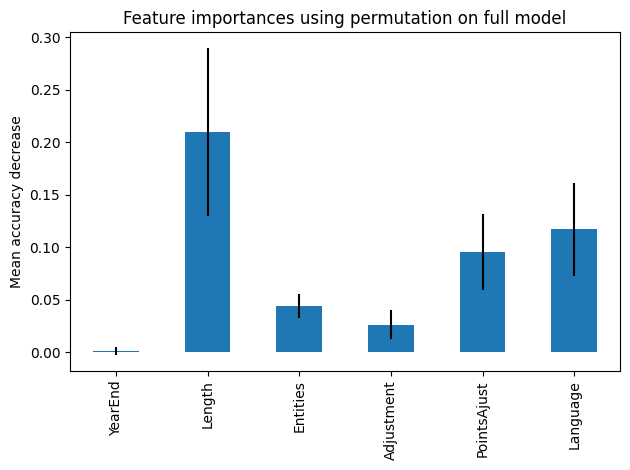

In [ ]:
# Uso de permutation importance
permu = permutation_importance(modelo_voting, x_test, y_test, n_repeats=20, random_state=42, n_jobs=2)
permu_importances = pd.Series(permu.importances_mean.round(3), index=feature_names)[permu.importances_mean.round(3) > 0.000]
fig, ax = plt.subplots()
permu_importances.plot.bar(yerr=permu.importances_std[permu.importances_mean.round(3) > 0.000], ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

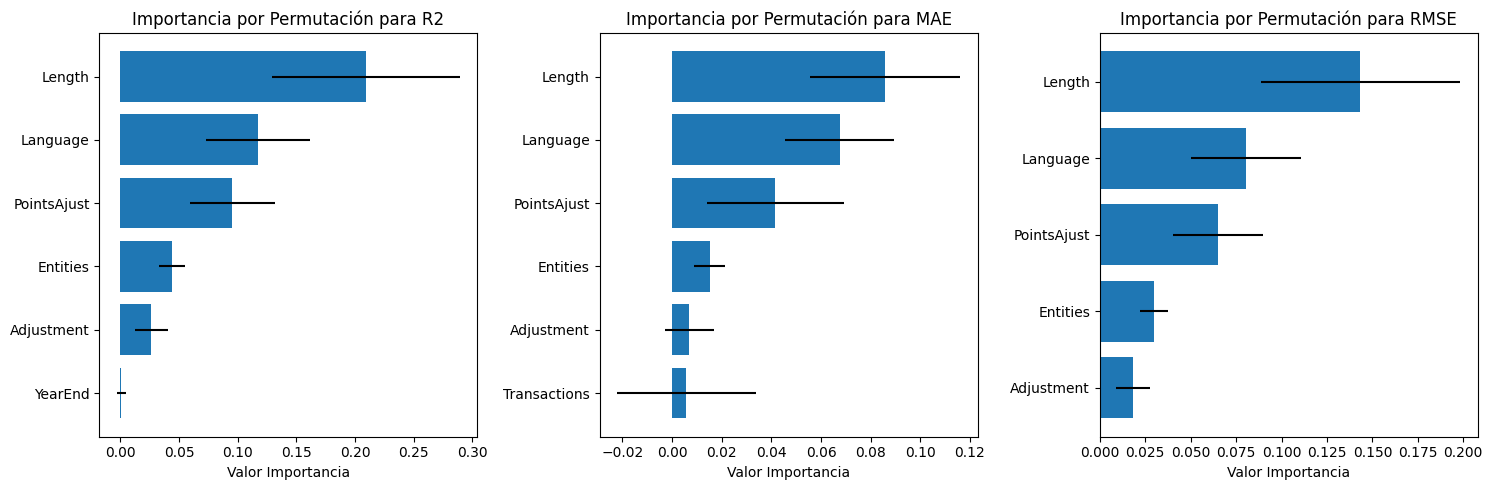

In [ ]:
scoring = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error']
metric_names = ['R2', 'MAE', 'RMSE']

permu_score = permutation_importance(modelo_voting, x_test, y_test, n_repeats=20, random_state=42, scoring=scoring)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Itera a través de las métricas
for i, metric in enumerate(scoring):
    permu = permu_score[metric]

    # Filtra las características que cumplen la condición
    filtered_indices = [j for j in range(len(permu.importances_mean)) if permu.importances_mean[j].round(3) > 0.000]
    sorted_feature_names = [feature_names[j] for j in filtered_indices]
    importances_mean = permu.importances_mean[filtered_indices]
    importances_std = permu.importances_std[filtered_indices]

    # Ordena los datos por importancia de mayor a menor
    sorted_indices = np.argsort(importances_mean)[::1]
    sorted_feature_names = [sorted_feature_names[j] for j in sorted_indices]
    importances_mean = importances_mean[sorted_indices]
    importances_std = importances_std[sorted_indices]

    # Crea la representación gráfica en el subplot correspondiente
    axs[i].barh(range(len(sorted_feature_names)), importances_mean, xerr=importances_std, align='center')
    axs[i].set_yticks(range(len(sorted_feature_names)))
    axs[i].set_yticklabels(sorted_feature_names)
    axs[i].set_xlabel('Valor Importancia')
    axs[i].set_title(f'Importancia por Permutación para {metric_names[i]}')

# Ajusta los espacios entre subplots y muestra la figura
plt.tight_layout()
plt.show()

In [ ]:
scoring = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error']

# Crea un diccionario para almacenar los DataFrames
results_global_vot = {}

permu_score = permutation_importance(modelo_voting, x_test, y_test, n_repeats=20, random_state=42, scoring=scoring)
for i, metric in enumerate(scoring):
  permu = permu_score[metric]

  # Filtra las características que cumplen la condición
  filtered_indices = [j for j in range(len(permu.importances_mean)) if permu.importances_mean[j].round(3) > 0.000]
  sorted_feature_names = [feature_names[j] for j in filtered_indices]
  importances_mean = permu.importances_mean[filtered_indices]
  importances_std = permu.importances_std[filtered_indices]



  # Crear un DataFrame con los resultados
  df_exp_global = pd.DataFrame({'Feature': sorted_feature_names,
                       'Importance_Mean': importances_mean,
                       'Importance_Std': importances_std})

  # Ordenar el DataFrame por importance_mean en orden descendente
  df_exp_global = df_exp_global.sort_values(by='Importance_Mean', ascending=False)

  # Asignar el DataFrame al diccionario con el nombre de la métrica
  results_global_vot[f'df_global_{metric_names[i]}'] = df_exp_global

In [ ]:
results_global_vot['df_global_R2']

,Feature,Importance_Mean,Importance_Std
1,Length,0.209512,0.080191
5,Language,0.117366,0.044177
4,PointsAjust,0.095169,0.036269
2,Entities,0.043722,0.011228
3,Adjustment,0.026430,0.013802
0,YearEnd,0.000682,0.003923


In [ ]:
results_global_vot['df_global_MAE']

,Feature,Importance_Mean,Importance_Std
0,Length,0.085811,0.030372
5,Language,0.067546,0.021855
4,PointsAjust,0.041546,0.027520
2,Entities,0.015140,0.006250
3,Adjustment,0.006938,0.009875
1,Transactions,0.005740,0.027995


In [ ]:
results_global_vot['df_global_RMSE']

,Feature,Importance_Mean,Importance_Std
0,Length,0.143252,0.054830
4,Language,0.080248,0.030205
3,PointsAjust,0.065071,0.024799
1,Entities,0.029895,0.007677
2,Adjustment,0.018071,0.009437


**BREAK-DOWN, SHAP Y LIME:**

In [ ]:
#primero definimos el explainer
exp = dx.Explainer(modelo_voting, x_train, y_train)

Preparation of a new explainer is initiated

  -> data              : 56 rows 9 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 56 values
  -> model_class       : sklearn.ensemble._voting.VotingRegressor (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_default at 0x7fa3aa2d7370> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = -0.847, mean = -0.0575, max = 1.9
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -1.53, mean = 0.106, max = 2.4
  -> model_info        : package sklearn

A new explainer has been created!


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


In [ ]:
#Primero obtenemos las instancias con valor estimado máximo, minimo y en la mediana.
max_index = np.argmax(y_pred)
min_index = np.argmin(y_pred)
mediana = np.median(y_pred)
#Encontrar el índice de la instancia cuyo valor estimado está en la mediana
median_index = np.argmin(np.abs(y_pred - mediana))

print("Índice de la instancia del conjunto de entrenamiento con mayor esfuerzo estimado es: ", max_index)
print("El valor máximo obtenido es: ", y_pred[max_index])
print("Ínidce de la instancia del conjunto de entrenamiento con menor esfuerzo estimado es: ", min_index)
print("El valor mínimo obtenido es: ", y_pred[min_index])
print("Índice de la instancia del conjunto de entrenamiento con esfuerzo estimado en la mediana: ", median_index)
print("El valor de la mediana es: ", y_pred[median_index])

Índice de la instancia del conjunto de entrenamiento con mayor esfuerzo estimado es:  13
El valor máximo obtenido es:  0.747105945346632
Ínidce de la instancia del conjunto de entrenamiento con menor esfuerzo estimado es:  7
El valor mínimo obtenido es:  -0.9972510531886029
Índice de la instancia del conjunto de entrenamiento con esfuerzo estimado en la mediana:  22
El valor de la mediana es:  -0.3556902002792975


In [ ]:
df_instancia_max = x_test.iloc[max_index]
df_instancia_median = x_test.iloc[median_index]
df_instancia_min = x_test.iloc[min_index]

In [ ]:
breakdown_max = exp.predict_parts(df_instancia_max, type="break_down",random_state=42)
breakdown_median = exp.predict_parts(df_instancia_median, type="break_down",random_state=42)
breakdown_min = exp.predict_parts(df_instancia_min, type="break_down",random_state=42)

shap_max = exp.predict_parts(df_instancia_max, type="shap",random_state=42)
shap_median = exp.predict_parts(df_instancia_median, type="shap",random_state=42)
shap_min = exp.predict_parts(df_instancia_min, type="shap",random_state=42)

lime_max = exp.predict_surrogate(df_instancia_max, random_state=42)
lime_median = exp.predict_surrogate(df_instancia_median, random_state=42)
lime_min = exp.predict_surrogate(df_instancia_min, random_state=42)

breakdown_df_max = breakdown_max.result
shap_df_max = shap_max.result
lime_df_max=lime_max.result
breakdown_df_median = breakdown_median.result
shap_df_median = shap_median.result
lime_df_median= lime_median.result
breakdown_df_min = breakdown_min.result
shap_df_min = shap_min.result
lime_df_min = lime_min.result

In [ ]:
breakdown_max.plot()
breakdown_median.plot()
breakdown_min.plot()

In [ ]:
shap_max.plot()
shap_median.plot()
shap_min.plot()

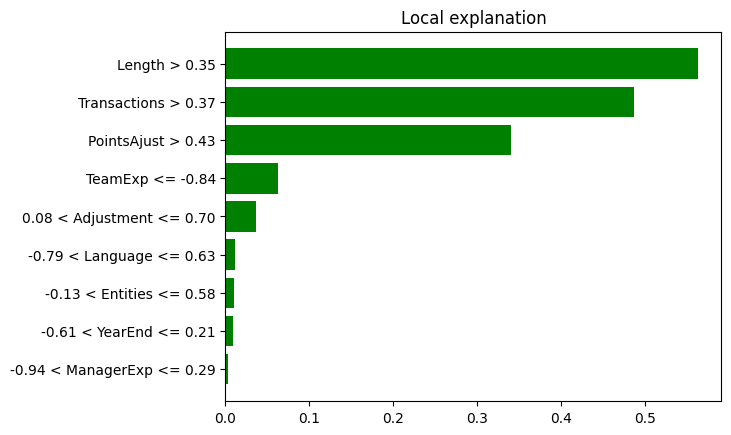

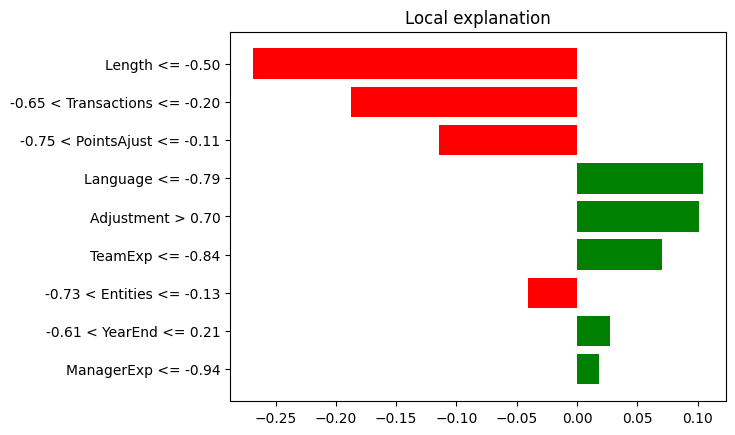

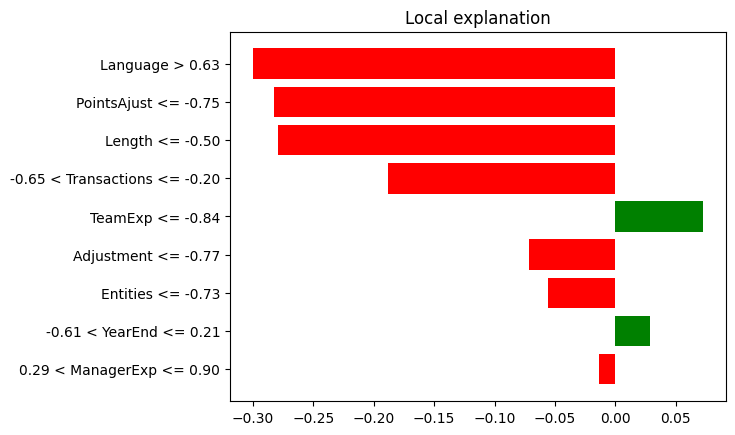

In [ ]:
lime_max.plot()
lime_median.plot()
lime_min.plot()

In [ ]:
lime_max.show_in_notebook()
lime_median.show_in_notebook()
lime_min.show_in_notebook()

### MAX:

In [ ]:
breakdown_df_max = breakdown_df_max.loc[:, ['variable_name', 'contribution', 'sign']]
breakdown_df_max = breakdown_df_max.drop(index=[0, 10])
breakdown_df_max['sign'] = breakdown_df_max['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
breakdown_df_max = breakdown_df_max.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

shap_df_max = shap_df_max.loc[:, ['variable_name', 'contribution', 'sign']]
shap_df_max = shap_df_max.tail(9)
shap_df_max['sign'] = shap_df_max['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
shap_df_max = shap_df_max.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

lime_df_max["Variable"] = lime_df_max["variable"].str.split(" ").str[0]
lime_df_max["Signo"] = lime_df_max["effect"].apply(evaluar_valor)
lime_df_max = lime_df_max.sort_values(by='effect', key=lambda x: abs(x), ascending=False)
lime_df_max = lime_df_max.drop(columns=['variable'])

# Agregar una columna de ranking
breakdown_df_max['Ranking'] = breakdown_df_max['contribution'].abs().rank(ascending=False).astype(int)
breakdown_df_max.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
breakdown_df_max = breakdown_df_max[['Variable', 'Ranking', 'contribution', 'Signo']]

shap_df_max['Ranking'] = shap_df_max['contribution'].abs().rank(ascending=False).astype(int)
shap_df_max.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
shap_df_max = shap_df_max[['Variable', 'Ranking', 'contribution', 'Signo']]

lime_df_max['Ranking'] = lime_df_max['effect'].abs().rank(ascending=False).astype(int)
lime_df_max = lime_df_max.head(5)
lime_df_max = lime_df_max[['Variable', 'Ranking', 'effect', 'Signo']]

# Elimino la columna de la contribucion
breakdown_df_max = breakdown_df_max.drop(columns=['contribution'])
shap_df_max = shap_df_max.drop(columns=['contribution'])
lime_df_max = lime_df_max.drop(columns=['effect'])

# Filtrar las 5 primeras contribuciones en valor absoluto
breakdown_df_max = breakdown_df_max.head(5)
breakdown_df_max = breakdown_df_max.reset_index(drop=True)

shap_df_max = shap_df_max.head(5)
shap_df_max = shap_df_max.reset_index(drop=True)

lime_df_max = lime_df_max.reset_index(drop=True)
lime_df_max.at[4, "Variable"] = "Adjustment"

print(breakdown_df_max)
print(shap_df_max)
print(lime_df_max)

       Variable  Ranking     Signo
0  Transactions        1  Positivo
1        Length        2  Positivo
2   PointsAjust        3  Positivo
3    Adjustment        4  Positivo
4       TeamExp        5  Positivo
       Variable  Ranking     Signo
0  Transactions        1  Positivo
1        Length        2  Positivo
2   PointsAjust        3  Positivo
3    Adjustment        4  Positivo
4       TeamExp        5  Positivo
       Variable  Ranking     Signo
0        Length        1  Positivo
1  Transactions        2  Positivo
2   PointsAjust        3  Positivo
3       TeamExp        4  Positivo
4    Adjustment        5  Positivo


In [ ]:
# Obtener todas las características únicas de las tres técnicas
breakdown_features = list(breakdown_df_max['Variable'])
shapley_features = list(shap_df_max['Variable'])
lime_features = list(lime_df_max['Variable'])
all_features = list(set(breakdown_features + shapley_features + lime_features))
all_features = all_features[::-1]

df_final_max = pd.DataFrame(index=range(len(all_features)), columns=columns_multi)
df_final_max['Variable'] = list(all_features)
df_final_max= df_final_max[['Variable', 'Breakdown', 'Shapley', 'Lime']]

print(breakdown_features)
print(shapley_features)
print(lime_features)
print(all_features)

for feature in df_final_max['Variable']:
    # Buscar la característica en el DataFrame de Breakdown
    breakdown_row = breakdown_df_max[breakdown_df_max['Variable'] == feature]
    if not breakdown_row.empty:
        # Si se encuentra, obtener los valores de "Ranking" y "Signo"
        ranking_breakdown = breakdown_row.iloc[0]['Ranking']
        signo_breakdown = breakdown_row.iloc[0]['Signo']
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Ranking')] = ranking_breakdown
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Signo')] = signo_breakdown
    else:
        # Si no se encuentra, añadir "-"
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Ranking')] = '-'
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Shapley
    shap_row = shap_df_max[shap_df_max['Variable'] == feature]
    if not shap_row.empty:
        ranking_shap = shap_row.iloc[0]['Ranking']
        signo_shap = shap_row.iloc[0]['Signo']
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Ranking')] = ranking_shap
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Signo')] = signo_shap
    else:
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Ranking')] = '-'
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Lime
    lime_row = lime_df_max[lime_df_max['Variable'] == feature]
    if not lime_row.empty:
        ranking_lime = lime_row.iloc[0]['Ranking']
        signo_lime = lime_row.iloc[0]['Signo']
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Ranking')] = ranking_lime
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Signo')] = signo_lime
    else:
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Ranking')] = '-'
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Signo')] = '-'

df_final_max

['Transactions', 'Length', 'PointsAjust', 'Adjustment', 'TeamExp']
['Transactions', 'Length', 'PointsAjust', 'Adjustment', 'TeamExp']
['Length', 'Transactions', 'PointsAjust', 'TeamExp', 'Adjustment']
['Adjustment', 'PointsAjust', 'TeamExp', 'Length', 'Transactions']


Variable Breakdown           Shapley              Lime          
                  Ranking     Signo Ranking     Signo Ranking     Signo
0    Adjustment         4  Positivo       4  Positivo       5  Positivo
1   PointsAjust         3  Positivo       3  Positivo       3  Positivo
2       TeamExp         5  Positivo       5  Positivo       4  Positivo
3        Length         2  Positivo       2  Positivo       1  Positivo
4  Transactions         1  Positivo       1  Positivo       2  Positivo

In [ ]:
df_final_max.set_index('Variable', inplace=True)
nuevo_orden = ["Transactions", "Length", "PointsAjust", "Adjustment", "TeamExp"]

# Reorganizar el DataFrame según el nuevo orden
df_final_max = df_final_max.reindex(nuevo_orden)

df_final_max

Breakdown           Shapley              Lime          
               Ranking     Signo Ranking     Signo Ranking     Signo
Variable                                                            
Transactions         1  Positivo       1  Positivo       2  Positivo
Length               2  Positivo       2  Positivo       1  Positivo
PointsAjust          3  Positivo       3  Positivo       3  Positivo
Adjustment           4  Positivo       4  Positivo       5  Positivo
TeamExp              5  Positivo       5  Positivo       4  Positivo

### MEDIAN:

In [ ]:
breakdown_df_median = breakdown_df_median.loc[:, ['variable_name', 'contribution', 'sign']]
breakdown_df_median = breakdown_df_median.drop(index=[0, 10])
breakdown_df_median['sign'] = breakdown_df_median['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
breakdown_df_median = breakdown_df_median.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

shap_df_median = shap_df_median.loc[:, ['variable_name', 'contribution', 'sign']]
shap_df_median = shap_df_median.tail(9)
shap_df_median['sign'] = shap_df_median['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
shap_df_median = shap_df_median.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

lime_df_median["Variable"] = lime_df_median["variable"].str.split(" ").str[0]
lime_df_median["Signo"] = lime_df_median["effect"].apply(evaluar_valor)
lime_df_median = lime_df_median.sort_values(by='effect', key=lambda x: abs(x), ascending=False)
lime_df_median = lime_df_median.drop(columns=['variable'])

# Agregar una columna de ranking
breakdown_df_median['Ranking'] = breakdown_df_median['contribution'].abs().rank(ascending=False).astype(int)
breakdown_df_median.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
breakdown_df_median = breakdown_df_median[['Variable', 'Ranking', 'contribution', 'Signo']]

shap_df_median['Ranking'] = shap_df_median['contribution'].abs().rank(ascending=False).astype(int)
shap_df_median.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
shap_df_median = shap_df_median[['Variable', 'Ranking', 'contribution', 'Signo']]

lime_df_median['Ranking'] = lime_df_median['effect'].abs().rank(ascending=False).astype(int)
lime_df_median = lime_df_median.head(5)
lime_df_median = lime_df_median[['Variable', 'Ranking', 'effect', 'Signo']]

# Elimino la columna de la contribucion
breakdown_df_median = breakdown_df_median.drop(columns=['contribution'])
shap_df_median = shap_df_median.drop(columns=['contribution'])
lime_df_median = lime_df_median.drop(columns=['effect'])

# Filtrar las 5 primeras contribuciones en valor absoluto
breakdown_df_median = breakdown_df_median.head(5)
breakdown_df_median = breakdown_df_median.reset_index(drop=True)

shap_df_median = shap_df_median.head(5)
shap_df_median = shap_df_median.reset_index(drop=True)

lime_df_median = lime_df_median.reset_index(drop=True)
lime_df_median.at[1, "Variable"] = "Transactions"
lime_df_median.at[2, "Variable"] = "PointsAjust"

print(breakdown_df_median)
print(shap_df_median)
print(lime_df_median)

       Variable  Ranking     Signo
0        Length        1  Negativo
1  Transactions        2  Negativo
2   PointsAjust        3  Negativo
3      Language        4  Positivo
4       TeamExp        5  Positivo
       Variable  Ranking     Signo
0        Length        1  Negativo
1  Transactions        2  Negativo
2   PointsAjust        3  Negativo
3      Language        4  Positivo
4       TeamExp        5  Positivo
       Variable  Ranking     Signo
0        Length        1  Negativo
1  Transactions        2  Negativo
2   PointsAjust        3  Negativo
3      Language        4  Positivo
4    Adjustment        5  Positivo


In [ ]:
# Obtener todas las características únicas de las tres técnicas
breakdown_features = list(breakdown_df_median['Variable'])
shapley_features = list(shap_df_median['Variable'])
lime_features = list(lime_df_median['Variable'])
all_features = list(set(breakdown_features + shapley_features + lime_features))
all_features = all_features[::-1]

df_final_median = pd.DataFrame(index=range(len(all_features)), columns=columns_multi)
df_final_median['Variable'] = list(all_features)
df_final_median= df_final_median[['Variable', 'Breakdown', 'Shapley', 'Lime']]

print(breakdown_features)
print(shapley_features)
print(lime_features)
print(all_features)

for feature in df_final_median['Variable']:
    # Buscar la característica en el DataFrame de Breakdown
    breakdown_row = breakdown_df_median[breakdown_df_median['Variable'] == feature]
    if not breakdown_row.empty:
        # Si se encuentra, obtener los valores de "Ranking" y "Signo"
        ranking_breakdown = breakdown_row.iloc[0]['Ranking']
        signo_breakdown = breakdown_row.iloc[0]['Signo']
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Ranking')] = ranking_breakdown
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Signo')] = signo_breakdown
    else:
        # Si no se encuentra, añadir "-"
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Ranking')] = '-'
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Shapley
    shap_row = shap_df_median[shap_df_median['Variable'] == feature]
    if not shap_row.empty:
        ranking_shap = shap_row.iloc[0]['Ranking']
        signo_shap = shap_row.iloc[0]['Signo']
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Ranking')] = ranking_shap
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Signo')] = signo_shap
    else:
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Ranking')] = '-'
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Lime
    lime_row = lime_df_median[lime_df_median['Variable'] == feature]
    if not lime_row.empty:
        ranking_lime = lime_row.iloc[0]['Ranking']
        signo_lime = lime_row.iloc[0]['Signo']
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Ranking')] = ranking_lime
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Signo')] = signo_lime
    else:
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Ranking')] = '-'
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Signo')] = '-'

df_final_median

['Length', 'Transactions', 'PointsAjust', 'Language', 'TeamExp']
['Length', 'Transactions', 'PointsAjust', 'Language', 'TeamExp']
['Length', 'Transactions', 'PointsAjust', 'Language', 'Adjustment']
['Adjustment', 'PointsAjust', 'TeamExp', 'Language', 'Length', 'Transactions']


Variable Breakdown           Shapley              Lime          
                  Ranking     Signo Ranking     Signo Ranking     Signo
0    Adjustment         -         -       -         -       5  Positivo
1   PointsAjust         3  Negativo       3  Negativo       3  Negativo
2       TeamExp         5  Positivo       5  Positivo       -         -
3      Language         4  Positivo       4  Positivo       4  Positivo
4        Length         1  Negativo       1  Negativo       1  Negativo
5  Transactions         2  Negativo       2  Negativo       2  Negativo

In [ ]:
df_final_median.set_index('Variable', inplace=True)
nuevo_orden = ["Length", "Transactions", "PointsAjust", "Language", "TeamExp", "Adjustment"]

# Reorganizar el DataFrame según el nuevo orden
df_final_median = df_final_median.reindex(nuevo_orden)

df_final_median

Breakdown           Shapley              Lime          
               Ranking     Signo Ranking     Signo Ranking     Signo
Variable                                                            
Length               1  Negativo       1  Negativo       1  Negativo
Transactions         2  Negativo       2  Negativo       2  Negativo
PointsAjust          3  Negativo       3  Negativo       3  Negativo
Language             4  Positivo       4  Positivo       4  Positivo
TeamExp              5  Positivo       5  Positivo       -         -
Adjustment           -         -       -         -       5  Positivo

### MIN:

In [ ]:
breakdown_df_min = breakdown_df_min.loc[:, ['variable_name', 'contribution', 'sign']]
breakdown_df_min = breakdown_df_min.drop(index=[0, 10])
breakdown_df_min['sign'] = breakdown_df_min['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
breakdown_df_min = breakdown_df_min.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

shap_df_min = shap_df_min.loc[:, ['variable_name', 'contribution', 'sign']]
shap_df_min = shap_df_min.tail(9)
shap_df_min['sign'] = shap_df_min['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
shap_df_min = shap_df_min.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

lime_df_min["Variable"] = lime_df_min["variable"].str.split(" ").str[0]
lime_df_min["Signo"] = lime_df_min["effect"].apply(evaluar_valor)
lime_df_min = lime_df_min.sort_values(by='effect', key=lambda x: abs(x), ascending=False)
lime_df_min = lime_df_min.drop(columns=['variable'])

# Agregar una columna de ranking
breakdown_df_min['Ranking'] = breakdown_df_min['contribution'].abs().rank(ascending=False).astype(int)
breakdown_df_min.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
breakdown_df_min = breakdown_df_min[['Variable', 'Ranking', 'contribution', 'Signo']]

shap_df_min['Ranking'] = shap_df_min['contribution'].abs().rank(ascending=False).astype(int)
shap_df_min.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
shap_df_min = shap_df_min[['Variable', 'Ranking', 'contribution', 'Signo']]

lime_df_min['Ranking'] = lime_df_min['effect'].abs().rank(ascending=False).astype(int)
lime_df_min = lime_df_min.head(5)
lime_df_min = lime_df_min[['Variable', 'Ranking', 'effect', 'Signo']]

# Elimino la columna de la contribucion
breakdown_df_min = breakdown_df_min.drop(columns=['contribution'])
shap_df_min = shap_df_min.drop(columns=['contribution'])
lime_df_min = lime_df_min.drop(columns=['effect'])

# Filtrar las 5 primeras contribuciones en valor absoluto
breakdown_df_min = breakdown_df_min.head(5)
breakdown_df_min = breakdown_df_min.reset_index(drop=True)

shap_df_min = shap_df_min.head(5)
shap_df_min = shap_df_min.reset_index(drop=True)

lime_df_min = lime_df_min.reset_index(drop=True)
lime_df_min.at[3, "Variable"] = "Transactions"

print(breakdown_df_min)
print(shap_df_min)
print(lime_df_min)

       Variable  Ranking     Signo
0      Language        1  Negativo
1   PointsAjust        2  Negativo
2        Length        3  Negativo
3  Transactions        4  Negativo
4    Adjustment        5  Negativo
       Variable  Ranking     Signo
0      Language        1  Negativo
1   PointsAjust        2  Negativo
2        Length        3  Negativo
3  Transactions        4  Negativo
4    Adjustment        5  Negativo
       Variable  Ranking     Signo
0      Language        1  Negativo
1   PointsAjust        2  Negativo
2        Length        3  Negativo
3  Transactions        4  Negativo
4       TeamExp        5  Positivo


In [ ]:
# Obtener todas las características únicas de las tres técnicas
breakdown_features = list(breakdown_df_min['Variable'])
shapley_features = list(shap_df_min['Variable'])
lime_features = list(lime_df_min['Variable'])
all_features = list(set(breakdown_features + shapley_features + lime_features))
all_features = all_features[::-1]

df_final_min = pd.DataFrame(index=range(len(all_features)), columns=columns_multi)
df_final_min['Variable'] = list(all_features)
df_final_min= df_final_min[['Variable', 'Breakdown', 'Shapley', 'Lime']]

print(breakdown_features)
print(shapley_features)
print(lime_features)
print(all_features)

for feature in df_final_min['Variable']:
    # Buscar la característica en el DataFrame de Breakdown
    breakdown_row = breakdown_df_min[breakdown_df_min['Variable'] == feature]
    if not breakdown_row.empty:
        # Si se encuentra, obtener los valores de "Ranking" y "Signo"
        ranking_breakdown = breakdown_row.iloc[0]['Ranking']
        signo_breakdown = breakdown_row.iloc[0]['Signo']
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Ranking')] = ranking_breakdown
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Signo')] = signo_breakdown
    else:
        # Si no se encuentra, añadir "-"
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Ranking')] = '-'
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Shapley
    shap_row = shap_df_min[shap_df_min['Variable'] == feature]
    if not shap_row.empty:
        ranking_shap = shap_row.iloc[0]['Ranking']
        signo_shap = shap_row.iloc[0]['Signo']
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Ranking')] = ranking_shap
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Signo')] = signo_shap
    else:
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Ranking')] = '-'
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Lime
    lime_row = lime_df_min[lime_df_min['Variable'] == feature]
    if not lime_row.empty:
        ranking_lime = lime_row.iloc[0]['Ranking']
        signo_lime = lime_row.iloc[0]['Signo']
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Ranking')] = ranking_lime
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Signo')] = signo_lime
    else:
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Ranking')] = '-'
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Signo')] = '-'

df_final_min

['Language', 'PointsAjust', 'Length', 'Transactions', 'Adjustment']
['Language', 'PointsAjust', 'Length', 'Transactions', 'Adjustment']
['Language', 'PointsAjust', 'Length', 'Transactions', 'TeamExp']
['Adjustment', 'PointsAjust', 'TeamExp', 'Language', 'Length', 'Transactions']


Variable Breakdown           Shapley              Lime          
                  Ranking     Signo Ranking     Signo Ranking     Signo
0    Adjustment         5  Negativo       5  Negativo       -         -
1   PointsAjust         2  Negativo       2  Negativo       2  Negativo
2       TeamExp         -         -       -         -       5  Positivo
3      Language         1  Negativo       1  Negativo       1  Negativo
4        Length         3  Negativo       3  Negativo       3  Negativo
5  Transactions         4  Negativo       4  Negativo       4  Negativo

In [ ]:
df_final_min.set_index('Variable', inplace=True)
nuevo_orden = ["Language", "PointsAjust", "Length", "Transactions", "Adjustment", "TeamExp"]

# Reorganizar el DataFrame según el nuevo orden
df_final_min = df_final_min.reindex(nuevo_orden)

df_final_min

Breakdown           Shapley              Lime          
               Ranking     Signo Ranking     Signo Ranking     Signo
Variable                                                            
Language             1  Negativo       1  Negativo       1  Negativo
PointsAjust          2  Negativo       2  Negativo       2  Negativo
Length               3  Negativo       3  Negativo       3  Negativo
Transactions         4  Negativo       4  Negativo       4  Negativo
Adjustment           5  Negativo       5  Negativo       -         -
TeamExp              -         -       -         -       5  Positivo

### GLOBAL

In [ ]:
ranking_valores = {
    'Breakdown': [],
    'Shapley': [],
    'Lime': []
}

# Recorre los DataFrames y almacena los pares de valores por técnica
for tecnica in ranking_valores:
    for caracteristica in df_final_max.index:
        ranking = df_final_max[(tecnica, 'Ranking')][caracteristica]
        if ranking != "-":
            ranking_valores[tecnica].append((caracteristica, int(ranking)))

    for caracteristica in df_final_median.index:
        ranking = df_final_median[(tecnica, 'Ranking')][caracteristica]
        if ranking != "-":
            ranking_valores[tecnica].append((caracteristica, int(ranking)))

    for caracteristica in df_final_min.index:
        ranking = df_final_min[(tecnica, 'Ranking')][caracteristica]
        if ranking != "-":
            ranking_valores[tecnica].append((caracteristica, int(ranking)))

# Calcula el ranking medio por técnica y característica
ranking_medio = {
    'Breakdown': {},
    'Shapley': {},
    'Lime': {}
}

for tecnica, ranking_values in ranking_valores.items():
    for caracteristica, ranking in ranking_values:
        if caracteristica not in ranking_medio[tecnica]:
            ranking_medio[tecnica][caracteristica] = [ranking]
        else:
            ranking_medio[tecnica][caracteristica].append(ranking)

for tecnica, ranking_values in ranking_medio.items():
    for caracteristica in ranking_values:
        ranking_medio[tecnica][caracteristica] = sum(ranking_values[caracteristica]) / len(ranking_values[caracteristica])


# Ahora el conteo de apariciones por característica y técnica
apariciones_count = {
    'Breakdown': {},
    'Shapley': {},
    'Lime': {}
}

for tecnica, ranking_values in ranking_valores.items():
    for caracteristica, _ in ranking_values:
        if caracteristica not in apariciones_count[tecnica]:
            apariciones_count[tecnica][caracteristica] = 1
        else:
            apariciones_count[tecnica][caracteristica] += 1

# Tengo los valores, los conteos de apariciones y los ranking medios por técnica en los respectivos diccionarios
print(ranking_valores)
print(apariciones_count)
print(ranking_medio)

{'Breakdown': [('Transactions', 1), ('Length', 2), ('PointsAjust', 3), ('Adjustment', 4), ('TeamExp', 5), ('Length', 1), ('Transactions', 2), ('PointsAjust', 3), ('Language', 4), ('TeamExp', 5), ('Language', 1), ('PointsAjust', 2), ('Length', 3), ('Transactions', 4), ('Adjustment', 5)], 'Shapley': [('Transactions', 1), ('Length', 2), ('PointsAjust', 3), ('Adjustment', 4), ('TeamExp', 5), ('Length', 1), ('Transactions', 2), ('PointsAjust', 3), ('Language', 4), ('TeamExp', 5), ('Language', 1), ('PointsAjust', 2), ('Length', 3), ('Transactions', 4), ('Adjustment', 5)], 'Lime': [('Transactions', 2), ('Length', 1), ('PointsAjust', 3), ('Adjustment', 5), ('TeamExp', 4), ('Length', 1), ('Transactions', 2), ('PointsAjust', 3), ('Language', 4), ('Adjustment', 5), ('Language', 1), ('PointsAjust', 2), ('Length', 3), ('Transactions', 4), ('TeamExp', 5)]}
{'Breakdown': {'Transactions': 3, 'Length': 3, 'PointsAjust': 3, 'Adjustment': 2, 'TeamExp': 2, 'Language': 2}, 'Shapley': {'Transactions': 3, 'L

In [ ]:
# Lista de técnicas
techniques = ['Breakdown', 'Shapley', 'Lime']

# Diccionario para almacenar los datos
data_dict = {}

# Crear una lista de todas las características
all_caract = list(set().union(*[set(ranking_medio[technique]) for technique in techniques]))

# Recorrer las técnicas y las características
for technique in techniques:
    caract = list(ranking_medio[technique].keys())
    rank = [ranking_medio[technique].get(c, "-") for c in all_caract]
    apar = [apariciones_count[technique].get(c, "-") for c in all_caract]

    # Agregar los datos al diccionario
    data_dict[(technique, "Ranking Medio")] = rank
    data_dict[(technique, "Conteo")] = apar

# Crear el DataFrame resumen
df_resumen_vot = pd.DataFrame(data_dict, index=all_caract)

df_resumen_vot

Breakdown              Shapley                 Lime       
             Ranking Medio Conteo Ranking Medio Conteo Ranking Medio Conteo
Transactions      2.333333      3      2.333333      3      2.666667      3
Length            2.000000      3      2.000000      3      1.666667      3
Language          2.500000      2      2.500000      2      2.500000      2
TeamExp           5.000000      2      5.000000      2      4.500000      2
PointsAjust       2.666667      3      2.666667      3      2.666667      3
Adjustment        4.500000      2      4.500000      2      5.000000      2

In [ ]:
# Calcular el ranking medio general omitiendo los valores "-"
df_resumen_vot[("General", "Ranking")] = df_resumen_vot[[(tech, "Ranking Medio") for tech in techniques]].replace('-', np.nan).mean(axis=1)

# Calcular la suma total de apariciones omitiendo los valores "-"
df_resumen_vot[("General", "Conteo Total")] = df_resumen_vot[[(tech, "Conteo") for tech in techniques]].replace('-', 0).sum(axis=1)

# Mostrar el DataFrame resumen actualizado
df_resumen_vot

Breakdown              Shapley                 Lime         \
             Ranking Medio Conteo Ranking Medio Conteo Ranking Medio Conteo   
Transactions      2.333333      3      2.333333      3      2.666667      3   
Length            2.000000      3      2.000000      3      1.666667      3   
Language          2.500000      2      2.500000      2      2.500000      2   
TeamExp           5.000000      2      5.000000      2      4.500000      2   
PointsAjust       2.666667      3      2.666667      3      2.666667      3   
Adjustment        4.500000      2      4.500000      2      5.000000      2   

               General               
               Ranking Conteo Total  
Transactions  2.444444            9  
Length        1.888889            9  
Language      2.500000            6  
TeamExp       4.833333            6  
PointsAjust   2.666667            9  
Adjustment    4.666667            6

In [ ]:
# Obtener el número de características
num_caract = df_resumen_vot.shape[0]

# Calcular el peso para el ranking y apariciones
df_resumen_vot[("General", "Peso Rango")] = 1 - ((df_resumen_vot[("General", "Ranking")].rank(ascending=True) - 1) / num_caract)
df_resumen_vot[("General", "Peso Conteo")] = df_resumen_vot[("General", "Conteo Total")].rank(ascending=True) / num_caract

# Calcular el puntaje final como suma de los pesos
df_resumen_vot[("General", "Puntaje")] = df_resumen_vot[("General", "Peso Rango")] + df_resumen_vot[("General", "Peso Conteo")]
df_resumen_vot[("General", "Ranking")] = df_resumen_vot[("General", "Puntaje")].rank(ascending=False, method="min")

# Eliminar la subcolumnas innecesarias
df_resumen_vot.drop("Peso Rango", axis=1, level=1, inplace=True)
df_resumen_vot.drop("Peso Conteo", axis=1, level=1, inplace=True)
df_resumen_vot.drop("Puntaje", axis=1, level=1, inplace=True)

df_resumen_vot

Breakdown              Shapley                 Lime         \
             Ranking Medio Conteo Ranking Medio Conteo Ranking Medio Conteo   
Transactions      2.333333      3      2.333333      3      2.666667      3   
Length            2.000000      3      2.000000      3      1.666667      3   
Language          2.500000      2      2.500000      2      2.500000      2   
TeamExp           5.000000      2      5.000000      2      4.500000      2   
PointsAjust       2.666667      3      2.666667      3      2.666667      3   
Adjustment        4.500000      2      4.500000      2      5.000000      2   

             General               
             Ranking Conteo Total  
Transactions     2.0            9  
Length           1.0            9  
Language         4.0            6  
TeamExp          6.0            6  
PointsAjust      3.0            9  
Adjustment       5.0            6

In [ ]:
# Obtener las columnas actuales del DataFrame
columns = df_resumen_vot.columns

# Extraer las columnas de "General" y sus subcolumnas
general_columns = columns.get_level_values(0) == "General"

# Crear una lista con las subcolumnas de "General"
general_subcolumns = [("General", "Ranking"), ("General", "Conteo Total")]

# Crear una lista con las subcolumnas asociadas a las técnicas
technique_subcolumns = list(columns[~general_columns])

# Reorganizar las columnas para mover "General" al principio
new_columns = general_subcolumns + technique_subcolumns

# Crear un nuevo DataFrame con las columnas reorganizadas
df_resumen_vot = df_resumen_vot[new_columns]

In [ ]:
df_resumen_vot.sort_values(by=("General", "Ranking"), ascending=True, inplace=True)

# Formatear los valores
for tech in techniques:
    df_resumen_vot[(tech, "Ranking Medio")] = df_resumen_vot[(tech, "Ranking Medio")].apply(lambda x: f"{x:.2f}" if isinstance(x, (int, float)) else x)

df_resumen_vot

General                  Breakdown              Shapley         \
             Ranking Conteo Total Ranking Medio Conteo Ranking Medio Conteo   
Length           1.0            9          2.00      3          2.00      3   
Transactions     2.0            9          2.33      3          2.33      3   
PointsAjust      3.0            9          2.67      3          2.67      3   
Language         4.0            6          2.50      2          2.50      2   
Adjustment       5.0            6          4.50      2          4.50      2   
TeamExp          6.0            6          5.00      2          5.00      2   

                      Lime         
             Ranking Medio Conteo  
Length                1.67      3  
Transactions          2.67      3  
PointsAjust           2.67      3  
Language              2.50      2  
Adjustment            5.00      2  
TeamExp               4.50      2

## Local Datasets

In [ ]:
# Lista de DataFrames resumen y algoritmo
dfs_resumen = [df_resumen_svr, df_resumen_rf, df_resumen_gbr, df_resumen_vot]
algorithms = ['SVR', 'RF', 'GBR', 'VOT']

# Crear un conjunto de índices único
index_set = set()

# Iterar sobre cada DataFrame resumen y agregar sus índices al conjunto
for df_resumen in dfs_resumen:
    index_set.update(df_resumen.index)
index_list = list(index_set)

# Crear un nuevo DataFrame para el resultado final
df_resumen_final = pd.DataFrame(index=index_list)

# Agregar las columnas de "General" con "Ranking" y "Conteo Total" para cada algoritmo
for algorithm, df_resumen in zip(algorithms, dfs_resumen):
    df_resumen_final[(algorithm, 'Ranking')] = df_resumen[('General', 'Ranking')]
    df_resumen_final[(algorithm, 'Conteo Total')] = df_resumen[('General', 'Conteo Total')]

# Rellenar el DataFrame final con datos o '-'
df_resumen_final = df_resumen_final.fillna('-')

# Calcular el ranking final promediando los rankings de las técnicas
df_resumen_final["Ranking Final"] = df_resumen_final[[(algo, "Ranking") for algo in algorithms]].replace('-', np.nan).mean(axis=1)

# Calcular la suma total de apariciones omitiendo los valores "-"
df_resumen_final[("Conteo Final")] = df_resumen_final[[(algo, "Conteo Total") for algo in algorithms]].replace('-', 0).sum(axis=1)

# Obtener el número de características
num_caract = df_resumen_final.shape[0]

# Calcular el peso para el ranking y apariciones
df_resumen_final[("Peso Rango")] = 1 - ((df_resumen_final[("Ranking Final")].rank(ascending=True) - 1) / num_caract)
df_resumen_final[("Peso Conteo")] = df_resumen_final[("Conteo Final")].rank(ascending=True) / num_caract

# Calcular el puntaje final como suma de los pesos
df_resumen_final[("Puntaje")] = df_resumen_final[("Peso Rango")] + df_resumen_final[("Peso Conteo")]
df_resumen_final[("Ranking Final")] = df_resumen_final[("Puntaje")].rank(ascending=False, method="min")


# Eliminar las columnas innecesarias
df_resumen_final.drop("Peso Rango", axis=1, inplace=True)
df_resumen_final.drop("Peso Conteo", axis=1, inplace=True)
df_resumen_final.drop("Puntaje", axis=1, inplace=True)

df_resumen_final.sort_values(by=("Ranking Final"), ascending=True, inplace=True)

# Formatear los valores
for algo in algorithms:
    df_resumen_final[(algo, "Ranking")] = df_resumen_final[(algo, "Ranking")].apply(lambda x: f"{x:.0f}" if isinstance(x, (int, float)) else x)
    df_resumen_final[(algo, "Conteo Total")] = df_resumen_final[(algo, "Conteo Total")].apply(lambda x: f"{x:.0f}" if isinstance(x, (int, float)) else x)

df_resumen_final[("Ranking Final")] = df_resumen_final[("Ranking Final")].apply(lambda x: f"{x:.0f}" if isinstance(x, (int, float)) else x)
df_resumen_final[("Conteo Final")] = df_resumen_final[("Conteo Final")].apply(lambda x: f"{x:.0f}" if isinstance(x, (int, float)) else x)

df_resumen_final

,"(SVR, Ranking)","(SVR, Conteo Total)","(RF, Ranking)","(RF, Conteo Total)","(GBR, Ranking)","(GBR, Conteo Total)","(VOT, Ranking)","(VOT, Conteo Total)",Ranking Final,Conteo Final
Length,2,8,1,9,2,9,1,9,1,35
PointsAjust,3,9,2,9,4,9,3,9,2,36
Transactions,4,6,4,8,1,9,2,9,3,32
Language,1,9,-,-,3,9,4,6,4,24
Entities,-,-,3,9,6,5,-,-,5,14
Adjustment,5,5,5,5,5,4,5,6,5,20
TeamExp,6,4,7,1,-,-,6,6,7,11
ManagerExp,-,-,6,4,-,-,-,-,8,4
YearEnd,7,4,-,-,-,-,-,-,9,4


In [ ]:
# Lista de DataFrames resumen y algoritmo
dfs_resumen = [df_resumen_svr, df_resumen_rf, df_resumen_gbr, df_resumen_vot]
algorithms = ['SVR', 'RF', 'GBR', 'VOT']

# Crear un conjunto de índices único
index_set = set()

# Iterar sobre cada DataFrame resumen y agregar sus índices al conjunto
for df_resumen in dfs_resumen:
    index_set.update(df_resumen.index)

index_list = list(index_set)

# Crear un nuevo DataFrame para el resultado final con los índices únicos
df_resumen_final = pd.DataFrame(index=index_list)

# Agregar las columnas de "General" con "Ranking" y "Conteo Total" para cada algoritmo
for algorithm, df_resumen in zip(algorithms, dfs_resumen):
    df_resumen_final[(algorithm, 'Ranking')] = df_resumen[('General', 'Ranking')]
    df_resumen_final[(algorithm, 'Conteo Total')] = df_resumen[('General', 'Conteo Total')]

# Rellenar el DataFrame final con datos o '-'
df_resumen_final = df_resumen_final.fillna('-')

# Calcular el ranking final promediando los rankings de las técnicas
df_resumen_final["Ranking Final"] = df_resumen_final[[(algo, "Ranking") for algo in algorithms]].replace('-', np.nan).mean(axis=1)

# Calcular la suma total de apariciones omitiendo los valores "-"
df_resumen_final["Conteo Final"] = df_resumen_final[[(algo, "Conteo Total") for algo in algorithms]].replace('-', 0).sum(axis=1)

# Obtener el número de características
num_caract = df_resumen_final.shape[0]

# Calcular el peso para el ranking y apariciones
df_resumen_final[("Peso Rango")] = 1 - ((df_resumen_final[("Ranking Final")].rank(ascending=True) - 1) / num_caract)
df_resumen_final[("Peso Conteo")] = df_resumen_final[("Conteo Final")].rank(ascending=True) / num_caract

# Calcular el puntaje final como suma de los pesos
df_resumen_final[("Puntaje")] = df_resumen_final[("Peso Rango")] + df_resumen_final[("Peso Conteo")]
df_resumen_final[("Ranking Final")] = df_resumen_final[("Puntaje")].rank(ascending=False, method="min")

# Eliminar las subcolumnas innecesarias
df_resumen_final.drop("Peso Rango", axis=1, inplace=True)
df_resumen_final.drop("Peso Conteo", axis=1, inplace=True)
df_resumen_final.drop("Puntaje", axis=1, inplace=True)

df_resumen_final.sort_values(by=("Ranking Final"), ascending=True, inplace=True)

df_resumen_final

,"(SVR, Ranking)","(SVR, Conteo Total)","(RF, Ranking)","(RF, Conteo Total)","(GBR, Ranking)","(GBR, Conteo Total)","(VOT, Ranking)","(VOT, Conteo Total)",Ranking Final,Conteo Final
Length,2.0,8.0,1.0,9.0,2.0,9.0,1.0,9.0,1.0,35.0
PointsAjust,3.0,9.0,2.0,9.0,4.0,9.0,3.0,9.0,2.0,36.0
Transactions,4.0,6.0,4.0,8.0,1.0,9.0,2.0,9.0,3.0,32.0
Language,1.0,9.0,-,-,3.0,9.0,4.0,6.0,4.0,24.0
Entities,-,-,3.0,9.0,6.0,5.0,-,-,5.0,14.0
Adjustment,5.0,5.0,5.0,5.0,5.0,4.0,5.0,6.0,5.0,20.0
TeamExp,6.0,4.0,7.0,1.0,-,-,6.0,6.0,7.0,11.0
ManagerExp,-,-,6.0,4.0,-,-,-,-,8.0,4.0
YearEnd,7.0,4.0,-,-,-,-,-,-,9.0,4.0


# **Resultados:**

In [ ]:
score_result=score_result.drop("MSE",axis=1)

In [ ]:
score_result

,Modelo,MAE,RMSE,R2,MMRE,PRED(0.25)
0,SVR,0.475152,0.656783,0.413919,0.172867,0.727941
1,RandomForest,0.568302,0.792517,0.179307,0.316518,0.727941
2,GradienBoosting,0.539403,0.801269,0.204274,0.209852,0.690441
3,Voting,0.507099,0.731924,0.308023,0.296219,0.740441


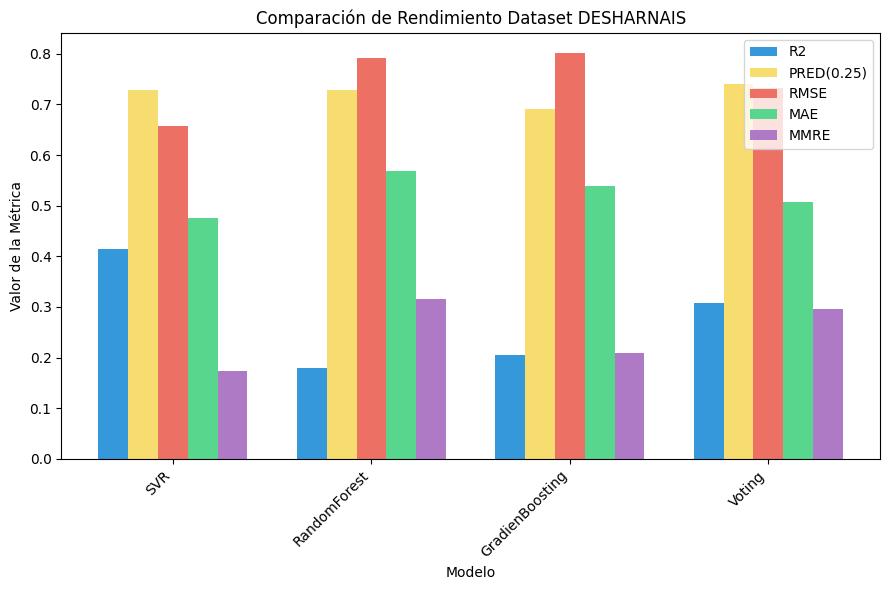

In [ ]:
metricas = ['R2', 'PRED(0.25)', 'RMSE', 'MAE', 'MMRE']
colores = ['#3498DB', '#F7DC6F','#EC7063', '#58D68D', '#AF7AC5']

num_modelos = len(score_result)
ancho_barra = 0.15
x = range(num_modelos)

plt.figure(figsize=(9, 6))

# Crear un gráfico de barras para cada métrica
for i, metrica in enumerate(metricas):
    # Calcular la posición para las barras de esta métrica
    posiciones_x = [pos + i * ancho_barra for pos in x]

    # Obtener los valores de la métrica actual
    valores_metrica = score_result[metrica]

    # Crear las barras para la métrica actual
    plt.bar(
        posiciones_x,
        valores_metrica,
        width=ancho_barra,
        label=metrica,
        color=colores[i],
    )

# Personalizar el gráfico
plt.xlabel('Modelo')
plt.ylabel('Valor de la Métrica')
plt.title('Comparación de Rendimiento Dataset DESHARNAIS')
plt.xticks([pos + (len(metricas) - 1) * ancho_barra / 2 for pos in x], score_result['Modelo'], rotation=45, ha="right")
plt.legend(loc='upper right')

# Mostrar el gráfico combinado
plt.tight_layout()
plt.show()

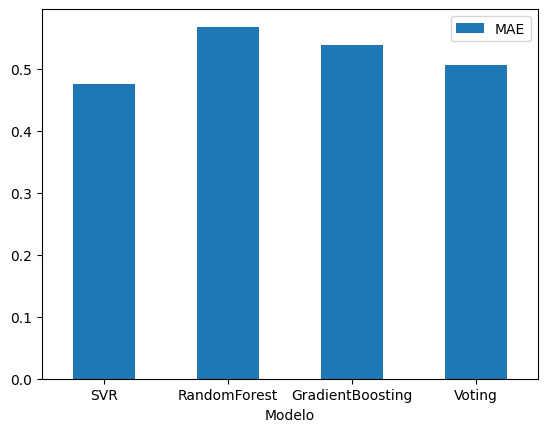

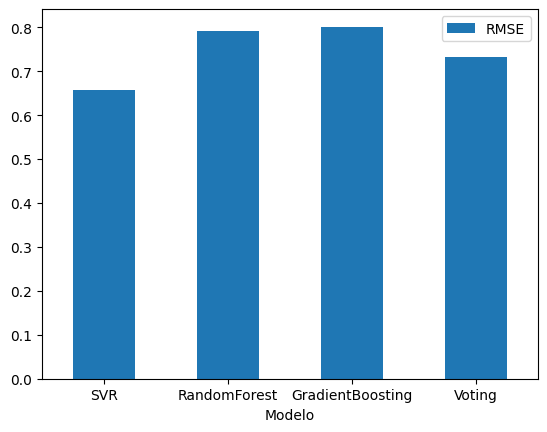

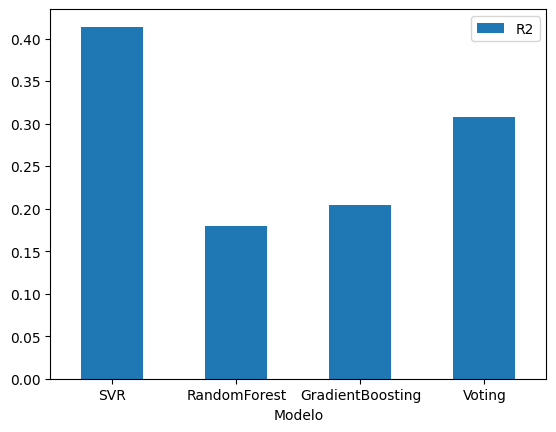

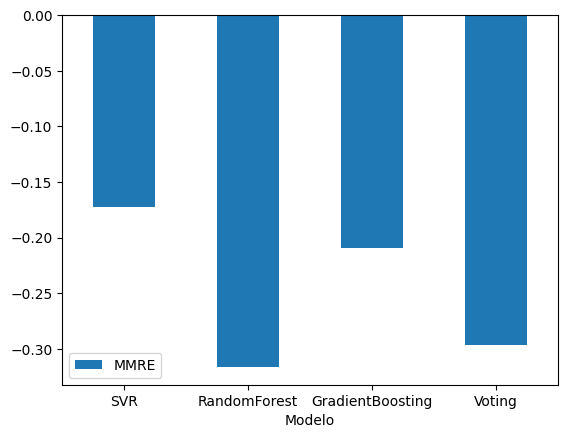

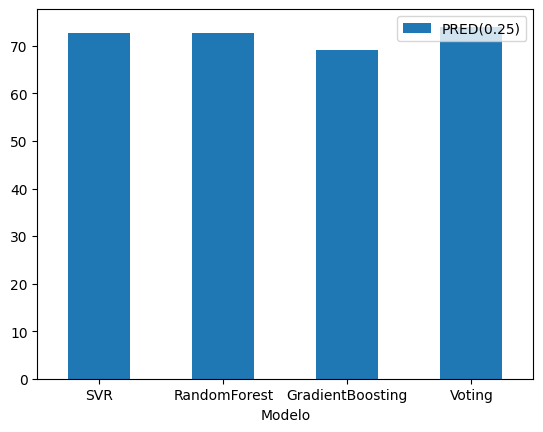

In [ ]:
variables=list(score_result)
variables.pop(0)

for var in variables:
  score_result.plot.bar(x='Modelo', y=var, rot=0)